# Predictive Analysis of Traffic Accidents and Injuries Using Machine Learning on 2020 UK Accident Data

### Context.

- This is based on real world data: specifically, road traffic accidents in 2020.


### Project Background Information.

- All road traffic accidents involving casualties are logged and reported in Great Britain, along with (probably) a majority of other non-fatal road traffic accidents. Every year, the government releases a large batch of data associated with these reports. In this assignment we will be using the data from 2020.


### The Task.

- The task is to advise government agencies about how to improve road safety and create a model that would predict such accidents and the injuries that they incur based on the <a href = "https://canvas.hull.ac.uk/courses/66553/pages/data-for-the-workshop-and-assignment?wrap=1">road accident data</a> which can be found on the <a href = "https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data">data.gov</a> website


### Data used in this project

(1) <a href = "Data/accident_data_v1.0.0_2023.db">The road accident database file</a> located at the <a href = "https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data"> data.gov.uk</a> website <br>

(2) <a href = "Data/Scotland postcodes.csv">The Scotland postcode and Lsoa csv file</a> located at <a href = "https://www.doogal.co.uk/PostcodeDownloads">doogal.co.uk</a> <br>

(3) <a href="Data/Road-Safety-Open-Dataset-Data-Guide.xlsx">The Road Safety Open Dataset Data Guide excel file</a> located at <a href = "https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data">data.gov.uk</a>


### packages to install


In [1]:
# pip install scikit-learn-extra

In [2]:
# pip install folium

In [3]:
# pip install imbalanced-learn

In [4]:
# pip install openpyxl

In [5]:
# pip install mlxtend

In [6]:
# pip install fancyimpute

In [7]:
#pip install xgboost

## Modules for this project


In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import numpy as np
import re
import random
import folium
import scipy.stats as stats
import warnings

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from fancyimpute import IterativeImputer
from scipy.stats import gaussian_kde
from sklearn.feature_selection import RFECV
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest
warnings.filterwarnings('ignore')






# arrange this when you are feeling less sleepy
from sklearn.model_selection import cross_validate 
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score 


from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier 
from xgboost import XGBClassifier

C:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
C:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn_extra\cluster\_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):


In [9]:
#pd.set_option("display.max_colwidth", None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [10]:
pd.set_option("display.max_colwidth", None)
pd.set_option('display.max_columns', None)

# Extracting the data from the SQlite Database


### I defined a class called Extract_DB_info that contains different method for database extractrion for especially for the sake of the Accident DB


#### About the "Extract_DB_info" class;

(1) The class is instantiated with only the path of the where the database is located <br />
(2) The methods of the class include the return_table_names_in_db, the get_column_type, the get_column_names, the get_column_data, the get_primary_and_foreign_keys, the transform_SQL_table_to_df, the turn_each_SQL_table_to_dataframe and the close_connection methods


#### About the "Extract_DB_info" methods;

<h4 style="text-decoration: underline;">(1) return_table_names_in_db</h4>
<p> This method returns the names of the tables in the database</p>

<h4 style="text-decoration: underline;">(2) get_column_type</h4>
<p> This method returns the column type of the specified column in the specified table of the database</p>
<p> The method expects two parameters which are the column to get the type of and the table where the column is located</p>

<h4 style="text-decoration: underline;">(3) get_column_names</h4>
<p> This method returns the names of all the columns present in a specified table</p>
<p> The method only expects the the name of the table to get the column names from as a parameter </p>

<h4 style="text-decoration: underline;">(4) get_column_data</h4>
<p> This method returns the data of all the columns present in a specified table</p>
<p> The method only expects the the name of the table to get the column data from as a parameter </p>

<h4 style="text-decoration: underline;">(5) get_primary_and_foreign_keys</h4>
<p> This method returns a dataframe containing the primary key and the foreign keys of the specified table</p>
<p> The method expects only the name of the table to get the keys for as a parameter </p>

<h4 style="text-decoration: underline;">(6) transform_SQL_table_to_df</h4>
<p> This method transforms a specified table in the database to a pandas dataframe. Unlike the other methods, this method is designed to specifically work on only transforming the data for the year 2020 in the Accident database</p>
<p> The method expects only the name of the name of a table in the accident dataframe as a parameter</p>

<h4 style="text-decoration: underline;">(7) turn_each_SQL_table_to_dataframe</h4>
<p> This method calls the "transform_SQL_table_to_df" to transform all the tables in the Accident db to dataframes and returns a list of these dataframes</p>

<h4 style="text-decoration: underline;">(8) close_connection</h4>
<p> This method closes the connection to the database</p>


In [11]:
class Extract_DB_info:
    def __init__(self, db_path):
        self.con = sqlite3.connect(db_path)
        self.cur = self.con.cursor()
        
        
        
    # Defining a method to return all the table names in the DB
    def return_table_names_in_db(self):
        
        # (1) Execute the query to get the names of the different tables in the DB
        self.cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
        
        # (2) Fetch all the table names gotten from the cursor object in a variable "table_names"
        table_names = self.cur.fetchall()
        
        # (3) Return the table names
        return table_names
    
    
    
    
    # Defining a method to get the column type of a column in a table
    def get_column_type(self, table_name, column_name):
        
        # (1) Execute the query to extract the column type of a specific column
        self.cur.execute(f"SELECT typeof({column_name}) FROM {table_name} LIMIT 1")
        
        # (2) Return the type of the specified column in the specified table
        return column_type
    
    
    
    
    # Defining a method to show the column names of columns in a table
    def get_column_names(self, table_name):
        
        # (1) Initialize an empty list that would hold the column names of the specified table
        table_cols = []
        
        # (2) Execute the query to get the column names from the table
        self.cur.execute(f"SELECT * FROM {table_name}")

        # (3) Iterate over the description of the results from the query and append the column names to the table_cols
        for desc in self.cur.description:
            table_cols.append(desc[0])
            
        # (4) Return the column names list
        return table_cols
    
    
    
    
    # Defining a method to return the data of the columns in a table
    def get_column_data(self, table_name):
        
        # (1) Initialize an empty list that would hold the column data of the specified table
        table_data = []
        
        # (2) Iterate over each row in the results from the query to select all the info from the specified table 
        for row in self.cur.execute(f"SELECT * FROM {table_name}"):
            
            # (3) Append the column data on each row to the table_data list
            table_data.append(row)
        
        # (4) Return the table data
        return table_data
    
    
    
    
    # Defining a method to return the the primary and foriegn keys of a table
    def get_primary_and_foreign_keys(self, table_name):
        
        # (1) Run the query to get the foreign key info 
        self.cur.execute(f"PRAGMA foreign_key_list({table_name})")
        
        # (2) Fetch all the info from the query and store in the variable "foreign_keys"
        foreign_keys = self.cur.fetchall()

        # (3) Run the query to get the table info
        self.cur.execute(f"PRAGMA table_info({table_name})")
        
        # (4) Fetch all the info from the query and store in the variable "table_info"
        table_info = self.cur.fetchall()
    
        primary_key = None
        foreign_keys_info = []
        
        # (6) Iterate through the foreign keys and append a dictionary of the table ref, the attribute from and attribute to
        for key in foreign_keys:
            foreign_keys_info.append({"Table_reference": key[2], "Attribute from": key[3], "Attribute to": key[4]})
        
        # (7) Iterate through the table_info and assign assign the primary key to the variable "primary_key"
        # NB: The column is the primary key for the table if the information at the 5th index is equal to 1 (rest should be 0)
        for col in table_info:
            if col[5] == 1:
                primary_key = col[1]
                
                
        # (8) Creating a dataframe that with a dictionary that holds the Foreign and Primary keys for the specified table        
        keys = pd.DataFrame( {"Foreign keys": [foreign_keys_info], "Primary Key": primary_key} )
            
        # (9) Return the Keys dataframe
        return keys
    
    
    
    
    # Defining a method to transform a table to a pandas data frame
    # NB: Unlike the other methods in this class which are generalized, this method only works for the accident DB
    def transform_SQL_table_to_df(self, table_name):
        
        # (1) The LSOA table does not have an accident year variable so this query does not apply to it
        if table_name != "lsoa":
            query = f"""
            SELECT * 
            FROM {table_name}
            WHERE accident_year = 2020
            """
            
        # (2) Run this query if we are dealing with the LSOA table
        else: 
            query = f"""
            SELECT * 
            FROM {table_name}
            """
            
        # (3) Transform the table into a dataframe
        df = pd.read_sql_query(query, self.con)
        
        # (4) Return the data frame
        return df
    
    
    
    
    def turn_each_SQL_table_to_dataframe(self):
        
        # (1) Get the table names with the "return_table_names_in_db" method
        table_names = self.return_table_names_in_db()
        
        # (2) Initialized a variable that would hold the list of dataframes
        dataframes = []
        
        # (3) Iterate through the tables in the database, transform them to dataframes and append the to the dataframes list
        for table in table_names:
            dataframes.append(self.transform_SQL_table_to_df(table[0]))
        
        # (4) Return the dataframes list
        return dataframes
    
    
    
    def close_connection(self):
        self.con.close()

In [12]:
accident_db_info = Extract_DB_info("accident_data_v1.0.0_2023.db")

### (1) Getting the names of the tables in the database


In [13]:
accident_db_info.return_table_names_in_db()

[('accident',), ('casualty',), ('vehicle',), ('lsoa',)]

### (2) Getting the names of the columns in each of the tables


###### Accident table column names


In [14]:
accident_db_info.get_column_names("accident")

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

###### Casualty table column names


In [15]:
accident_db_info.get_column_names("casualty")

['casualty_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'casualty_reference',
 'casualty_class',
 'sex_of_casualty',
 'age_of_casualty',
 'age_band_of_casualty',
 'casualty_severity',
 'pedestrian_location',
 'pedestrian_movement',
 'car_passenger',
 'bus_or_coach_passenger',
 'pedestrian_road_maintenance_worker',
 'casualty_type',
 'casualty_home_area_type',
 'casualty_imd_decile']

###### Vehicle table column names


In [16]:
accident_db_info.get_column_names("vehicle")

['vehicle_index',
 'accident_index',
 'accident_year',
 'accident_reference',
 'vehicle_reference',
 'vehicle_type',
 'towing_and_articulation',
 'vehicle_manoeuvre',
 'vehicle_direction_from',
 'vehicle_direction_to',
 'vehicle_location_restricted_lane',
 'junction_location',
 'skidding_and_overturning',
 'hit_object_in_carriageway',
 'vehicle_leaving_carriageway',
 'hit_object_off_carriageway',
 'first_point_of_impact',
 'vehicle_left_hand_drive',
 'journey_purpose_of_driver',
 'sex_of_driver',
 'age_of_driver',
 'age_band_of_driver',
 'engine_capacity_cc',
 'propulsion_code',
 'age_of_vehicle',
 'generic_make_model',
 'driver_imd_decile',
 'driver_home_area_type']

###### Lsoa table column names


In [17]:
accident_db_info.get_column_names("lsoa")

['objectid',
 'lsoa01cd',
 'lsoa01nm',
 'lsoa01nmw',
 'shape__area',
 'shape__length',
 'globalid']

### (3) Getting the Primary and Foreign keys of each of the tables


###### Primary and Foreign keys fot the Accident table


In [18]:
# accident
accident_db_info.get_primary_and_foreign_keys("accident")

Foreign keys     Primary Key
0           []  accident_index

###### Primary and Foreign keys fot the Casualty table


In [19]:
accident_db_info.get_primary_and_foreign_keys("casualty")

Foreign keys  \
0  [{'Table_reference': 'accident', 'Attribute from': 'accident_index', 'Attribute to': 'accident_index'}]   

      Primary Key  
0  casualty_index

###### Primary and Foreign keys fot the Vehicle table


In [20]:
# vehicle
accident_db_info.get_primary_and_foreign_keys("vehicle")

Foreign keys  \
0  [{'Table_reference': 'accident', 'Attribute from': 'accident_index', 'Attribute to': 'accident_index'}]   

     Primary Key  
0  vehicle_index

###### Primary and Foreign keys fot the Lsoa table


In [21]:
accident_db_info.get_primary_and_foreign_keys("lsoa")

Foreign keys Primary Key
0           []    objectid

### (4) Transorming the tables to dataframes and visualizing them


In [22]:
dataframes = accident_db_info.turn_each_SQL_table_to_dataframe()

In [23]:
df_accident,df_casualty, df_vehicle, df_lsoa = dataframes

In [24]:
df_accident.head(2)

accident_index  accident_year accident_reference  location_easting_osgr  \
0  2020010219808           2020          010219808               521389.0   
1  2020010220496           2020          010220496               529337.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                175144.0  -0.254001  51.462262             1   
1                176237.0  -0.139253  51.470327             1   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  04/02/2020   
1                  3                   1                     2  27/04/2020   

   day_of_week   time  local_authority_district local_authority_ons_district  \
0            3  09:00                        10                    E09000032   
1            2  13:55                         9                    E09000022   

  local_authority_highway  first_road_class  first_road_number  road_type  \
0               E09000032                 6                  0          6   
1               E09000022                 3               3036          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  0   
1           20                9                 2                  6   

   second_road_number  pedestrian_crossing_human_control  \
0                  -1                                  9   
1                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  \
0                    0                    1   
1                    0                    1   

   did_police_officer_attend_scene_of_accident  trunk_road_flag  \
0                                            3                2   
1                                            1                2   

  lsoa_of_accident_location  
0                 E01004576  
1                 E01003034

In [25]:
df_casualty.head(2)

casualty_index accident_index  accident_year accident_reference  \
0          484748  2020010219808           2020          010219808   
1          484749  2020010220496           2020          010220496   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  1                   1               3                1   
1                  1                   1               3                2   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0               31                     6                  3   
1                2                     1                  3   

   pedestrian_location  pedestrian_movement  car_passenger  \
0                    9                    5              0   
1                    1                    1              0   

   bus_or_coach_passenger  pedestrian_road_maintenance_worker  casualty_type  \
0                       0                                   0              0   
1                       0                                   0              0   

   casualty_home_area_type  casualty_imd_decile  
0                        1                    4  
1                        1                    2

In [26]:
df_vehicle.head(2)

vehicle_index accident_index  accident_year accident_reference  \
0         681716  2020010219808           2020          010219808   
1         681717  2020010220496           2020          010220496   

   vehicle_reference  vehicle_type  towing_and_articulation  \
0                  1             9                        9   
1                  1             9                        0   

   vehicle_manoeuvre  vehicle_direction_from  vehicle_direction_to  \
0                  5                       1                     5   
1                  4                       2                     6   

   vehicle_location_restricted_lane  junction_location  \
0                                 0                  0   
1                                 0                  2   

   skidding_and_overturning  hit_object_in_carriageway  \
0                         0                          0   
1                         0                          0   

   vehicle_leaving_carriageway  hit_object_off_carriageway  \
0                            0                           0   
1                            0                           0   

   first_point_of_impact  vehicle_left_hand_drive  journey_purpose_of_driver  \
0                      4                        9                          6   
1                      1                        1                          2   

   sex_of_driver  age_of_driver  age_band_of_driver  engine_capacity_cc  \
0              2             32                   6                1968   
1              1             45                   7                1395   

   propulsion_code  age_of_vehicle generic_make_model  driver_imd_decile  \
0                2               6            AUDI Q5                  4   
1                1               2            AUDI A1                  7   

   driver_home_area_type  
0                      1  
1                      1

In [27]:
df_lsoa.head(2)

objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   

     shape__area  shape__length                              globalid  
0  129865.232552    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  228418.896622    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09

### (5) Close the connection


In [28]:
accident_db_info.close_connection()

#

#

# Data Cleaning

- I will now proceed to thoroughly clean all the columns accross all of the dataframes created for the tables in the database. I will beginn with the accident table


### Before I started the cleaning, I read in the information about the different columns in the data set


In [29]:
# Reading in the dataset guide
columns_info = pd.read_excel("Road-Safety-Open-Dataset-Data-Guide.xlsx")

In [30]:
# Looking at the firat 5 rows of the dataset
columns_info.head(3)

table          field name code/format label  \
0  Accident      accident_index         NaN   NaN   
1  Accident       accident_year         NaN   NaN   
2  Accident  accident_reference         NaN   NaN   

                                                                                                                                                                    note  
0  unique value for each accident. The accident_index combines the accident_year and accident_ref_no to form a unique ID. It can be used to join to Vehicle and Casualty  
1                                                                                                                                                                    NaN  
2                            In year id used by the police to reference a collision. It is not unique outside of the year, use accident_index for linking to other years

In [31]:
# Creating the function to get the information about a column in a table
def get_column_info(table, column):
    return columns_info[(columns_info["field name"] == column) & (columns_info["table"] == table)]

## Cleaning the Accident table


#### I first have a glimse of the accident index dataframe to have an Idea of what it looks like


In [32]:
df_accident

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties  \
0                      3                   1                     1   
1                      3                   1                     2   
2                      3                   1                     1   
3                      2                   1                     1   
4                      3                   1                     2   
...                  ...                 ...                   ...   
91194                  2                   2                     1   
91195                  3                   1                     1   
91196                  2                   2                     1   
91197                  3                   2                     1   
91198                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
0      04/02/2020            3  09:00                        10   
1      27/04/2020            2  13:55                         9   
2      01/01/2020            4  01:25                         1   
3      01/01/2020            4  01:50                        17   
4      01/01/2020            4  02:25                         1   
...           ...          ...    ...                       ...   
91194  12/08/2020            4  14:30                       918   
91195  13/11/2020            6  15:05                       922   
91196  15/04/2020            4  12:42                       910   
91197  15/12/2020            3  14:00                       932   
91198  25/08/2020            3  13:50                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
0                        E09000032               E09000032                 6   
1                        E09000022               E09000022                 3   
2                        E09000033               E09000033                 5   
3                        E09000025               E09000025                 3   
4                        E09000033               E09000033                 3   
...                            ...                     ...               ...  

#### I will also use a correlation heat map to assist me in understanding the correlations in the table


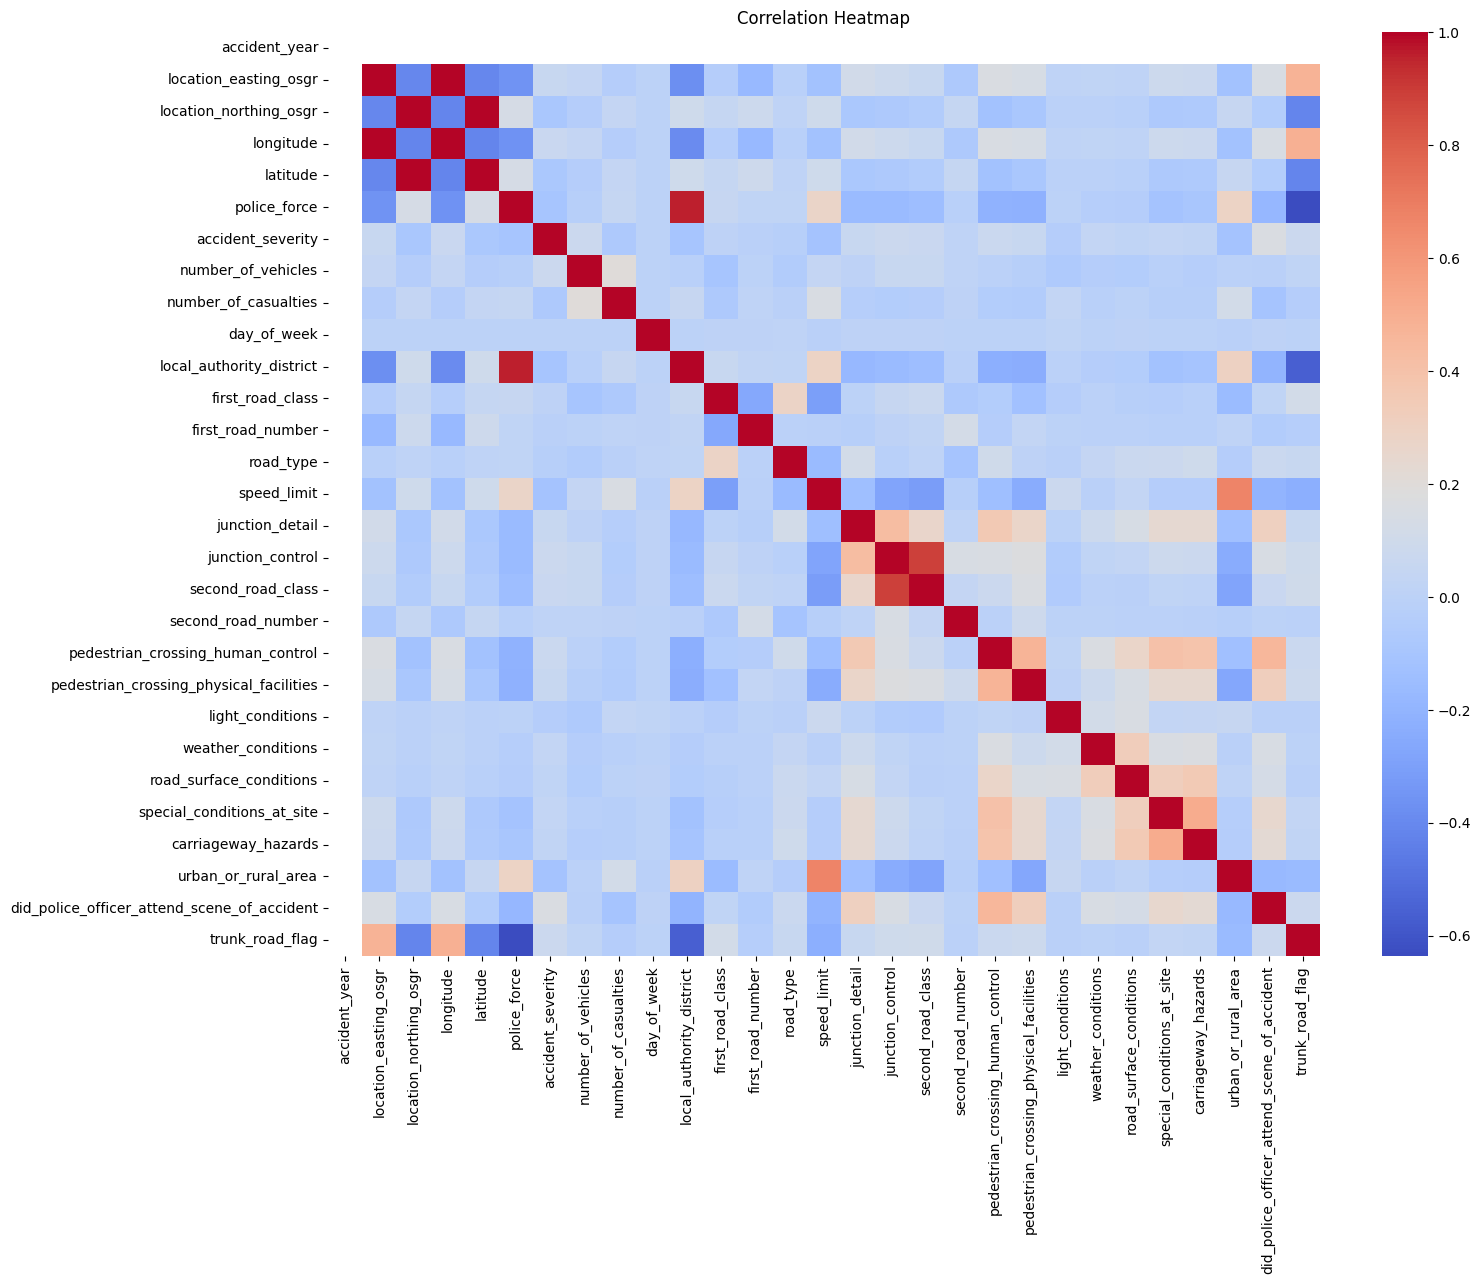

In [33]:
numeric_columns = df_accident.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.001)
plt.title('Correlation Heatmap')
plt.show()

#### I will start by using isnull method to see if there are any null values in any of the columns


In [34]:
df_accident.isnull().sum()

accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                          14
location_northing_osgr                         14
longitude                                      14
latitude                                       14
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


- I can see null values in four columns so I will deal with them before I continue with the cleaning


#### I will now look rows that have these missing Nan values for each of the columns


In [35]:
df_accident[df_accident["location_easting_osgr"].isnull()]

accident_index  accident_year accident_reference  location_easting_osgr  \
25520  2020052002442           2020          052002442                    NaN   
29452  2020070769852           2020          070769852                    NaN   
32689  2020122001194           2020          122001194                    NaN   
33578  2020137330369           2020          137330369                    NaN   
81252  2020522005114           2020          522005114                    NaN   
86437  2020622001016           2020          622001016                    NaN   
86642  202063A017520           2020          63A017520                    NaN   
86651  202063A018920           2020          63A018920                    NaN   
86668  202063A025020           2020          63A025020                    NaN   
86705  202063A035620           2020          63A035620                    NaN   
86785  202063A059120           2020          63A059120                    NaN   
87018  202063C020320           2020          63C020320                    NaN   
87030  202063C024520           2020          63C024520                    NaN   
87296  202063D061520           2020          63D061520                    NaN   

       location_northing_osgr  longitude  latitude  police_force  \
25520                     NaN        NaN       NaN             5   
29452                     NaN        NaN       NaN             7   
32689                     NaN        NaN       NaN            12   
33578                     NaN        NaN       NaN            13   
81252                     NaN        NaN       NaN            52   
86437                     NaN        NaN       NaN            62   
86642                     NaN        NaN       NaN            63   
86651                     NaN        NaN       NaN            63   
86668                     NaN        NaN       NaN            63   
86705                     NaN        NaN       NaN            63   
86785                     NaN        NaN       NaN            63   
87018                     NaN        NaN       NaN            63   
87030                     NaN        NaN       NaN            63   
87296                     NaN        NaN       NaN            63   

       accident_severity  number_of_vehicles  number_of_casualties  \
25520                  2                   2                     1   
29452                  3                   2                     1   
32689                  3                   2                     2   
33578                  3                   2                     1   
81252                  3                   3                     2   
86437                  3                   2                     1   
86642                  3                   2                     1   
86651                  3                   2                     1   
86668                  3                   2                     1   
86705                  3                   1                     1   
86785                  3                   2                     1   
87018                  3                   2                     2   
87030                  2                   2                     1   
87296                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
25520  26/11/2020            5  16:00                        92   
29452  19/12/2020            7  11:10                       130   
32689  30/09/2020            4  18:10                       181   
33578  03/03/2020            3  09:16                       206   
81252  29/05/2020            6  19:00                       605   
86437  13/11/2020            6  20:16                        -1   
86642  26/02/2020            4  08:15                        -1   
86651  27/02/2020            5  05:55                       751   
86668  12/02/2020            4  08:15                        -1   
86705  10/06/2020            4  18:35           

- luckily I have that all the columns with nan values are in the same rows
- I also notice that these columns have there lsoa of accident location recorded as minus 1 and so my approach to filling the nan values for the columns would be to check all the the all the rows that are similar in terms of the columns that describe the location approximately and use the median of the rows to input the missing values
- ps: I use median and not mean here so that those -1 values dont ruin the result


### Below, I will now proceed to write a function that will replace the missing location columns using values from the rows that are similar in terms of ability to predict the location

- By considering factors like junction details, authority in highway etc, I can get an approximation on what the values of the Nan location_easting_osgr, location_northing_osgr, longitude and latitude should be


#### In summary, the function below does the following

- First, because all the nan values in the dataframe are in the location_easting_osgr, location_northing_osgr, longitude and latitude I converted all of them to -1 for easier processing
- Secondly I stored all the rows that the nan values in a variable called nan_rows
- Thirdly, I column values of local_authority_ons_district, local_authority_highway, first_road_class and junction_detail columns that have thier location_easting_osgr, location_northing_osgr, longitude and latitude as nan in variables
- Fourthly, I iterated through using the total length of the of the length of the nan rows and I defined two conditions per iteration, one for getting the values that give a good guess of the location columns of the accident using the columns that local_authority_ons_district, local_authority_highway, first_road_class and junction_detail columns and one to specify the columns to be replaced (The Nan values that are now -1)
- Fifth, because I have removed the minus one it can no longer affect the mean and so I find the mean of the values that are similar to the missing values in terms of local_authority_ons_district, local_authority_highway, first_road_class and junction_detail columns
- And finally, I replaced the missing values with the values I got for the mean as described above


In [36]:
def replace_location_Nan_values():
    # Replacing all Nan values with -1
    df_accident.fillna(-1, inplace=True)
    
    # Storing the location related columns in a variable called nan_rows
    nan_rows = df_accident[df_accident["location_easting_osgr"] == -1]
    
    
    # storing the columns that will help give an approximation of the location information in lists
    local_authority_ons_district = list(nan_rows["local_authority_ons_district"])
    local_authority_highway = list(nan_rows["local_authority_highway"])
    first_road_class = list(nan_rows["first_road_class"])
    junction_detail = list(nan_rows["junction_detail"])
    
    
    for i in range(len(nan_rows)):
        #This condition will check for similar rows in in terms of the columns that can help with aproximation of the value
        condition_to_get_value = (((df_accident["local_authority_highway"] == local_authority_highway[i]) | 
                                   (df_accident["local_authority_ons_district"] == local_authority_ons_district[i]) &
                                   (df_accident["local_authority_highway"] != -1)) & 
                                  (df_accident["first_road_class"] == first_road_class[i]) &
                                  (df_accident["junction_detail"] == junction_detail[i]) &
                                  (df_accident["location_easting_osgr"] != -1))
        
        #This condition will specify when the replacement should take place (i.e where we missing location columns)
        condition_for_replacement = (((df_accident["local_authority_highway"] == local_authority_highway[i]) | 
                                      (df_accident["local_authority_ons_district"] == local_authority_ons_district[i]) &
                                      (df_accident["local_authority_highway"] != -1)) & 
                                     (df_accident["first_road_class"] == first_road_class[i]) &
                                     (df_accident["junction_detail"] == junction_detail[i]) &
                                     (df_accident["location_easting_osgr"] == -1))
        
        
        # This gets the mean values for the values from the similar rows that we want to use for the replacement
        easting_osgr = round(np.mean(np.array(df_accident[condition_to_get_value]["location_easting_osgr"])), 0)
        northing_osgr = round(np.mean(np.array(df_accident[condition_to_get_value]["location_northing_osgr"])), 0)
        longitude = round(np.mean(np.array(df_accident[condition_to_get_value]["longitude"])), 6)
        latitude = round(np.mean(np.array(df_accident[condition_to_get_value]["latitude"])), 6)
        
        # Finally, this does the replacements for the missing columns on the location columns using the condition we specified
        df_accident.loc[condition_for_replacement, "location_easting_osgr"] = easting_osgr
        df_accident.loc[condition_for_replacement, "location_northing_osgr"] = northing_osgr
        df_accident.loc[condition_for_replacement, "longitude"] = longitude
        df_accident.loc[condition_for_replacement, "latitude"] = latitude        

In [37]:
df_accident

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
1      2020010220496           2020          010220496               529337.0   
2      2020010228005           2020          010228005               526432.0   
3      2020010228006           2020          010228006               538676.0   
4      2020010228011           2020          010228011               529324.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
1                    176237.0  -0.139253  51.470327             1   
2                    182761.0  -0.178719  51.529614             1   
3                    184371.0  -0.001683  51.541210             1   
4                    181286.0  -0.137592  51.515704             1   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties  \
0                      3                   1                     1   
1                      3                   1                     2   
2                      3                   1                     1   
3                      2                   1                     1   
4                      3                   1                     2   
...                  ...                 ...                   ...   
91194                  2                   2                     1   
91195                  3                   1                     1   
91196                  2                   2                     1   
91197                  3                   2                     1   
91198                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
0      04/02/2020            3  09:00                        10   
1      27/04/2020            2  13:55                         9   
2      01/01/2020            4  01:25                         1   
3      01/01/2020            4  01:50                        17   
4      01/01/2020            4  02:25                         1   
...           ...          ...    ...                       ...   
91194  12/08/2020            4  14:30                       918   
91195  13/11/2020            6  15:05                       922   
91196  15/04/2020            4  12:42                       910   
91197  15/12/2020            3  14:00                       932   
91198  25/08/2020            3  13:50                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
0                        E09000032               E09000032                 6   
1                        E09000022               E09000022                 3   
2                        E09000033               E09000033                 5   
3                        E09000025               E09000025                 3   
4                        E09000033               E09000033                 3   
...                            ...                     ...               ...  

In [38]:
replace_location_Nan_values()

- Now that I have run the function I will confirm if there are still nan values in the columns


In [39]:
df_accident.isnull().sum()

accident_index                                 0
accident_year                                  0
accident_reference                             0
location_easting_osgr                          0
location_northing_osgr                         0
longitude                                      0
latitude                                       0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
local_authority_ons_district                   0
local_authority_highway                        0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit         

- The data frame does not have null values any more, I will now check to be sure that the function removed all the instances of -1 that I added to aid the solution


In [40]:
print(len(df_accident[df_accident["location_easting_osgr"] == -1]))
print(len(df_accident[df_accident["location_northing_osgr"] == -1]))
print(len(df_accident[df_accident["longitude"] == -1]))
print(len(df_accident[df_accident["latitude"] == -1]))

0
0
0
0


- We can see that the columns do not have any instance of -1 and that marks the end of cleaning this four columns. I will now proceed with my cleaning


#### While I was cleaning the the location columns I noticed that the lsoa_of_accident_location also had -1 values and so a I will be cleaning that now

- I will use a similar approach to the one I used for the other location columns but this time I will input the value for the lsoa of accidents using the mode from similar columns the using rounded values from longitudes, latitudes, location easting osgr and location northing osgr columns as conditions to select the mode for the lsao of accident location


#### The function "replace_single_lsoa_of_accident_column" below does the following in summary

- First set 5 different conditions to get values that so not have minus one in there lsoa and another set of 5 to get the values to be used for replacement of the minus 1 values in order of strictness starting from the strictest to the most lenient to. Yhis is done to find lsoa codes that are similar to the ones that have minus 1 values based on thier closeness in terms of approximated longitude, latitude, easting and northing.
- Secondly, I attempt to replace each of the values missing (-1) lsoa codes using the conditions in order of strictness. If a condition fails, it is because there are no rows that meet the condition set hence I used the nested try and except blocks to keep trying different conditions and as the deeper into the nest I go, the more lenient the conditions are.
- Thirdly, I used a boolean variable I defined as break_condition to check for when all the conditions set have failed (i.e break_condition = True) and if so, the function would stop trying to replace the minus 1 values. In other words, the function only makes an attempt to replace the minus 1 lsoa code values when the break_condition is False


In [41]:
def replace_single_lsoa_of_accident_column(row_conditions):
    # here I set a break condition in case I run into an error while inputing to avoid inputing wrong values
    break_condition = False
    
    # Below I set the conditions that will get the lsoa with similar longitude, latitude, location_easting_osgr and 
    #location_northing_osgr
    #I set different conditions to loosen the strictness of the condition so as to allow for when there a=is little or no
    # similar values
    condition_to_get_value_1 = ((round(df_accident["longitude"], 2) == round(row_conditions[0], 2)) & 
                                (round(df_accident["latitude"], 2) == round(row_conditions[1],2)) & 
                                (df_accident["location_easting_osgr"].astype(str).str[:3] == str(row_conditions[2])[:3]) &
                                (df_accident["location_northing_osgr"].astype(str).str[:3] == str(row_conditions[3])[:3]) &
                                (df_accident["lsoa_of_accident_location"] != "-1"))
        
    condition_to_get_value_2 = ((round(df_accident["longitude"], 1) == round(row_conditions[0], 1)) & 
                                (round(df_accident["latitude"], 1) == round(row_conditions[1],1)) & 
                                (df_accident["location_easting_osgr"].astype(str).str[:2] == str(row_conditions[2])[:2]) &
                                (df_accident["location_northing_osgr"].astype(str).str[:2] == str(row_conditions[3])[:2]) &
                                (df_accident["lsoa_of_accident_location"] != "-1"))
        
    condition_to_get_value_3 = ((round(df_accident["longitude"], 1) == round(row_conditions[0], 1)) & 
                                (round(df_accident["latitude"], 1) == round(row_conditions[1],1)) & 
                                (df_accident["location_easting_osgr"].astype(str).str[:1] == str(row_conditions[2])[:1]) &
                                (df_accident["location_northing_osgr"].astype(str).str[:1] == str(row_conditions[3])[:1]) &
                                (df_accident["lsoa_of_accident_location"] != "-1"))
        
    condition_to_get_value_4 = ((round(df_accident["longitude"], 1) == round(row_conditions[0], 1)) & 
                                (round(df_accident["latitude"], 1) == round(row_conditions[1],1)) & 
                                (df_accident["location_easting_osgr"].astype(str).str[:0] == str(row_conditions[2])[:0]) &
                                (df_accident["location_northing_osgr"].astype(str).str[:0] == str(row_conditions[3])[:0]) &
                                (df_accident["lsoa_of_accident_location"] != "-1"))
        
        
        
    #These are the conditions that would be used to replace an instance of -1 in the lsoa of location column
    condition_for_replacement_1 = ((round(df_accident["longitude"], 2) == round(row_conditions[0],2)) & 
                                   (round(df_accident["latitude"], 2) == round(row_conditions[1],2)) &
                                   (df_accident["location_easting_osgr"].astype(str).str[:3] == str(row_conditions[2])[:3]) &
                                   (df_accident["location_northing_osgr"].astype(str).str[:3] == str(row_conditions[3])[:3]) &
                                   (df_accident["lsoa_of_accident_location"] == "-1"))
        
    condition_for_replacement_2 = ((round(df_accident["longitude"], 1) == round(row_conditions[0],1)) & 
                                   (round(df_accident["latitude"], 1) == round(row_conditions[1],1)) &
                                   (df_accident["location_easting_osgr"].astype(str).str[:2] == str(row_conditions[2])[:2]) &
                                   (df_accident["location_northing_osgr"].astype(str).str[:2] == str(row_conditions[3])[:2]) &
                                   (df_accident["lsoa_of_accident_location"] == "-1"))
        
    condition_for_replacement_3 = ((round(df_accident["longitude"], 1) == round(row_conditions[0],1)) & 
                                   (round(df_accident["latitude"], 1) == round(row_conditions[1],1)) &
                                   (df_accident["location_easting_osgr"].astype(str).str[:1] == str(row_conditions[2])[:1]) &
                                   (df_accident["location_northing_osgr"].astype(str).str[:1] == str(row_conditions[3])[:1]) &
                                   (df_accident["lsoa_of_accident_location"] == "-1"))
        
    condition_for_replacement_4 = ((round(df_accident["longitude"], 1) == round(row_conditions[0],1)) & 
                                   (round(df_accident["latitude"], 1) == round(row_conditions[1],1)) &
                                   (df_accident["location_easting_osgr"].astype(str).str[:0] == str(row_conditions[2])[:0]) &
                                   (df_accident["location_northing_osgr"].astype(str).str[:0] == str(row_conditions[3])[:0]) &
                                   (df_accident["lsoa_of_accident_location"] == "-1"))
        
        
    # All I am doing in these try catch blocks is that I am checking I am trying the different conditions defined above
    # And if there are no similar rows at all, it falls into the last except block which would trigger the function to
    # Stop trying to replace the values
    try:
        condition_to_get_value = condition_to_get_value_1
        condition_for_replacement = condition_for_replacement_1
        mode_location = df_accident[condition_to_get_value]["lsoa_of_accident_location"].mode()[0]

            
    except:
        try:
            condition_to_get_value = condition_to_get_value_2
            condition_for_replacement = condition_for_replacement_2
            mode_location = df_accident[condition_to_get_value]["lsoa_of_accident_location"].mode()[0]
        
                
        except:
            try: 
                condition_to_get_value = condition_to_get_value_3
                condition_for_replacement = condition_for_replacement_3
                mode_location = df_accident[condition_to_get_value]["lsoa_of_accident_location"].mode()[0]
            
                    
            except:
                try:
                    condition_to_get_value = condition_to_get_value_4
                    condition_for_replacement = condition_for_replacement_4
                    mode_location = df_accident[condition_to_get_value]["lsoa_of_accident_location"].mode()[0]
            
                        
                except:
                    break_condition = True
                    
                    
    # The break condition tells us if the -1 value of the lsoa of accident location on the current row has similar location
    # longitude, latitiude, etc with any other rows in the dataframe and only attempts to replace if this condition is satisfied
    if break_condition == False:
        df_accident.loc[condition_for_replacement,"lsoa_of_accident_location"] = mode_location
    return break_condition

#### The function "replace_minus1_lsoa_of_accident" below simply just;

- iterates through the rows that have -1 lsoa codes and parses the longitude, latitude, location_easting_osgr and location_northing_osgr into the "replace_single_lsoa_of_accident_column" function defined above one by one and breaks if the break condition is true, meaning it will stop trying to iterate and allow me to check the reason for the break if any


In [42]:
def replace_minus1_lsoa_of_accident():
    # This variable nan rows selects the rows in the df that have -1 values in the lsoa of accident location column
    nan_rows = df_accident[df_accident["lsoa_of_accident_location"] == "-1"]
    
    # In this line, I will iterate through the location attributes and parse them into the 
    # replace_single_lsoa_of_accident_column defined above
    
    # This line simply iterates over all the longitude, latitude, easting, northing of nan_rows
    for longitude, latitude, easting, northing in zip(nan_rows["longitude"], 
                                                      nan_rows["latitude"],
                                                      nan_rows["location_easting_osgr"],
                                                      nan_rows["location_northing_osgr"]
                                                     ):
        
        # Location list stores the longitude, longitude, easting and northing of the row in the current iteration
        location_list = [longitude, longitude, easting, northing]
        
        # The break condition is returned from the "replace_single_lsoa_of_accident_column" and used to check for when to stop
        break_condition = replace_single_lsoa_of_accident_column([longitude, latitude, easting, northing]) 
        
        # Simply breaking the loop when the break condition is true to allow for investigation
        if break_condition == True:
            break

- I will look at the nan rows that we have present before I call the function and then check them againa after the call


In [43]:
df_accident[df_accident["lsoa_of_accident_location"] == "-1"]

accident_index  accident_year accident_reference  location_easting_osgr  \
25520  2020052002442           2020          052002442               351712.0   
29452  2020070769852           2020          070769852               346816.0   
32689  2020122001194           2020          122001194               451524.0   
33578  2020137330369           2020          137330369               429434.0   
78198  2020500966926           2020          500966926               243533.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
25520                394827.0  -2.728520  53.447990             5   
29452                369774.0  -2.798024  53.222244             7   
32689                464447.0  -1.213354  54.072353            12   
33578                420822.0  -1.555835  53.683049            13   
78198                 58802.0  -4.203369  50.408188            50   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties  \
25520                  2                   2                     1   
29452                  3                   2                     1   
32689                  3                   2                     2   
33578                  3                   2                     1   
78198                  3                   2                     3   
...                  ...                 ...                   ...   
91194                  2                   2                     1   
91195                  3                   1                     1   
91196                  2                   2                     1   
91197                  3                   2                     1   
91198                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
25520  26/11/2020            5  16:00                        92   
29452  19/12/2020            7  11:10                       130   
32689  30/09/2020            4  18:10                       181   
33578  03/03/2020            3  09:16                       206   
78198  17/07/2020            6  14:00                       583   
...           ...          ...    ...                       ...   
91194  12/08/2020            4  14:30                       918   
91195  13/11/2020            6  15:05                       922   
91196  15/04/2020            4  12:42                       910   
91197  15/12/2020            3  14:00                       932   
91198  25/08/2020            3  13:50                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
25520                    E08000013               E08000013                 3   
29452                    E06000050               E06000050                 3   
32689                    E07000164               E10000023                 6   
33578                    E08000036               E08000036                 1   
78198                    E06000026               E06000026                 3   
...                            ...                     ...               ...  

- I can see that the total amount of rows with -1 in the as their lsoa code in the accident df is 3,851


In [44]:
replace_minus1_lsoa_of_accident()

In [45]:
df_accident[df_accident["lsoa_of_accident_location"] == "-1"]

accident_index  accident_year accident_reference  location_easting_osgr  \
87363  2020990914642           2020          990914642               323358.0   
87364  2020990914656           2020          990914656               328344.0   
87365  2020990914685           2020          990914685               251672.0   
87366  2020990914694           2020          990914694               250320.0   
87367  2020990914700           2020          990914700               187099.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
87363                657433.0  -3.224260  55.804069            99   
87364                674151.0  -3.149167  55.955012            99   
87365                669243.0  -4.373494  55.893393            99   
87366                835075.0  -4.491377  57.381401            99   
87367                688602.0  -5.419630  56.042804            99   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties  \
87363                  3                   1                     1   
87364                  2                   2                     2   
87365                  2                   3                     1   
87366                  2                   1                     2   
87367                  3                   1                     1   
...                  ...                 ...                   ...   
91194                  2                   2                     1   
91195                  3                   1                     1   
91196                  2                   2                     1   
91197                  3                   2                     1   
91198                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
87363  01/01/2020            4  02:51                       929   
87364  01/01/2020            4  07:48                       923   
87365  01/01/2020            4  16:15                       926   
87366  01/01/2020            4  16:34                       927   
87367  01/01/2020            4  04:00                       913   
...           ...          ...    ...                       ...   
91194  12/08/2020            4  14:30                       918   
91195  13/11/2020            6  15:05                       922   
91196  15/04/2020            4  12:42                       910   
91197  15/12/2020            3  14:00                       932   
91198  25/08/2020            3  13:50                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
87363                    S12000019               S12000019                 3   
87364                    S12000036               S12000036                 3   
87365                    S12000043               S12000043                 6   
87366                    S12000017               S12000017                 3   
87367                    S12000035               S12000035                 6   
...                            ...                     ...               ...  

- I can see that the function I can see that the number of rows with minus 1 in the lsoa column has reduced but not significantly.
<h5></h5>
- I can also see from looking at the authorithy on highway column, that all of the rows with missing lsoa codes that are currently visible are in scotland and so I will confirm if it is all of them by checking all the length of the rows that have there local authority on district starting with an S (Thats how I Identify scotland)


In [46]:
df_accident[df_accident['local_authority_ons_district'].str.startswith('S', na=False)]

accident_index  accident_year accident_reference  location_easting_osgr  \
87363  2020990914642           2020          990914642               323358.0   
87364  2020990914656           2020          990914656               328344.0   
87365  2020990914685           2020          990914685               251672.0   
87366  2020990914694           2020          990914694               250320.0   
87367  2020990914700           2020          990914700               187099.0   
...              ...            ...                ...                    ...   
91194  2020991027064           2020          991027064               343034.0   
91195  2020991029573           2020          991029573               257963.0   
91196  2020991030297           2020          991030297               383664.0   
91197  2020991030900           2020          991030900               277161.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
87363                657433.0  -3.224260  55.804069            99   
87364                674151.0  -3.149167  55.955012            99   
87365                669243.0  -4.373494  55.893393            99   
87366                835075.0  -4.491377  57.381401            99   
87367                688602.0  -5.419630  56.042804            99   
...                       ...        ...        ...           ...   
91194                731654.0  -2.926320  56.473539            99   
91195                658891.0  -4.267565  55.802353            99   
91196                810646.0  -2.271903  57.186317            99   
91197                674852.0  -3.968753  55.950940            99   
91198                681950.0  -4.561040  56.003843            99   

       accident_severity  number_of_vehicles  number_of_casualties  \
87363                  3                   1                     1   
87364                  2                   2                     2   
87365                  2                   3                     1   
87366                  2                   1                     2   
87367                  3                   1                     1   
...                  ...                 ...                   ...   
91194                  2                   2                     1   
91195                  3                   1                     1   
91196                  2                   2                     1   
91197                  3                   2                     1   
91198                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
87363  01/01/2020            4  02:51                       929   
87364  01/01/2020            4  07:48                       923   
87365  01/01/2020            4  16:15                       926   
87366  01/01/2020            4  16:34                       927   
87367  01/01/2020            4  04:00                       913   
...           ...          ...    ...                       ...   
91194  12/08/2020            4  14:30                       918   
91195  13/11/2020            6  15:05                       922   
91196  15/04/2020            4  12:42                       910   
91197  15/12/2020            3  14:00                       932   
91198  25/08/2020            3  13:50                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
87363                    S12000019               S12000019                 3   
87364                    S12000036               S12000036                 3   
87365                    S12000043               S12000043                 6   
87366                    S12000017               S12000017                 3   
87367                    S12000035               S12000035                 6   
...                            ...                     ...               ...  

- From comparing lengths we can see that my guess is confirmed and that all the missing lsoa codes are in scottland


#### I have checked the lsoa table and the stats 19 and 20 information but cannot find any information on how to fill in this missing lsoa codes which are in scotland and so I proceeded to get a data set from <link> https://www.doogal.co.uk/PostcodeDownloads <link> that contains the information on scotland lsoa's and as such will be used to fill up the missing scotland lsoa codes.


In [47]:
# Reading in the csv file containing information about scotland
df_Scotland_postcodes = pd.read_csv("Scotland postcodes.csv")

In [48]:
df_Scotland_postcodes.head(3)

Postcode In Use?   Latitude  Longitude   Easting  Northing  Grid Ref  \
0  AB1 0AA      No  57.101474  -2.242851  385386.0  801193.0  NJ853011   
1  AB1 0AB      No  57.102554  -2.246308  385177.0  801314.0  NJ851013   
2  AB1 0AD      No  57.100556  -2.248342  385053.0  801092.0  NJ850010   

   County       District           Ward District Code  Ward Code   Country  \
0     NaN  Aberdeen City  Lower Deeside     S12000033  S13002843  Scotland   
1     NaN  Aberdeen City  Lower Deeside     S12000033  S13002843  Scotland   
2     NaN  Aberdeen City  Lower Deeside     S12000033  S13002843  Scotland   

  County Code    Constituency  Introduced  Terminated  Parish National Park  \
0   S99999999  Aberdeen South  1980-01-01  1996-06-01     NaN           NaN   
1   S99999999  Aberdeen South  1980-01-01  1996-06-01     NaN           NaN   
2   S99999999  Aberdeen South  1980-01-01  1996-06-01     NaN           NaN   

   Population  Households  Built up area  Built up sub-division  \
0         NaN         NaN            NaN                    NaN   
1         NaN         NaN            NaN                    NaN   
2         NaN         NaN            NaN                    NaN   

               Lower layer super output area            Rural/urban    Region  \
0  Cults, Bieldside and Milltimber West - 02  Accessible small town  Scotland   
1  Cults, Bieldside and Milltimber West - 02  Accessible small town  Scotland   
2  Cults, Bieldside and Milltimber West - 02  Accessible small town  Scotland   

   Altitude  London zone  LSOA Code  Local authority  MSOA Code  \
0      46.0          NaN  S01006514              NaN  S02001237   
1      61.0          NaN  S01006514              NaN  S02001237   
2      45.0          NaN  S01006514              NaN  S02001237   

         Middle layer super output area  Parish Code Census output area  \
0  Cults, Bieldside and Milltimber West          NaN          S00090303   
1  Cults, Bieldside and Milltimber West          NaN          S00090303   
2  Cults, Bieldside and Milltimber West          NaN          S00090399   

  Constituency Code  Index of Multiple Deprivation  Quality  User Type  \
0         S14000002                           6715        1          0   
1         S14000002                           6715        1          0   
2         S14000002                           6715        1          0   

  Last updated Nearest station  Distance to station Postcode area  \
0   2023-06-09      Portlethen              8.31408            AB   
1   2023-06-09      Portlethen              8.55457            AB   
2   2023-06-09      Portlethen              8.54352            AB   

  Postcode district Police force   Water company    Plus Code  Average Income  \
0               AB1     Scotland  Scottish Water  9C9V4Q24+HV             NaN   
1               AB1     Scotland  Scottish Water  9C9V4Q33+2F             NaN   
2               AB1     Scotland  Scottish Water  9C9V4Q22+6M             NaN   

   Sewage Company Travel To Work Area             ITL level 2  \
0             NaN            Aberdeen  North Eastern Scotland   
1             NaN            Aberdeen  North Eastern Scotland   
2             NaN            Aberdeen  North Eastern Scotland   

                       ITL level 3  Distance to sea  LSOA21 Code  \
0  Aberdeen City and Aberdeenshire          9.87661          NaN   
1  Aberdeen City and Aberdeenshire         10.11510          NaN   
2  Aberdeen City and Aberdeenshire         10.14760          NaN   

   Lower layer super output area 2021  MSOA21 Code  \
0                                 NaN          NaN   
1                                 NaN          NaN   
2                                 NaN          NaN   

   Middle layer super output area 2021  Census output area 2021  
0                                  NaN                      NaN  
1                                  NaN                      NaN  
2                                  NaN                      NaN

- So we can see that in this dataset, we have the district code, longitude, latitude, easting, northing and most importantly, the lsoa codes, I will now proceed to select the columns that I need


In [49]:
# Selecting the columns we would most likely need from the scotland data
df_scotland_info = df_Scotland_postcodes[["District", "District Code","LSOA Code"]]

In [50]:
df_scotland_info.head(3)

District District Code  LSOA Code
0  Aberdeen City     S12000033  S01006514
1  Aberdeen City     S12000033  S01006514
2  Aberdeen City     S12000033  S01006514

- we can now see that we have a dataset that contains the lsoa for locations and so I will write a function that will fill in the missing lsoa codes using the dataset


#### The function "input_missing_scotland_lsoa" below does the following;

- (1) It gets all the unique ons district values of rows that have missing lsoa codes in the df_accident and stores them in a variable called scot_lsoa_districts
- (2) It will iterate through the different scot_lsoa_districts explained in (1)
- (3) While iterating, through the scot_lsoa_districts, it will attempt to replaces all instances of the -1 lsoa codes in the for the ons district in an iteration by comparing with the rows that have the same ons district code in the scotland information dataframe. It will assign probabilities to all the lsoa codes in the scotland information for the district in the iteration andd assign an lsoa code to the minus 1 lsoa column based on the probabilities
- (4) If there the ons district cannot be found in the scottland information data frame it will search for the closest district that can be found and perform the operations mentioned in (3) to fill the missing lsoa codes


In [51]:
def input_missing_scotland_lsoa():
    # The variable "scot_lsoa_districts" holds all the unique values of the ons district codes of rows that have -1 lsoa codes
    scot_lsoa_districts = df_accident[df_accident["lsoa_of_accident_location"] == "-1"]["local_authority_ons_district"].unique()

    # Iterating over the scot_lsoa_districts
    for district in scot_lsoa_districts:
        try:
            # (1) Set the condition to be used to fill in the -1 lsoa code
            condition_for_replacement = (df_accident["local_authority_ons_district"] == district)
            
            # (2) returns all the lsoa codes for the district in the current iteration present in the scotland info df
            lsoa_codes_in_scotland_df_for_district = df_scotland_info[df_scotland_info["District Code"] == district]["LSOA Code"]
            
            # (3) Creates a dataframe using the lsoa codes for the district in the current iteration using the codes and their value counts
            lsoa_codes_df = pd.DataFrame(pd.Series(lsoa_codes_in_scotland_df_for_district).value_counts()).reset_index()
            
            # (4) renaming the lsoa code column as "lsoa_codes" and the value count column as "frequency"
            lsoa_codes_df.columns = ["lsoa_codes", "frequency"]

            # (5) Creating a new column called probababilty and assigning values by dividing the frequency by the total number of values
            lsoa_codes_df["probability"] = lsoa_codes_df["frequency"].apply(lambda x: x/len(lsoa_codes_in_scotland_df_for_district))
            
            # (6) Transforming the lsoa_codes and probability of occurence for this particular district into two separate lists
            lsoa_codes_for_current_district = list(lsoa_codes_df["lsoa_codes"])
            probability_for_lsoa_codes = list(lsoa_codes_df["probability"])
            
            num_rows_to_replace = df_accident[condition_for_replacement].shape[0]
            
            # (7) assigning the value to be used for replacing the -1 values for the district in this iteration randomly unsing probability
            value_for_replacement = random.choices(lsoa_codes_for_current_district, weights = probability_for_lsoa_codes, k=num_rows_to_replace)
            
            # (8) Actually performing the replacement using the condition and the value for replacement
            df_accident.loc[condition_for_replacement, "lsoa_of_accident_location"] = value_for_replacement
            
        # The code will fall into this except block  if the current ons district code is not found in the scotland info df    
        except:
            # In this case I first convert the list of scotland districts to numbers
            ## First I used the regular expression below to remove the S
            ## Then I typecasted the value to integer since the s should be the only string value
            ## Then usning a list comprehension, I created a list of the above metioned for all of the scot_lsoa_districts
            numerical_districts = [int(re.sub(r"\D", "", dis)) for dis in scot_lsoa_districts]
            
            # I also did the same conversion for the district of the curtrent iteration
            current_numerical_district = int(re.sub(r"\D", "", district))
            
            # Now I Iterate over the numercal_districts
            for dis in numerical_districts:
                # Basically, the reason for this try block is to attempt to fill in the minus one value of the lsoa codes that do not
                # have there didtrict codes present in the scotland information df with the values of lsoa codes in the scotland df
                # That have the closest district code to the one that is not present
                try: 
                    # The line below finds the closest district to the current district
                    closest_district_number = min(numerical_districts, key=lambda x: abs(x - current_numerical_district))
                    
                    # The line below transforms the closest district back to a string
                    closest_district = str(closest_district_number)
                    
                    # The line below adds the S that was previously removed back to the distict code
                    closest_district = re.sub(r"(\d+)", r"S\1", closest_district)
                    
                    # Setting the condition for replacement to still be for this current district but...
                    condition_for_replacement = (df_accident["local_authority_ons_district"] == district)
                    
                    # This time, I will used the closest district to create the dataframe of lsoa codes to be randomly selected from
                    # and not the current district because the reason we are in this block in the first place is that the current 
                    # district code is not present in the in the scotland information df
                    lsoa_codes_in_scotland_df_for_district = df_scotland_info[df_scotland_info["District Code"] == closest_district]["LSOA Code"]
                    lsoa_codes_df = pd.DataFrame(pd.Series(lsoa_codes_in_scotland_df_for_district).value_counts()).reset_index()
                    lsoa_codes_df.columns = ["lsoa_codes", "frequency"]
                    
                    lsoa_codes_df["probability"] = lsoa_codes_df["frequency"].apply(lambda x: x/len(lsoa_codes_in_scotland_df_for_district))
                    lsoa_codes_for_current_district = list(lsoa_codes_df["lsoa_codes"])
                    
                    
                    probability_for_lsoa_codes = list(lsoa_codes_df["probability"])
                    
                    num_rows_to_replace = df_accident[condition_for_replacement].shape[0]
                    
                    value_for_replacement = random.choices(lsoa_codes_for_current_district, weights = probability_for_lsoa_codes, k=num_rows_to_replace)
                    
                    df_accident.loc[condition_for_replacement, "lsoa_of_accident_location"] = value_for_replacement
                    
                    no_of_iterations += 1
                    
                    # If the code reaches this point succesfully, it means that that the closest district the current district present
                    # in the scotland information df has been found and used and so we break from the loop
                    break

                except:
                    # If the current closest district is not in the scotland info, we remove it and try again
                    numerical_districts.remove(closest_district_number)

In [52]:
# Now let us call the function
input_missing_scotland_lsoa()

- I will now check for the length of the columns with -1 lsoa codes again


In [53]:
len(df_accident[df_accident["lsoa_of_accident_location"] == "-1"])

0

- The length of the columns with lsoa code as minus 1 is now 0 so that column is okay now


#### I also noticed that we have police force values of 99 but according to the information given in <a href = "https://canvas.hull.ac.uk/courses/66553/files/4661442?wrap=1">stats20-2011.pdf</a> the police force only goes up to 98

- From the information in the stats pdf, we can actually get the actual values for the police codes by looking at<b> ANNEX 7 - LOCAL AUTHORITY CODE NUMBERS</b> and comparing it with <b>ANNEX 6 - POLICE FORCE CODE NUMBERS</b> in the stats information given seen in the link above
- What I noticed was that all the police force recorded as 99 are in scotland and so I will create a dictionary for filling them in using the information given by the stats pdf as mentioned above for scotland.


In [54]:
# Dictionary with the police force as the key a list of district codes that have the police force as the values
scotland_police_force = {
    91: ["S12000017","S12000013", "S12000023", "S12000027"],
    92: ["S12000033","S12000034", "S12000020"],
    93: ["S12000041","S12000042", "S12000024"],
    94: ["S12000015"],
    95: ["S12000010","S12000036", "S12000019", "S12000026", "S12000040"],
    96: ["S12000005","S12000014", "S12000030"],
    97: ["S12000035","S12000008", "S12000009", "S12000011","S12000043", "S12000018", 
         "S12000021", "S12000044", "S12000038", "S12000028", "S12000029", "S12000039"],
    98: ["S12000006"]
}

In [55]:
def replace_police_force_with_99_value():
    # selects all the unique values of the district codes with a police force of 99
    districts_of_pf_with_99 = df_accident[df_accident["police_force"] == 99]["local_authority_ons_district"].unique()
    
    for district in districts_of_pf_with_99:
        # Sets a condition to replace the missing police force. i.e rows that have their ons district as the ons district of the
        # current iteration
        condition_for_replacement = ((df_accident["local_authority_ons_district"] == district) & 
                                     (df_accident["police_force"] == 99)
                                    )
        
        # Iterating through the dictionary defined above this function to check for the the police force where the curent
        # district belongs and assigning it as the value for replacement
        for k, v in scotland_police_force.items():
            if district in v:
                value_for_replacement = k
                
        # The replacement
        df_accident.loc[condition_for_replacement, "police_force"] = value_for_replacement

###### This is the the length of the police force with 99 before I run the function to replace them


In [56]:
len(df_accident[df_accident["police_force"] == 99])

3836

In [57]:
# calling the function to replace the instances where the police force is 99
replace_police_force_with_99_value()

###### This is the the length of the police force with 99 after I run the function to replace them


In [58]:
len(df_accident[df_accident["police_force"] == 99])

0

- There is no longer any police force recorded as 99


#### Another thing that I noticed is that the "local_authority_district" has some instances of minus 1.

- This is easy to fill as there is a strong correlation between the "local_authority_highway" and "local_authority_district" and so I will simply fill up the "local_authority_district" columns of rows that have them as minus ones with the mode of columns that have the same local_authority_highway with but not minus 1 in their local_authority_district


In [59]:
def replace_minus_1_local_authority_district():
    lad_minus1_districts = df_accident[df_accident["local_authority_district"] == -1]["local_authority_highway"].unique()
    for highway in lad_minus1_districts:
        condition_for_replacement = ((df_accident["local_authority_highway"] == highway) &
                                     (df_accident["local_authority_district"] == -1))
        value_list = df_accident[df_accident["local_authority_highway"] == highway]["local_authority_district"].values
        value_list = [value for value in value_list if value != -1]
        value_for_replacement = statistics.mode(value_list)
        df_accident.loc[condition_for_replacement, "local_authority_district"] = value_for_replacement

###### This is the the length of the local_authority_district with -1 before I run the function to remove them


In [60]:
len(df_accident[df_accident["local_authority_district"] == -1])

991

In [61]:
replace_minus_1_local_authority_district()

###### This is the length of the local_authority_district with -1 after I run the function to remove them


In [62]:
len(df_accident[df_accident["local_authority_district"] == -1])

0

- Our local_authority_district is now free of minus 1


#### I noticed that the speed limit had some missing values reperesented as minus one and so I handled that with the steps below


- First I looked at the columns with speed limit as minus


In [63]:
df_accident[df_accident["speed_limit"] == -1]

accident_index  accident_year accident_reference  location_easting_osgr  \
1993   2020010234355           2020          010234355               548270.0   
5381   2020010244932           2020          010244932               527033.0   
16520  2020010275266           2020          010275266               548903.0   
18039  2020010279612           2020          010279612               540131.0   
18264  2020010280179           2020          010280179               529031.0   
18487  2020010280770           2020          010280770               537440.0   
20496  2020010286380           2020          010286380               519882.0   
31115  2020101009449           2020          101009449               434889.0   
47041  2020231004014           2020          231004014               431195.0   
53894  2020350934310           2020          350934310               546182.0   
55920  2020360993413           2020          360993413               551861.0   
68361  2020450928947           2020          450928947               516145.0   

       location_northing_osgr  longitude   latitude  police_force  \
1993                 183677.0   0.136269  51.532537             1   
5381                 179914.0  -0.171085  51.503893             1   
16520                183497.0   0.145312  51.530753             1   
18039                169512.0   0.013394  51.407327             1   
18264                163756.0  -0.148194  51.358229             1   
18487                185948.0  -0.018879  51.555683             1   
20496                179251.0  -0.274291  51.499495             1   
31115                570038.0  -1.455831  55.023670            10   
47041                286045.0  -1.542189  52.471470            23   
53894                257330.0   0.137331  52.194846            35   
55920                292434.0   0.236208  52.508668            36   
68361                159489.0  -0.334569  51.322656            45   

       accident_severity  number_of_vehicles  number_of_casualties  \
1993                   3                   1                     1   
5381                   3                   1                     1   
16520                  2                   1                     1   
18039                  3                   1                     1   
18264                  3                   1                     1   
18487                  3                   2                     1   
20496                  2                   1                     1   
31115                  2                   1                     1   
47041                  3                   1                     1   
53894                  3                   1                     1   
55920                  3                   1                     1   
68361                  3                   2                     1   

             date  day_of_week   time  local_authority_district  \
1993   03/02/2020            2  21:20                        16   
5381   11/04/2020            7  16:00                         1   
16520  22/10/2020            5  17:40                        16   
18039  15/11/2020            1  14:44                        19   
18264  19/11/2020            5  12:21                        21   
18487  23/11/2020            2  09:20                        13   
20496  21/12/2020            2  20:50                        27   
31115  21/12/2020            2  17:15                       148   
47041  30/11/2020            2  07:45                       290   
53894  26/02/2020            4  09:30                       390   
55920  14/09/2020            2  15:55                       407   
68361  04/02/2020            3  18:00                       512   

      local_authority_ons_district local_authority_highway  first_road_class  \
1993                     E09000002               E09000002                 6   
5381                     E09000033               E09000033                 6   
16520                    E09000

- From looking at the police force, longitude and latitude, I could tell that all of the minus 1 values for the speed limit where in the same area so I used the value count speed limit for the similar areas that do not have their speed limit missing to assign probabilities to the what the missing values may be and finally, using the probabilities, I replaced the minus1 values


- In summary, the "replace_minus1_speed_limit" function below uses the value counts of areas with the same police force to assign probabilities to different speed limits and randomly replaces the minus one values in the speed limit based on these probabilitiess


In [64]:
df_accident.columns[0]

'accident_index'

In [65]:
def replace_minus1_speed_limit(police_force):
    # counts holds the value counts of of the speed limit of the police force specified not equal to minus one
    counts = df_accident[(df_accident["police_force"] == police_force)&
                         (df_accident["speed_limit"] != -1)]["speed_limit"].value_counts().sort_index()
    
    # counts df is a dataframe of the speed limit an the its value counts
    counts_df = pd.DataFrame(counts).reset_index()
    
    counts_df.rename(columns={counts_df.columns[0]: "speed_limit",
                              counts_df.columns[1]: "count"
                             }, inplace = True)
    
    # This line adds a probability column based on the value count of each speed limit
    counts_df["probabilities"] = counts_df["count"].apply(lambda x: x/counts_df["count"].sum())
    
    # The two lines below transform the speed limit and the probability columns into lists
    speed_limits = list(counts_df["speed_limit"])
    probabilities = list(counts_df["probabilities"])
    
    # Because I want to assign randomly based on probability with the loc, I have to specify the number of rows
    num_rows_to_replace = len(df_accident[(df_accident["speed_limit"] == -1) & 
                                          (df_accident["police_force"] == police_force)])
    
    # This is what does the random selection based on the probability weights
    value_for_replacement = random.choices(speed_limits, weights = probabilities, k=num_rows_to_replace)
    
    
    condition_for_replacement = (df_accident["speed_limit"] == -1) & (df_accident["police_force"] == police_force)
    
    # This is where the replacement is beign done
    df_accident.loc[condition_for_replacement, "speed_limit"] = value_for_replacement 

In [66]:
# Here I iterate over all the values police force values with missing speed limit and call the replace_minus1_speed_limit
# function for each of the values
for police_force in df_accident[df_accident["speed_limit"] == -1]["police_force"].unique():
    replace_minus1_speed_limit(police_force)

In [67]:
df_accident[df_accident["speed_limit"] == -1]

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location]
Index: []

- Now we can see that there are no more instances of minus 1 in the speed limit


#### Next, looking at the trunk_road_flag variable we can see that we have a lot of minus 1 values.

- This is simple to clean because we have our catalogue that explicitly defines a trunk road as roads managed by highways england. And so as long as we are dealing <b style="color: red;"> with this data set </b> trunk roads can only exist in England.

- The description from the catalogue on trunk_road_flag can be seen below


In [68]:
get_column_info("Accident", "trunk_road_flag")

table       field name code/format  \
1232  Accident  trunk_road_flag           1   
1233  Accident  trunk_road_flag           2   
1234  Accident  trunk_road_flag          -1   

                                          label note  
1232  Trunk (Roads managed by Highways England)  NaN  
1233                                  Non-trunk  NaN  
1234               Data missing or out of range  NaN

- And according to <a href="https://en.wikipedia.org/wiki/National_Highways" target="_blank" style="color: blue;">wikipedia</a>, Highways England is a government-owned company charged with operating, maintaining and improving motorways and major A roads in <b>England</b>.

- Also <a href="https://www.gov.uk/government/organisations/highways-england/about#:~:text=We%20do%20not%20manage%20all,managed%20by%20the%20Welsh%20Government" target="_blank" style="color: blue;">Gov.uk</a> Tells us that highway englands manage only roads in england and that scottish roads are manged by <a href="https://www.transport.gov.scot/" target="_blank" style="color: blue;">Transport Scotland</a>, and welsh roads are managed by the <a href="https://wales.gov.uk/topics/transport/roads/?lang=en" target="_blank" style="color: blue;">welsh government</a>
- This means that the only roads identified as Trunk roads in this dataset are roads that are in england meaning that roads outside of england should automatically be labeled as Non-trunk


- From the <a href = "https://canvas.hull.ac.uk/courses/66553/files/4661442?wrap=1">stats20-2011.pdf </a> <b>ANNEX 6 - POLICE FORCE CODE NUMBERS</b> we can see that the police force for england starts from 1 and ends at 56, wales starts from 60 and ends at 63, while scotland starts from 91 and ends at 98.


- All of the trunk roads in this dataset labeled as minus 1 are not in england and so using the information stated above, I replaced them all with the code 2 (labeled as Non-trunk).

- Below I defined a function to do the process


In [69]:
def replace_missing_trunk_road_flag():
    # This condition just picks out regions outside England and have a trunk_road_flag of -1 (which is all by the way)
    condition_for_replacement = (df_accident["police_force"] > 56) & (df_accident["trunk_road_flag"] == -1)
    
    df_accident.loc[condition_for_replacement, "trunk_road_flag"] = 2

In [70]:
replace_missing_trunk_road_flag()

In [71]:
# Checking to see if there are still any -1 values in trunk_road_flag
df_accident[df_accident["trunk_road_flag"] == -1]

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location]
Index: []

- We can see that there is no more any row with trunk road flag as minus 1 in the dataset


#### I noticed that the rows where accidents did not occur where have there junction control and second road number labeled as missing instead of not at a junction

- I fixed this by replcing the junction control and second road number of all the rows with junction detail as 0, junction control as -1 and second road_number as -1 with 0 (meaning Not at a junction as seen below)


In [72]:
get_column_info("Accident", "junction_control")

table        field name code/format  \
1149  Accident  junction_control           0   
1150  Accident  junction_control           1   
1151  Accident  junction_control           2   
1152  Accident  junction_control           3   
1153  Accident  junction_control           4   
1154  Accident  junction_control          -1   
1155  Accident  junction_control           9   

                                    label note  
1149  Not at junction or within 20 metres  NaN  
1150                    Authorised person  NaN  
1151                  Auto traffic signal  NaN  
1152                            Stop sign  NaN  
1153             Give way or uncontrolled  NaN  
1154         Data missing or out of range  NaN  
1155              unknown (self reported)  NaN

In [73]:
get_column_info("Accident", "second_road_number")

table          field name code/format  \
1163  Accident  second_road_number   1 to 9999   
1164  Accident  second_road_number          -1   
1165  Accident  second_road_number           0   

                                                                                                     label  \
1163                                                                                          Number range   
1164                                                                                               Unknown   
1165  first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero    

     note  
1163  NaN  
1164  NaN  
1165  NaN

- From the above table, we can see that the correct label for when we are not at a junction should be 0 and not minus 1


- To show that they are wrongly labeled, compare the junction detail with the junction control and second road class in the rows in the df below


In [74]:
df_accident[df_accident["junction_control"] == -1]

accident_index  accident_year accident_reference  location_easting_osgr  \
0      2020010219808           2020          010219808               521389.0   
3      2020010228006           2020          010228006               538676.0   
12     2020010228031           2020          010228031               553943.0   
13     2020010228032           2020          010228032               526375.0   
15     2020010228038           2020          010228038               553007.0   
...              ...            ...                ...                    ...   
91186  2020991020957           2020          991020957               253049.0   
91191  2020991024039           2020          991024039               298547.0   
91193  2020991024526           2020          991024526               286242.0   
91196  2020991030297           2020          991030297               383664.0   
91198  2020991032575           2020          991032575               240402.0   

       location_northing_osgr  longitude   latitude  police_force  \
0                    175144.0  -0.254001  51.462262             1   
3                    184371.0  -0.001683  51.541210             1   
12                   190802.0   0.221108  51.595036             1   
13                   174240.0  -0.182588  51.453048             1   
15                   190580.0   0.207510  51.593297             1   
...                       ...        ...        ...           ...   
91186                666010.0  -4.349740  55.864792            97   
91191                696827.0  -3.634775  56.153290            93   
91193                717023.0  -3.841439  56.331864            93   
91196                810646.0  -2.271903  57.186317            92   
91198                681950.0  -4.561040  56.003843            97   

       accident_severity  number_of_vehicles  number_of_casualties  \
0                      3                   1                     1   
3                      2                   1                     1   
12                     3                   2                     2   
13                     2                   3                     1   
15                     1                   1                     1   
...                  ...                 ...                   ...   
91186                  3                   2                     1   
91191                  3                   2                     1   
91193                  3                   1                     1   
91196                  2                   2                     1   
91198                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
0      04/02/2020            3  09:00                        10   
3      01/01/2020            4  01:50                        17   
12     01/01/2020            4  04:46                        15   
13     01/01/2020            4  01:10                        10   
15     01/01/2020            4  04:30                        15   
...           ...          ...    ...                       ...   
91186  28/12/2020            2  13:13                       926   
91191  15/09/2020            3  07:10                       934   
91193  17/11/2020            3  12:00                       934   
91196  15/04/2020            4  12:42                       910   
91198  25/08/2020            3  13:50                       916   

      local_authority_ons_district local_authority_highway  first_road_class  \
0                        E09000032               E09000032                 6   
3                        E09000025               E09000025                 3   
12                       E09000016               E09000016                 3   
13                       E09000032               E09000032                 6   
15                       E09000016               E09000016                 3   
...                            ...                     ...               ...  

In [75]:
def fix_minus_one_in_junction_control_and_second_road_class():
    # Condition for correcting the junction info like junction conto
    condition_for_replacement = (df_accident["junction_detail"] == 0)
    
    # replacing the values
    df_accident.loc[condition_for_replacement, "junction_control"] = 0
    df_accident.loc[condition_for_replacement, "second_road_number"] = 0
    df_accident.loc[condition_for_replacement, "second_road_class"] = 0

In [76]:
fix_minus_one_in_junction_control_and_second_road_class()

In [77]:
df_accident[df_accident["junction_control"] == -1]

accident_index  accident_year accident_reference  location_easting_osgr  \
20974  2020030928863           2020          030928863               300333.0   
20976  2020030928893           2020          030928893               358208.0   
21237  2020030968187           2020          030968187               302276.0   
21548  2020030999818           2020          030999818               298912.0   
21561  2020031002101           2020          031002101               304102.0   
...              ...            ...                ...                    ...   
91043  2020991009051           2020          991009051               256556.0   
91094  2020991010132           2020          991010132               226757.0   
91117  2020991010403           2020          991010403               348767.0   
91149  2020991011809           2020          991011809               268116.0   
91196  2020991030297           2020          991030297               383664.0   

       location_northing_osgr  longitude   latitude  police_force  \
20974                528812.0  -3.545973  54.644543             3   
20976                512295.0  -2.646889  54.504247             3   
21237                504416.0  -3.507772  54.425759             3   
21548                516208.0  -3.563640  54.531034             3   
21561                529475.0  -3.487808  54.651230             3   
...                       ...        ...        ...           ...   
91043                661199.0  -4.291209  55.822657            97   
91094                642246.0  -4.754274  55.642790            97   
91117                844031.0  -2.856127  57.483593            92   
91149                656638.0  -4.104624  55.785004            97   
91196                810646.0  -2.271903  57.186317            92   

       accident_severity  number_of_vehicles  number_of_casualties  \
20974                  3                   1                     1   
20976                  3                   1                     1   
21237                  3                   2                     1   
21548                  3                   2                     1   
21561                  3                   1                     1   
...                  ...                 ...                   ...   
91043                  2                   1                     1   
91094                  3                   2                     1   
91117                  3                   2                     1   
91149                  3                   2                     1   
91196                  2                   2                     1   

             date  day_of_week   time  local_authority_district  \
20974  07/02/2020            6  14:25                        60   
20976  08/02/2020            7  19:15                        64   
21237  11/05/2020            2  14:45                        63   
21548  06/11/2020            6  18:34                        63   
21561  23/11/2020            2  22:33                        60   
...           ...          ...    ...                       ...   
91043  21/12/2020            2  16:30                       926   
91094  24/12/2020            5  21:30                       931   
91117  24/12/2020            5  14:45                       911   
91149  16/12/2020            4  17:30                       938   
91196  15/04/2020            4  12:42                       910   

      local_authority_ons_district local_authority_highway  first_road_class  \
20974                    E07000026               E10000006                 6   
20976                    E07000030               E10000006                 1   
21237                    E07000029               E10000006                 6   
21548                    E07000029               E10000006                 6   
21561                    E07000026               E10000006                 6   
...                            ...                     ...               ...  

- we still have 322 rows with minus 1 in the junction control. From the catalog seen earlier, we can easily replcae these value with the category for unknown rather than leaving it as -1


In [78]:
df_accident.loc[(df_accident["junction_control"] == -1), "junction_control"] = 9

In [79]:
df_accident[df_accident["junction_control"] == -1]

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location]
Index: []

- Now the minus ones are gone from the junction control


#### I also Identified that some of the second road class had minus 1 values


In [80]:
df_accident[df_accident["second_road_class"] == -1]

accident_index  accident_year accident_reference  location_easting_osgr  \
24306  2020052000508           2020          052000508               334923.0   
25438  2020052002317           2020          052002317               334627.0   
25560  2020052002504           2020          052002504               346868.0   
25594  2020052002556           2020          052002556               321710.0   
25631  2020052002610           2020          052002610               341987.0   
...              ...            ...                ...                    ...   
86279  2020622000848           2020          622000848               290727.0   
86394  2020622000969           2020          622000969               318085.0   
86397  2020622000973           2020          622000973               317616.0   
86411  2020622000988           2020          622000988               320077.0   
86472  2020622001051           2020          622001051               260059.0   

       location_northing_osgr  longitude   latitude  police_force  \
24306                390235.0  -2.980333  53.404920             5   
25438                399720.0  -2.986758  53.490126             5   
25560                390532.0  -2.800731  53.408928             5   
25594                385999.0  -3.177985  53.365056             5   
25631                397862.0  -2.875501  53.474291             5   
...                       ...        ...        ...           ...   
86279                178973.0  -3.575625  51.499100            62   
86394                177732.0  -3.181307  51.492576            62   
86397                172399.0  -3.186817  51.444566            62   
86411                177332.0  -3.152530  51.489266            62   
86472                195490.0  -4.023760  51.640757            62   

       accident_severity  number_of_vehicles  number_of_casualties  \
24306                  3                   2                     1   
25438                  3                   2                     1   
25560                  3                   2                     1   
25594                  2                   1                     1   
25631                  3                   1                     1   
...                  ...                 ...                   ...   
86279                  3                   3                     2   
86394                  3                   2                     1   
86397                  3                   2                     1   
86411                  3                   1                     1   
86472                  3                   2                     1   

             date  day_of_week   time  local_authority_district  \
24306  22/02/2020            7  20:30                        91   
25438  10/11/2020            3  16:45                        93   
25560  03/12/2020            5  19:31                        90   
25594  11/12/2020            6  16:35                        95   
25631  17/12/2020            5  15:15                        90   
...           ...          ...    ...                       ...   
86279  21/09/2020            2  08:43                       740   
86394  03/11/2020            3  16:08                       741   
86397  05/11/2020            5  18:43                       746   
86411  12/11/2020            5  19:33                       741   
86472  19/10/2020            2  16:03                       745   

      local_authority_ons_district local_authority_highway  first_road_class  \
24306                    E08000012               E08000012                 3   
25438                    E08000014               E08000014                 6   
25560                    E08000011               E08000011                 6   
25594                    E08000015               E08000015                 4   
25631                    E08000011               E08000011                 6   
...                            ...                     ...               ...  

In [81]:
df_accident[df_accident["second_road_class"] == -1]["junction_control"].value_counts()

junction_control
4    87
2    13
9     9
3     1
Name: count, dtype: int64

- From looking at the value counts above, I deduced that a significnat majority (80%) of the time, when the second road class is -1, the junction control is 4 which translates to uncontrolled


In [82]:
df_accident[df_accident["junction_control"] == 4]["second_road_class"].value_counts()

second_road_class
 6    30060
 3     5366
 4     2332
 5     1913
 1      211
-1       87
 2       27
Name: count, dtype: int64

- From looking at the value counts of the second road class of when the junction control is 4 (uncontrolled) we can see that at least 80 percent of the time the second road class is unclassified. This makes sense because if a junction is uncontrolled then it is likely that the second road is either private or something in that light hence looking at the options given, there is no class for them so I simply assigned them with uncontrolled.


- Another fact is that there are only 110 rows with missing second road class which makes up for less than 1 percent of the data so I believe that replcaing these values with unclassified (which makes sense as explained above) will not bias the data or change the distribution of the variable


In [83]:
# replacing -1 second road class with 6 (unclassified)
df_accident.loc[(df_accident["second_road_class"] == -1), "second_road_class"] = 6

- Also, if the second road class is unclassified or we are not at a junction, them we cannot have a second road class number so ...


In [84]:
df_accident.loc[((df_accident["second_road_class"] == 0)|(df_accident["second_road_class"] == 0)), "second_road_class"] = 0

In [85]:
df_accident[(df_accident["second_road_class"] == -1)|(df_accident["second_road_class"] == -1)]

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location]
Index: []

- There is no longer a second road class or second road number with minus 1


In [86]:
df_accident[df_accident["carriageway_hazards"] == -1]

accident_index  accident_year accident_reference  location_easting_osgr  \
21559  2020031001460           2020          031001460               298169.0   
21561  2020031002101           2020          031002101               304102.0   
21597  2020031007981           2020          031007981               307097.0   
21626  2020031011876           2020          031011876               311983.0   
29795  2020100933338           2020          100933338               434350.0   
...              ...            ...                ...                    ...   
75469  2020470970374           2020          470970374               530561.0   
79777  2020520002488           2020          520002488               343681.0   
81786  2020530932163           2020          530932163               418974.0   
91094  2020991010132           2020          991010132               226757.0   
91133  2020991011155           2020          991011155               231958.0   

       location_northing_osgr  longitude   latitude  police_force  \
21559                520399.0  -3.576569  54.568533             3   
21561                529475.0  -3.487808  54.651230             3   
21597                536150.0  -3.443533  54.711757             3   
21626                483825.0  -3.352117  54.242531             3   
29795                550281.0  -1.466614  54.846175            10   
...                       ...        ...        ...           ...   
75469                105130.0  -0.147408  50.830984            47   
79777                154706.0  -2.809007  51.288686            52   
81786                225488.0  -1.725465  51.927598            53   
91094                642246.0  -4.754274  55.642790            97   
91133                639408.0  -4.670002  55.619144            97   

       accident_severity  number_of_vehicles  number_of_casualties  \
21559                  3                   2                     3   
21561                  3                   1                     1   
21597                  3                   1                     1   
21626                  3                   2                     1   
29795                  3                   1                     1   
...                  ...                 ...                   ...   
75469                  3                   2                     1   
79777                  1                   1                     1   
81786                  3                   1                     1   
91094                  3                   2                     1   
91133                  3                   1                     1   

             date  day_of_week   time  local_authority_district  \
21559  24/10/2020            7  17:43                        63   
21561  23/11/2020            2  22:33                        60   
21597  01/12/2020            3  17:19                        60   
21626  03/11/2020            3  11:07                        63   
29795  22/02/2020            7  00:10                       150   
...           ...          ...    ...                       ...   
75469  04/08/2020            3  20:00                       565   
79777  24/06/2020            4  01:15                       610   
81786  14/02/2020            6  10:30                       621   
91094  24/12/2020            5  21:30                       931   
91133  30/12/2020            4  13:40                       931   

      local_authority_ons_district local_authority_highway  first_road_class  \
21559                    E07000029               E10000006                 6   
21561                    E07000026               E10000006                 6   
21597                    E07000026               E10000006                 6   
21626                    E07000029               E10000006                 3   
29795                    E08000024               E08000024                 6   
...                            ...                     ...               ...  

- The missing values for the carraige way hazards, the special_conditions_at_site, the weather_conditions, the light_conditions, the pedestrian_crossing_physical_facilities, and the pedestrian_crossing_human_control do not sum up to 1% of the entire dataset and so I just assigned them to there unknown classes


In [87]:
df_accident.loc[(df_accident["pedestrian_crossing_human_control"] == -1), "pedestrian_crossing_human_control"] = 0
df_accident.loc[(df_accident["pedestrian_crossing_physical_facilities"] == -1), "pedestrian_crossing_physical_facilities"] = 0
df_accident.loc[(df_accident["light_conditions"] == -1), "light_conditions"] = 7
df_accident.loc[(df_accident["weather_conditions"] == -1), "weather_conditions"] = 9
df_accident.loc[(df_accident["road_surface_conditions"] == -1), "road_surface_conditions"] = 9
df_accident.loc[(df_accident["special_conditions_at_site"] == -1), "special_conditions_at_site"] = 0
df_accident.loc[(df_accident["carriageway_hazards"] == -1), "carriageway_hazards"] = 0
df_accident.loc[(df_accident["did_police_officer_attend_scene_of_accident"] == -1), "did_police_officer_attend_scene_of_accident"] = 3

#### This ends the cleaning of accident table (for now atleast)


### Cleaning the vehicle table


##### After looking through the dataset thoroughly, I discovered somethings.

- First, there is no information on how to fill the missing values for the continuous variables,
- Secondly, the distribution of the continuous variables remain the same no matter how you filter the columns based on vehicle type, sex of driver etc
- This made me decide that the best way to fill the missing values in this scenerio woud be to keep the shape of the distribution the same.
- Also, based on what is given, I decided that the best way to fill the missing values in the categorical columns was to use and approach that would keep the weights of the classes the same for the data set
- This is the reason why I used the kde and probabilities to fill the missing values of the continuous and categorical variables respectively


#### I decided to create a class with methods for filling the missing values

- The reason I did it now and not for the accident table was because the accident table had a lot of missing values that I filled with different custom approaches but having looked at the vehicle table, I saw that although there were some values that were filled with custom approaches, there were a lot of cleaning that was generalized hence using a class with different methods seemed appropraite to me


#### About the "column_impute" class;

(1) The class is instantiated with one parameter and contains 3 methods <br />
(2) The class expects the name of the dataframe and the name of the column to be inputed as parameters in that order <br />
(3) The methods of the class include the kde_impute, the probability impute and the age_band_impute


#### About the "column_impute" methods;

<h4 style="text-decoration: underline;">(1) kde impute</h4>
<p> The kde method uses a sample of the guassian distribution of the non missing values of the specified column to fill in the missing values of the column of the specified dataframe.</p>
<p> The method takes the column to be replaced and an extra parameter called isint to determine if the distribution should contain only integers or not </p>
<p> It is only effective for continuous variables because we can not have a distribution for non continuous variables </p>

<h4 style="text-decoration: underline;">(2) probability impute</h4>
<p> The probability impute method uses the value counts of the values that are not missing to assign probabilities the different values that are not missing and uses these probabilities to randomly replace the missing values</p>
<p> The method takes in only the column to be imputted as a parameter </p>
<p> This is ideal for categorical variables as they are discrete </p>

<h4 style="text-decoration: underline;">(3) age band impute</h4>
<p> The age band method just fills the missing age band of the column in the specified dataframe</p>
<p> The method takes in a two parameters beign the column we are trying to impute and the column containing the age to be used to fill the age band </p>


In [88]:
class column_impute:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    # Used for columns that contain continuous data
    def kde_impute(self, column, isint):
        
        dataframe = self.dataframe
        
        try:
            # (1) make a copy of the dataframe
            dataframe_copy = dataframe.copy()
            
            # (2) replace the -1 values of the nan values with nan
            dataframe_copy[column] = dataframe[column].replace(-1, np.nan)
            
            # (3) drop the nan values and assign to a variable "non_missing_values"
            non_missing_values = dataframe_copy[column].dropna()
            
            # (4) Instantiate an instance of the Guassian kde model and parse in the non missing values 
            kde_model = gaussian_kde(non_missing_values)
            
            # (5) Assign the missing nan values of the dataframe selected column to a variable "missing_indices"
            missing_indices = dataframe_copy[column].isnull()
            
            # (6) Get the sum of the missing indices
            num_missing_values = np.sum(missing_indices)
        
            # (7) Replace the values at the missing indices of the selected column using the sample from the kde
            dataframe_copy[column].loc[missing_indices] = kde_model.resample(num_missing_values)[0]
            
            # (8) Change all the values of the selected column to integers if they are integers
            if isint:
                dataframe_copy[column] = dataframe_copy[column].apply(int)
            dataframe[column] = dataframe_copy[column]
            
            if len(dataframe[dataframe[column] < 0]) > 0:
                dataframe.loc[dataframe[column] < 0, column] = dataframe[column].mean()
                
                
        
        except:
            print("Something went wrong")
           
    
    def probability_impute(self, column):
        
        dataframe = self.dataframe
        
        try:
            # (1) Store the value count of the column values not equal to minus 1 of the dataframe in a variable
            value_counts_for_column = dataframe[dataframe[column] != -1][column].value_counts().sort_index()
            
            # (2) Create a data frame of the value counts and reset the index so the value count contains name and value count
            counts_df = pd.DataFrame(value_counts_for_column).reset_index()
            
            counts_df = counts_df.rename(columns={counts_df.columns[0]: column,
                                                  counts_df.columns[1]: "count"
                                                 })
            
            # (3) Add a probability column by dividing the count value of each row by the sum of all the counts
            counts_df["probabilities"] = counts_df["count"].apply(lambda x: x/(counts_df["count"].sum()))
            
            # (4) Convert the value and probability columns to list and store in respective variables
            values = list(counts_df[column])
            probabilities = list(counts_df["probabilities"])
            
            # (5) Get the length of the number of minus values in the column and store in a variable
            num_rows_to_replace = len(dataframe[dataframe[column] == -1])
            
            # (6) The choices method uses values and their probabilities to provide values for the number of rows specified
            value_for_replacement = random.choices(values, weights = probabilities, k = num_rows_to_replace)
            
            # (7) Replacing the minus 1 values of the columns based on the probabilities values generated based on probability
            dataframe.loc[dataframe[column] == -1, column] = value_for_replacement
        
            print(f"-1 values in the {column} column of the specified table have been replaced based on probability")
    
        except:
            print("No minus one value or something else went wrong")
            
            
    
#     def probability_impute(self, column):
        
#         dataframe = self.dataframe
        
        
#         # (1) Store the value count of the column values not equal to minus 1 of the dataframe in a variable
#         value_counts_for_column = dataframe[dataframe[column] != -1][column].value_counts().sort_index()
        
#         # (2) Create a data frame of the value counts and reset the index so the value count contains name and value count
#         counts_df = pd.DataFrame(value_counts_for_column).reset_index()
        
#         counts_df = counts_df.rename(columns={counts_df.columns[0]: column,
#                                               counts_df.columns[1]: "count"
#                                              })
        
#         # (3) Add a probability column by dividing the count value of each row by the sum of all the counts
#         counts_df["probabilities"] = counts_df["count"].apply(lambda x: x/(counts_df["count"].sum()))
            
#         # (4) Convert the value and probability columns to list and store in respective variables
#         values = list(counts_df[column])
#         probabilities = list(counts_df["probabilities"])
            
#         # (5) Get the length of the number of minus values in the column and store in a variable
#         num_rows_to_replace = len(dataframe[dataframe[column] == -1])
            
#         # (6) The choices method uses values and their probabilities to provide values for the number of rows specified
#         value_for_replacement = random.choices(values, weights = probabilities, k = num_rows_to_replace)
            
#         # (7) Replacing the minus 1 values of the columns based on the probabilities values generated based on probability
#         dataframe.loc[dataframe[column] == -1, column] = value_for_replacement
        
#         print(f"-1 values in the {column} column of the specified table have been replaced based on probability")
    
        
    
          
    # To be used for age bands only. It inputs age bands based on age value
    def age_band_impute(self, column, age_column):
        dataframe = self.dataframe
        
        # (1) defining the function to decide the age band
        def inpute_band(age):
            age_band = None
            if age >= 0 and age < 6:
                age_band = 1
            elif age >= 6 and age < 11:
                age_band = 2
            elif age >= 11 and age < 16:
                age_band = 3
            elif age >= 16 and age < 21:
                age_band = 4
            elif age >= 21 and age < 26:
                age_band = 5
            elif age >= 26 and age < 36:
                age_band = 6
            elif age >= 36 and age < 46:
                age_band = 7
            elif age >= 46 and age < 56:
                age_band = 8
            elif age >= 56 and age < 66:
                age_band = 9
            elif age >= 66 and age < 76:
                age_band = 10
            elif age > 75:
                age_band = 11
            else:
                age_band = -1
            return age_band
        # (2) Applying the age bands to the age bands column   
        dataframe[column] = dataframe[age_column].apply(inpute_band)

##### Because I am currently cleaning the vehicle table, I created an instance of the column_impute class and parsed in the vehicle dataframe


In [89]:
impute_vehicle = column_impute(df_vehicle)

- I replaced the missing values of the age of vehicle column using the kde method of the column_impute class


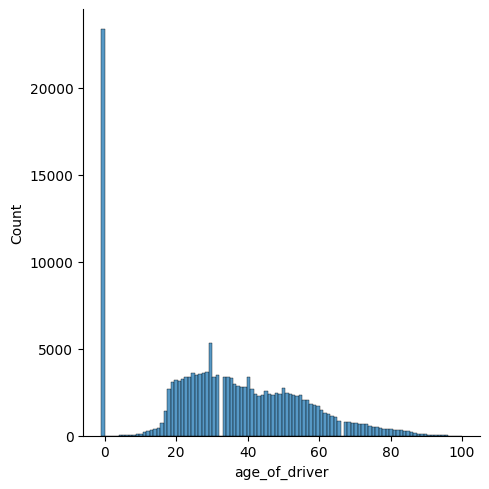

In [90]:
sns.displot(df_vehicle["age_of_driver"])
plt.show()

This is the dsitribution of the age of driver before I fill in missing values with kde


In [91]:
# Filling the missing age of driver values with the kde method 
impute_vehicle.kde_impute("age_of_driver", True)

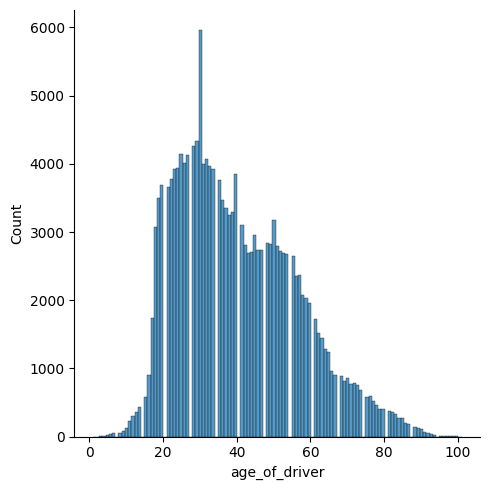

In [92]:
sns.displot(df_vehicle["age_of_driver"])
plt.show()

- This is the dsitribution of the age of driver after I fill in missing values with kde


###### Using the ages, I proceeded to fill in the missing age bands


In [93]:
len(df_vehicle[df_vehicle["age_band_of_driver"] == -1])

23344

In [94]:
# Replacing the missing age band of with the age band impute method
impute_vehicle.age_band_impute("age_band_of_driver", "age_of_driver")

In [95]:
len(df_vehicle[df_vehicle["age_band_of_driver"] == -1])

0

- The age of driver and age band of driver are now sorted


#### I also handled the age of vehicle in a similar fashion to the way I handled the age of driver so...


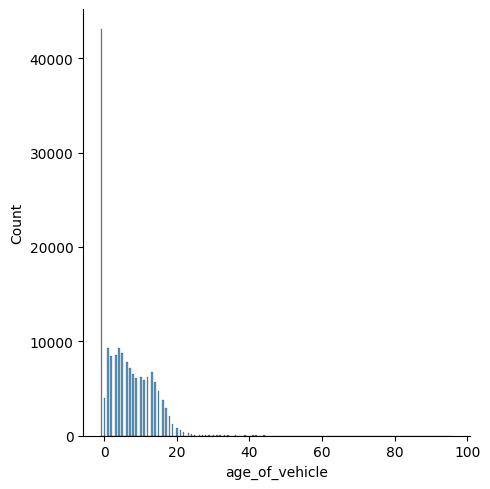

In [96]:
sns.displot(df_vehicle["age_of_vehicle"])
plt.show()

- This is the distribution of the age of vehicle without minus 1 before I apply the KDE


In [97]:
# Filling the missing age of vehicle values with the kde method 
impute_vehicle.kde_impute("age_of_vehicle", True)

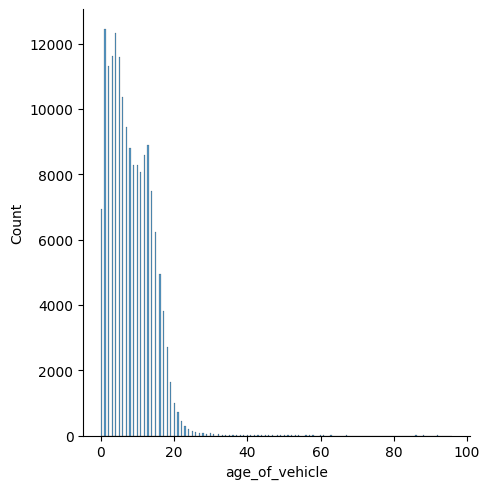

In [98]:
sns.displot(df_vehicle["age_of_vehicle"])
plt.show()

- This is the distribution of the entire age of vehicle after using KDE to replace the missing ages. If you look closely, you will see that the distribution remains the same and so no biases have been introduced


Only vehicles with engines should have a propulsion code and so I will assign every minus 1 value for propulsion code for a vehicle without an engine to 0


In [99]:
df_vehicle[df_vehicle["propulsion_code"] == -1]["vehicle_type"].value_counts()

vehicle_type
9     18506
1     16766
19     1789
90      941
98      768
3       623
21      613
20      493
8       400
97      382
5       330
11      322
4       262
2       191
22      187
10      142
17      122
16       90
23       79
18        9
Name: count, dtype: int64

- There are vehicle types that do not have an engines and so those should be set to 0 as they are not applicable


In [100]:
get_column_info("Vehicle", "propulsion_code")

table       field name code/format                label note
1428  Vehicle  propulsion_code           1               Petrol  NaN
1429  Vehicle  propulsion_code           2            Heavy oil  NaN
1430  Vehicle  propulsion_code           3             Electric  NaN
1431  Vehicle  propulsion_code           4                Steam  NaN
1432  Vehicle  propulsion_code           5                  Gas  NaN
1433  Vehicle  propulsion_code           6     Petrol/Gas (LPG)  NaN
1434  Vehicle  propulsion_code           7          Gas/Bi-fuel  NaN
1435  Vehicle  propulsion_code           8      Hybrid electric  NaN
1436  Vehicle  propulsion_code           9           Gas Diesel  NaN
1437  Vehicle  propulsion_code          10  New fuel technology  NaN
1438  Vehicle  propulsion_code          11           Fuel cells  NaN
1439  Vehicle  propulsion_code          12      Electric diesel  NaN
1440  Vehicle  propulsion_code          -1            Undefined  NaN

In [101]:
# This replaces the -1 for propulsion code where we have a horse, pedal cycle, electric scooter etc with 0
df_vehicle.loc[((df_vehicle["propulsion_code"] == -1) &
                ((df_vehicle["vehicle_type"] == 1) | 
                 (df_vehicle["vehicle_type"] == 18)|
                 (df_vehicle["vehicle_type"] == 16)|
                 (df_vehicle["vehicle_type"] == 22)|
                 (df_vehicle["vehicle_type"] == 23)
                )
               ), "propulsion_code"] = 0

In [102]:
df_vehicle[df_vehicle["propulsion_code"] == -1]["vehicle_type"].value_counts()

vehicle_type
9     18506
19     1789
90      941
98      768
3       623
21      613
20      493
8       400
97      382
5       330
11      322
4       262
2       191
10      142
17      122
Name: count, dtype: int64

- The classes that propulsion code do not apply to have been assigned to 0 and so I replaced the rest based on probabilites


##### I replaced the rest of the propulsion codes based on probability probability impute method from the column impute class


In [103]:
impute_vehicle.probability_impute("propulsion_code")

-1 values in the propulsion_code column of the specified table have been replaced based on probability


In [104]:
len(df_vehicle[df_vehicle["propulsion_code"] == -1]["vehicle_type"])

0

- The propulsion codes are now free of missing values


Again, if we do not have a vehicle that makes use of an engine we cannot have an engine capacity and so I dealt with that.


In [105]:
# This replaces the -1 for engine capacity where we have a horse, pedal cycle, electric scooter etc with 0
df_vehicle.loc[((df_vehicle["engine_capacity_cc"] == -1) &
                ((df_vehicle["vehicle_type"] == 1) | 
                 (df_vehicle["vehicle_type"] == 18)|
                 (df_vehicle["vehicle_type"] == 16)|
                 (df_vehicle["vehicle_type"] == 22)|
                 (df_vehicle["vehicle_type"] == 23)
                )
               ), "engine_capacity_cc"] = 0

In [106]:
df_vehicle[df_vehicle["engine_capacity_cc"] == -1]["vehicle_type"].value_counts()

vehicle_type
9     18854
19     1817
90      944
98      768
21      626
3       625
20      496
8       421
97      391
11      368
5       331
4       266
17      217
2       197
10      142
Name: count, dtype: int64

- We have now replaced the vehicles without engines with 0 so I proceeded to use kde to replace the remaining missing engine capacities


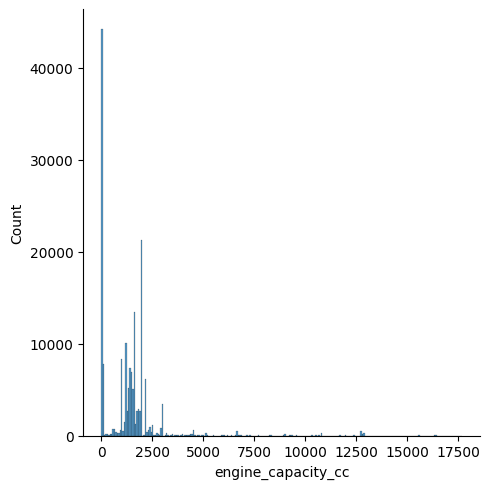

In [107]:
sns.displot(df_vehicle["engine_capacity_cc"])
plt.show()

- Distribution of engine capacity cc before I replace the minus 1 values using kde


In [108]:
impute_vehicle.kde_impute("engine_capacity_cc", True)

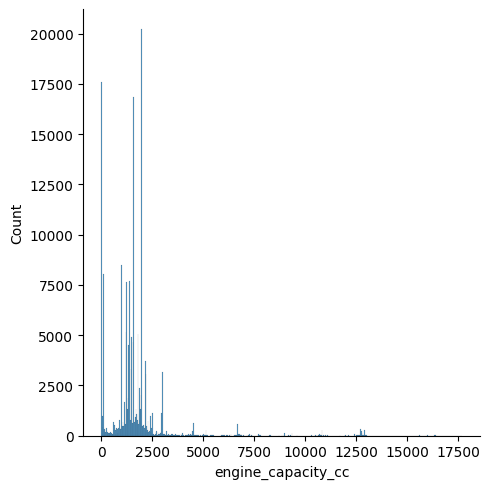

In [109]:
sns.displot(df_vehicle["engine_capacity_cc"])
plt.show()

- Distribution of engine capacity cc after I replace the minus 1 values using kde


- No more -1 in the engine capacity column


The remaining columns in the vehicle table with minus 1 values are categorical and so instead of using KDE, I will use probabilities gotten from the value counts to assign values. <br>

- <b style = "color:red">Note</b> I will come back here if this biases the data in any way but I doubt


In [110]:
vehicle_columns_to_fill = ["towing_and_articulation", "vehicle_manoeuvre", "vehicle_direction_from", "vehicle_direction_to", 
                           "vehicle_location_restricted_lane", "junction_location", "skidding_and_overturning",
                           "hit_object_in_carriageway", "vehicle_leaving_carriageway", "hit_object_off_carriageway",
                           "first_point_of_impact", "vehicle_left_hand_drive", "journey_purpose_of_driver",
                           "journey_purpose_of_driver", "driver_imd_decile", "driver_home_area_type"]


for column in vehicle_columns_to_fill:
    impute_vehicle.probability_impute(column)

-1 values in the towing_and_articulation column of the specified table have been replaced based on probability
-1 values in the vehicle_manoeuvre column of the specified table have been replaced based on probability
-1 values in the vehicle_direction_from column of the specified table have been replaced based on probability
-1 values in the vehicle_direction_to column of the specified table have been replaced based on probability
-1 values in the vehicle_location_restricted_lane column of the specified table have been replaced based on probability
-1 values in the junction_location column of the specified table have been replaced based on probability
-1 values in the skidding_and_overturning column of the specified table have been replaced based on probability
-1 values in the hit_object_in_carriageway column of the specified table have been replaced based on probability
-1 values in the vehicle_leaving_carriageway column of the specified table have been replaced based on probability
-

- There are no more -1 values in the columns above


#### We are now done with cleaning the vehicle table


### Cleaning the casualty table


##### Because I am currently cleaning the casualty table, I created an instance of the column_impute class and parsed in the vehicle dataframe below


In [111]:
impute_casualty = column_impute(df_casualty)

Let us have a look at the casualty table


In [112]:
df_casualty

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [113]:
len(df_casualty[df_casualty["age_of_casualty"] == -1])

2481

- We have missing age of casualty values and so I treated them using the kde method just like I did for the age of driver


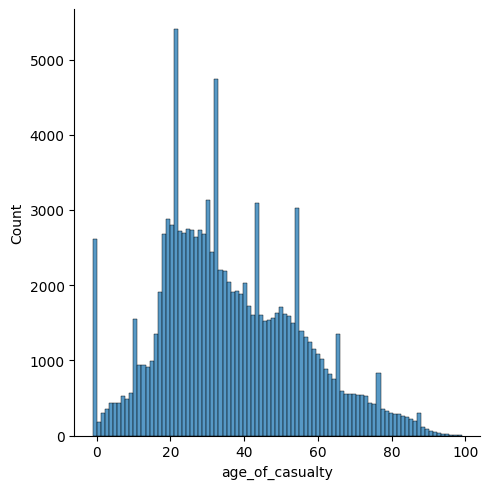

In [114]:
sns.displot(df_casualty["age_of_casualty"])
plt.show()

- Distibution of the age of casualty column before I used kde to fill in the missing values


In [115]:
impute_casualty.kde_impute("age_of_casualty", True)

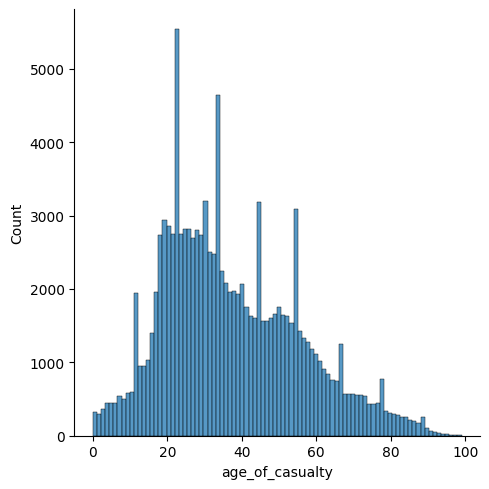

In [116]:
sns.displot(df_casualty["age_of_casualty"])
plt.show()

- Distribution of the age of casualty after using kde to fill in the missing values


I will also use the ages to fill the missing age bands


In [117]:
# Replacing the missing age band of with the age band impute method
impute_casualty.age_band_impute("age_band_of_casualty","age_of_casualty")

In [118]:
len(df_casualty[df_casualty["age_band_of_casualty"] == -1])

0

In [119]:
df_casualty

casualty_index accident_index  accident_year accident_reference  \
0               484748  2020010219808           2020          010219808   
1               484749  2020010220496           2020          010220496   
2               484750  2020010220496           2020          010220496   
3               484751  2020010228005           2020          010228005   
4               484752  2020010228006           2020          010228006   
...                ...            ...            ...                ...   
115579          600327  2020991027064           2020          991027064   
115580          600328  2020991029573           2020          991029573   
115581          600329  2020991030297           2020          991030297   
115582          600330  2020991030900           2020          991030900   
115583          600331  2020991032575           2020          991032575   

        vehicle_reference  casualty_reference  casualty_class  \
0                       1                   1               3   
1                       1                   1               3   
2                       1                   2               3   
3                       1                   1               3   
4                       1                   1               3   
...                   ...                 ...             ...   
115579                  2                   1               1   
115580                  1                   1               3   
115581                  2                   1               1   
115582                  2                   1               1   
115583                  1                   1               3   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
0                     1               31                     6   
1                     2                2                     1   
2                     2                4                     1   
3                     1               23                     5   
4                     1               47                     8   
...                 ...              ...                   ...   
115579                1               11                     3   
115580                2               63                     9   
115581                1               38                     7   
115582                1               76                    11   
115583                1               48                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
0                       3                    9                    5   
1                       3                    1                    1   
2                       3                    1                    1   
3                       3                    5                    9   
4                       2                    4                    1   
...                   ...                  ...                  ...   
115579                  2                    0                    0   
115580                  3                   10                    1   
115581                  2                    0                    0   
115582                  3                    0                    0   
115583                  3                    9                    9   

        car_passenger  bus_or_coach_passenger  \
0                   0                       0   
1                   0                       0   
2                   0                       0   
3                   0                       0   
4                   0                       0   
...               ...                     ...   
115579              0                       0   
115580              0                       0   
115581              0                       0   
115582              0                       0   
115583              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
0                             

In [120]:
df_casualty[df_casualty["casualty_imd_decile"] == -1]

casualty_index accident_index  accident_year accident_reference  \
6               484754  2020010228011           2020          010228011   
12              484760  2020010228022           2020          010228022   
14              484762  2020010228024           2020          010228024   
20              484768  2020010228037           2020          010228037   
21              484769  2020010228038           2020          010228038   
...                ...            ...            ...                ...   
115510          600258  2020991011410           2020          991011410   
115520          600268  2020991012044           2020          991012044   
115525          600273  2020991012280           2020          991012280   
115532          600280  2020991012610           2020          991012610   
115569          600317  2020991020957           2020          991020957   

        vehicle_reference  casualty_reference  casualty_class  \
6                       1                   2               3   
12                      1                   1               1   
14                      1                   2               2   
20                      1                   1               1   
21                      1                   1               1   
...                   ...                 ...             ...   
115510                  2                   1               1   
115520                  1                   2               1   
115525                  1                   1               3   
115532                  1                   1               3   
115569                  2                   1               1   

        sex_of_casualty  age_of_casualty  age_band_of_casualty  \
6                     2               33                     6   
12                    1               26                     6   
14                    2               20                     4   
20                    2               26                     6   
21                    1               29                     6   
...                 ...              ...                   ...   
115510                1               55                     8   
115520                2               26                     6   
115525                1               33                     6   
115532                2               77                    11   
115569                1               52                     8   

        casualty_severity  pedestrian_location  pedestrian_movement  \
6                       3                    6                    9   
12                      3                    0                    0   
14                      2                    0                    0   
20                      3                    0                    0   
21                      1                    0                    0   
...                   ...                  ...                  ...   
115510                  3                    0                    0   
115520                  3                    0                    0   
115525                  2                    9                    6   
115532                  3                    5                    3   
115569                  3                    0                    0   

        car_passenger  bus_or_coach_passenger  \
6                   0                       0   
12                  0                       0   
14                  1                       0   
20                  0                       0   
21                  0                       0   
...               ...                     ...   
115510              0                       0   
115520              0                       0   
115525              0                       0   
115532              0                       0   
115569              0                       0   

        pedestrian_road_maintenance_worker  casualty_type  \
6                             

#### After thoroughly looking at the other columns (which are categorical), the best way to handle the minus 1 values is to input them based on probabilities to avoid bias


In [121]:
casualty_missing_descrete = ["pedestrian_location", "pedestrian_movement", "car_passenger", "bus_or_coach_passenger",
                             "pedestrian_road_maintenance_worker","casualty_home_area_type", "casualty_imd_decile"]

for column in casualty_missing_descrete:
    impute_casualty.probability_impute(column)

-1 values in the pedestrian_location column of the specified table have been replaced based on probability
-1 values in the pedestrian_movement column of the specified table have been replaced based on probability
-1 values in the car_passenger column of the specified table have been replaced based on probability
-1 values in the bus_or_coach_passenger column of the specified table have been replaced based on probability
-1 values in the pedestrian_road_maintenance_worker column of the specified table have been replaced based on probability
-1 values in the casualty_home_area_type column of the specified table have been replaced based on probability
-1 values in the casualty_imd_decile column of the specified table have been replaced based on probability


#### This concludes data cleaning for now


### To answer questions 1 to 3, I decided to create a class with different methods for plotting.

- This because a lot of the code used to answer the questions are repetitive and the approaches are very similar


#### About the "accident_occurrence_plots" class;

(1) The class is instantiated with one parameter biegn the dataframe to explore and contains 3 methods <br />
(2) The methods of the class include the plot_accident_count_vs_day, the plot_accident_count_vs_day and the plot_hours_distribution_for_each_day methods


#### About the "accident_occurrence_plots" methods;

<h4 style="text-decoration: underline;">(1) plot_hours_distribution</h4>
<p> The plot hours distribution makes use of the seaborn histplot method to plot the distribution of time in decimal form of a specified dataframe (already instantiated with the class)</p>
<p> The method takes the title of the plot and the name of the column with the decimal time in the dataframe to be plotted as parameters</p>

<h4 style="text-decoration: underline;">(2) plot_accident_count_vs_day</h4>
<p> The plot accident count vs day method makes use of the seaborn countplot method to plot the count of the accidents for each day of the week in the specified dataframe</p>
<p> The method takes in two parameters beign the title of the plot and the column in the dataframe that has the days of the week</p>

<h4 style="text-decoration: underline;">(3) plot_hours_distribution_for_each_day</h4>
<p> This method makes 7 different time distribution plots for each day of the week for the accidents that occur</p>
<p> The method takes in a three parameters beign the title of the plot, the name of the column with the day of the week, and name of the column with the time in the dataframe </p>


In [122]:
class accident_occurrence_plots:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
    def plot_hours_distribution(self, title, decimal_time_column):
        dataframe = self.dataframe
        
        # (1) Setting the plot size
        plt.figure(figsize=(10, 6))
        
        # (2) Plotting the distribution of the time of the specified dataframe
        sns.histplot(dataframe[decimal_time_column], kde=True, bins=24)
        
        # (4) Adding the number of accidents to display on top of each bar
        for idx, count in enumerate(sns.histplot(dataframe[decimal_time_column], kde=True, bins=24).patches):
            height = count.get_height()
            plt.text(count.get_x() + count.get_width() / 2, height + 0.5, int(height), ha="center")
            
        # (5) Labeling the x ticks to start from 0 and end at 0 (in a 24 hour clock the 24th hour is reperesented as 0)
        plt.xlim(0,24)
        hours = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0]
        plt.xticks(range(len(hours)), hours)

        # (6) Adding the x label, the y label and the title
        plt.xlabel("Hours of the day")
        plt.ylabel("Number of Accidents")
        plt.title(f"Distribution of hours in the day that accidents occur {title}")

        # (7) Returning the plot
        return plt.show()
        
    def plot_accident_count_vs_day(self, title, day_of_week_column):
        dataframe = self.dataframe
        
        # (!) Setting the size of the plot
        plt.figure(figsize=(10, 6))
        
        # (2) Assigning the count plot for each day of the week of the specified dataframe to a variable "ax"
        ax = sns.countplot(data = dataframe, x = day_of_week_column)

        # (3) iterating over the bars and adding the count on top of each bar 
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10),textcoords='offset points')

        # (4) Changing the x-ticks to names of the days
        days_of_week = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        ax.set_xticklabels(days_of_week)

        # (5) Adding the x label, the y label and the title 
        plt.xlabel("Day of the Week")
        plt.ylabel("Number of accidents")
        plt.title(f"Accident Occurrences by Day of the Week {title}")
        
        # (6) Returning the plot
        return plt.show()
    
    def plot_hours_distribution_for_each_day(self, title, day_of_week_column, decimal_time_column):
        dataframe = self.dataframe
        
        # (1) Creating a list that contains each day of the week
        days_of_week = ["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
        
        # (2) iterating through each day of the week
        for idx, day in enumerate(days_of_week):
            plt.figure(figsize=(7, 4))
            
            # (3) Plotting the distribution of the time of the specified dataframe for the day in iteration "idx"
            sns.histplot(dataframe[dataframe[day_of_week_column] == idx+1][decimal_time_column], kde=True, bins=24)
            
            # (4) Adding the number of accidents to display on top of each bar for the day in iteration "idx"
            for idx, count in enumerate(sns.histplot(dataframe[dataframe[day_of_week_column] == idx+1]
                                                     [decimal_time_column], 
                                                     kde=True, bins=24).patches):
                height = count.get_height()
                plt.text(count.get_x() + count.get_width() / 2, height + 0.5, int(height), ha="center")
                
            # (5) Labeling the x ticks to start from 0 and end at 0 for the day in iteration "idx"
            plt.xlim(0,24)
            times = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0]
            plt.xticks(range(len(times)), times)
            
            # (6) Adding the x label, the y label and the title
            plt.xlabel("Hours of the day")
            plt.ylabel("Number of Accidents")
            plt.title(f"Distribution of hours in the day that accidents occur on {day}s {title}")

            # (7) how the plot
            plt.show()

<b>Below, I defined a function to convert the time column in df_accident to decimal time</b><br>

- This is because the methods in the "accident_occurrence_plots" defines above expects time in decimal time


In [123]:
def get_decimal_time(time):
    time_split = time.split(":")
    hours = int(time_split[0])
    minutes = int(time_split[1])
    decimal_time = hours + (minutes/60)
    
    return round(decimal_time, 2)

- Using the get_time_decimal function to convert the time to decimal time


In [124]:
df_accident["time"] = df_accident["time"].apply(get_decimal_time)

In [125]:
df_accident[["time"]].head(10)

time
0   9.00
1  13.92
2   1.42
3   1.83
4   2.42
5   1.50
6   3.72
7   3.00
8   4.00
9   3.42

- The time column in df_accident has now been transformed to the time decimal form


## Question 1

- Are there significant hours of the day, and days of the week, on which accidents occur?


##### To find if there are any significant hours of the day on which accidents occur, I will carry out a series of steps.


<b>(1) I created an instance of the "accident_occurrence_plots" class and parsed in the accident table</b>


In [126]:
overall_plots = accident_occurrence_plots(df_accident)

<b>(2) Using the "plot_hours_distribution" method, I plotted the time distribution of when accidents occur</b>


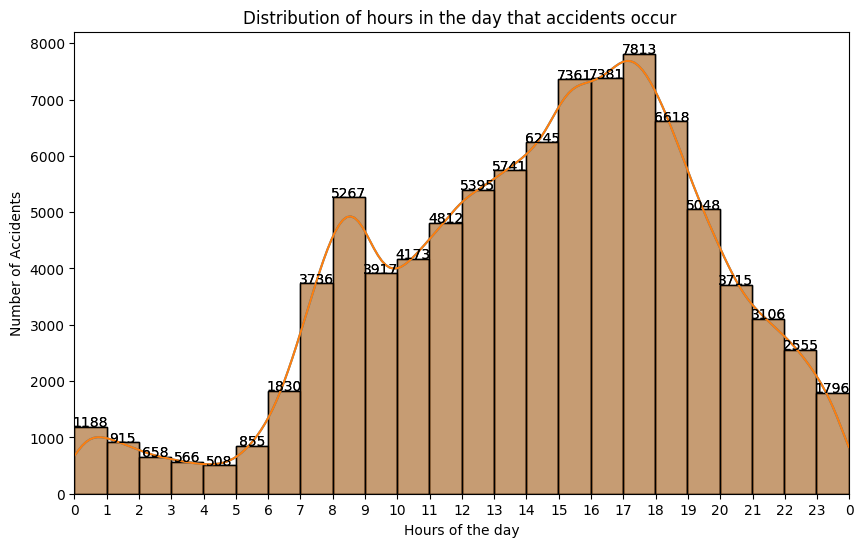

In [127]:
overall_plots.plot_hours_distribution("", "time")

<b>(3) Using the "plot_accident_count_vs_day" method, I plotted the count of the number of accidents occur each day</b>


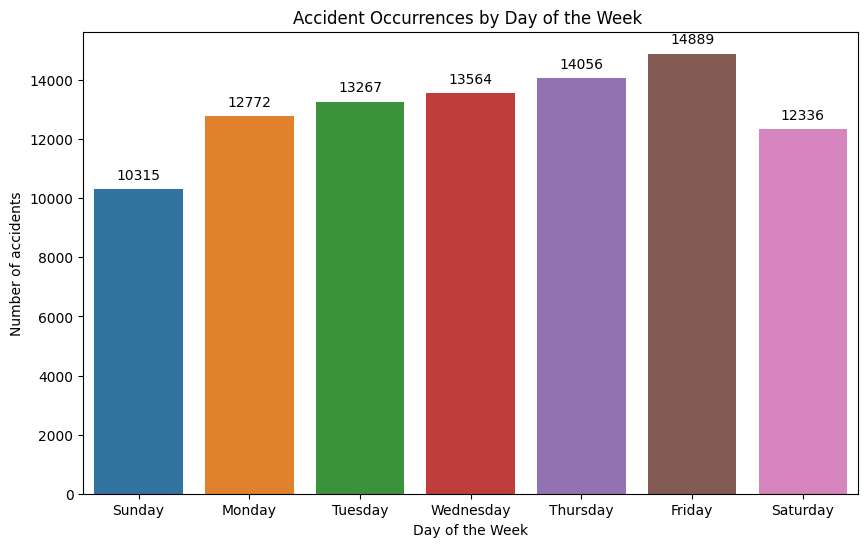

In [128]:
overall_plots.plot_accident_count_vs_day("", "day_of_week")

<b> (4) Using the "plot_hours_distribution_for_each_day" method, I plotted the distribution of the hours that accident occur for each day of the week </b>


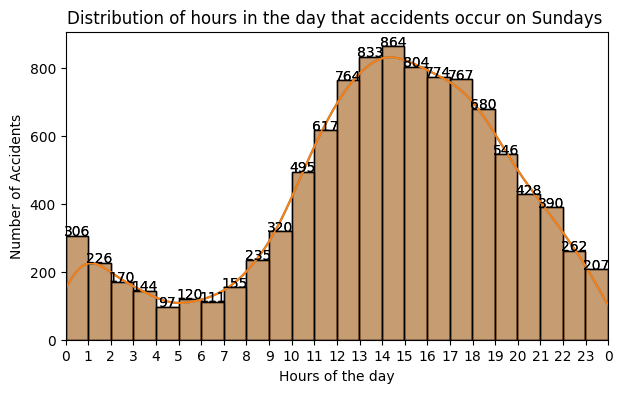

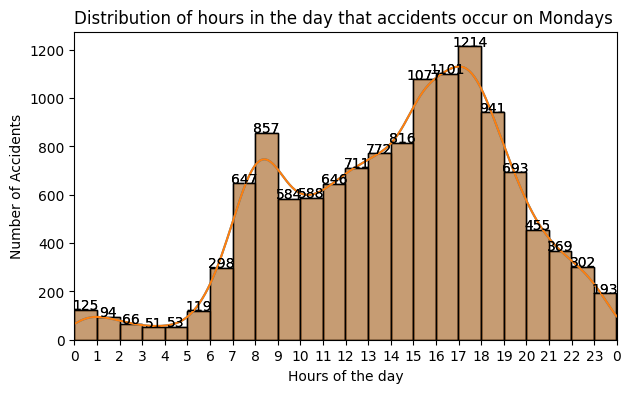

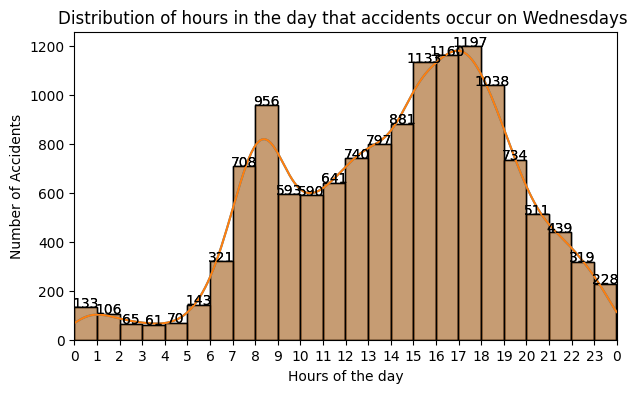

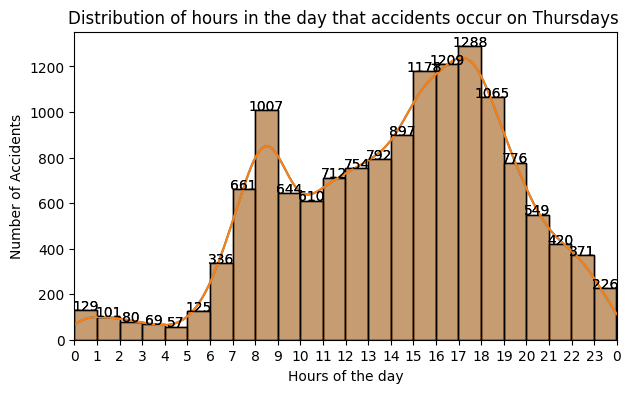

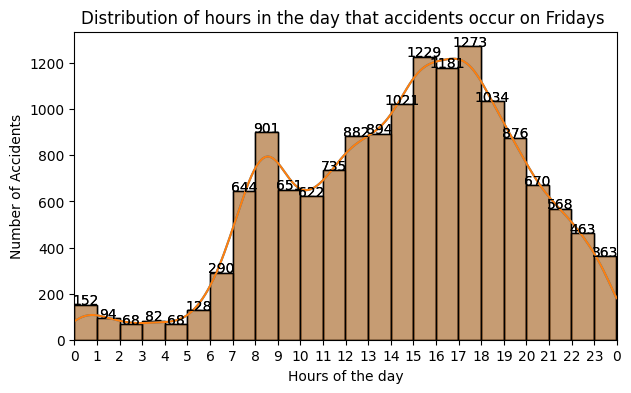

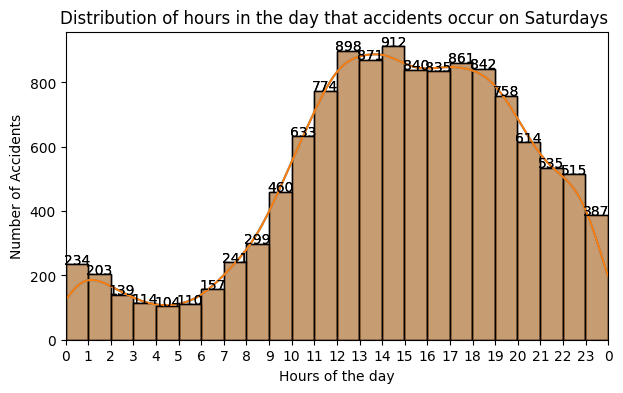

In [129]:
overall_plots.plot_hours_distribution_for_each_day("", "day_of_week", "time")

## Question 2

- For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur? We suggest a focus on: Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc, and Motorcycle over 500cc


<b>(1) I started by merging the accident and vehicle tables together to allow access to the vehicle types</b>


In [130]:
accident_x_vehicle = pd.merge(df_accident, df_vehicle, on="accident_index", how="right")

#### (2) Then created 3 separate instances of the accident occurrence class for the Motorcycle 125cc and under, Motorcycle over 125cc and up to 500cc and the Motorcycle over 500cc respectively


In [131]:
Motorcycle_125cc_and_under = accident_occurrence_plots(accident_x_vehicle[(accident_x_vehicle["vehicle_type"] == 2) |
                                                                          (accident_x_vehicle["vehicle_type"] == 3)])
Motorcycle_over_125cc_and_up_to_500cc = accident_occurrence_plots(accident_x_vehicle[accident_x_vehicle["vehicle_type"] == 4])
Motorcycle_over_500cc = accident_occurrence_plots(accident_x_vehicle[accident_x_vehicle["vehicle_type"] == 5])

#### (3) I created a functions to call the "plot_hours_distribution" and the "plot_accident_count_vs_day" methods for the three motorbike types


In [132]:
def plot_all_motorbikes():
    bikes = {
        0: [Motorcycle_125cc_and_under, " for Motorcycle 125cc and under"],
        1: [Motorcycle_over_125cc_and_up_to_500cc, "for Motorcycle over 125cc and up to 500cc"],
        2: [Motorcycle_over_500cc, "for Motorcycle over 500cc"]
    }
    for k,v in bikes.items():
        v[0].plot_hours_distribution(v[1], "time")
        v[0].plot_accident_count_vs_day(v[1], "day_of_week")

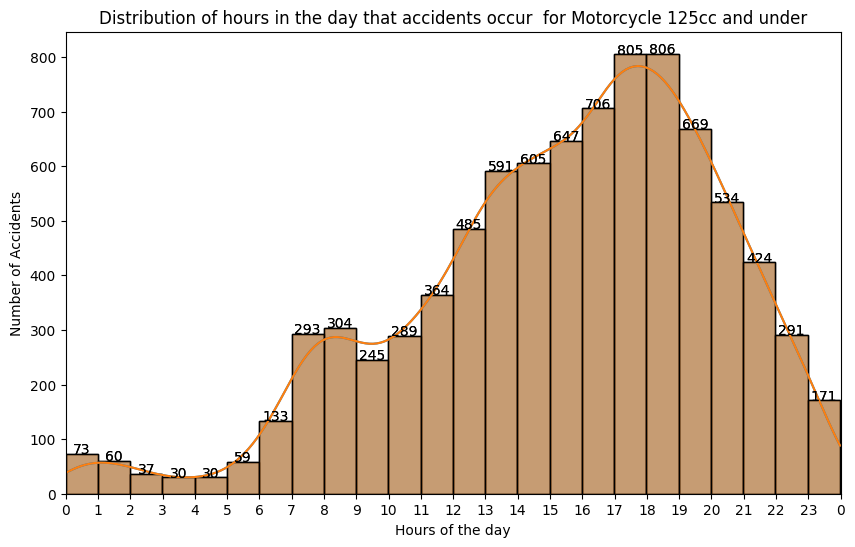

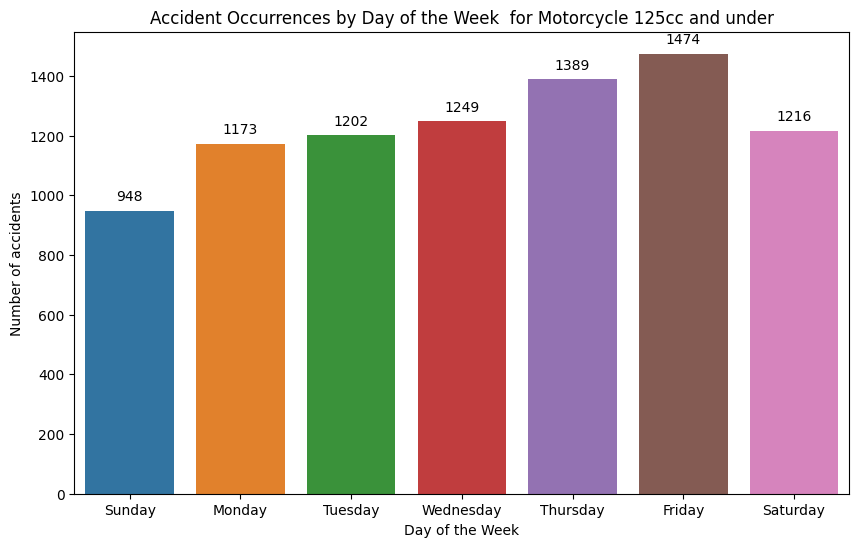

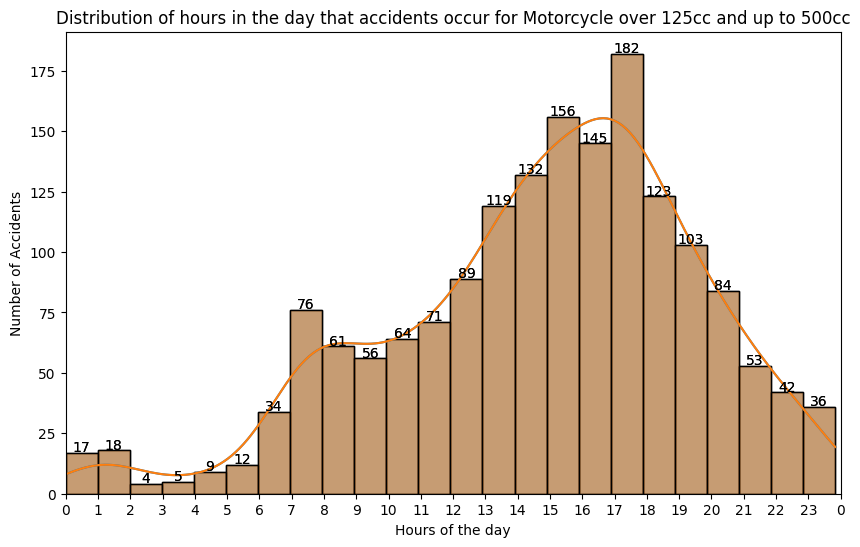

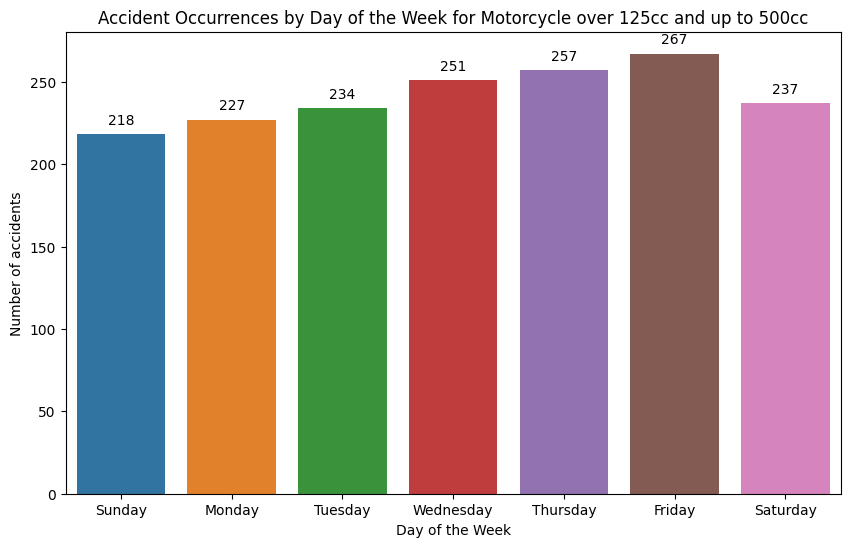

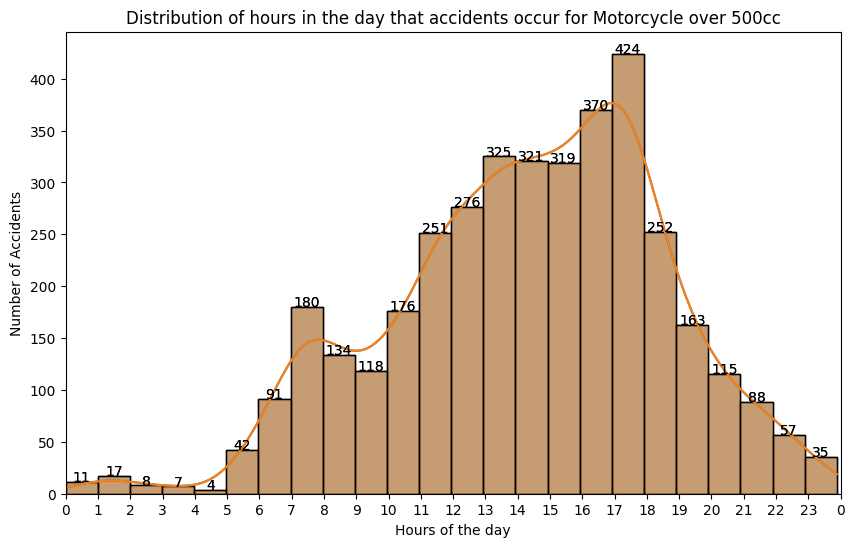

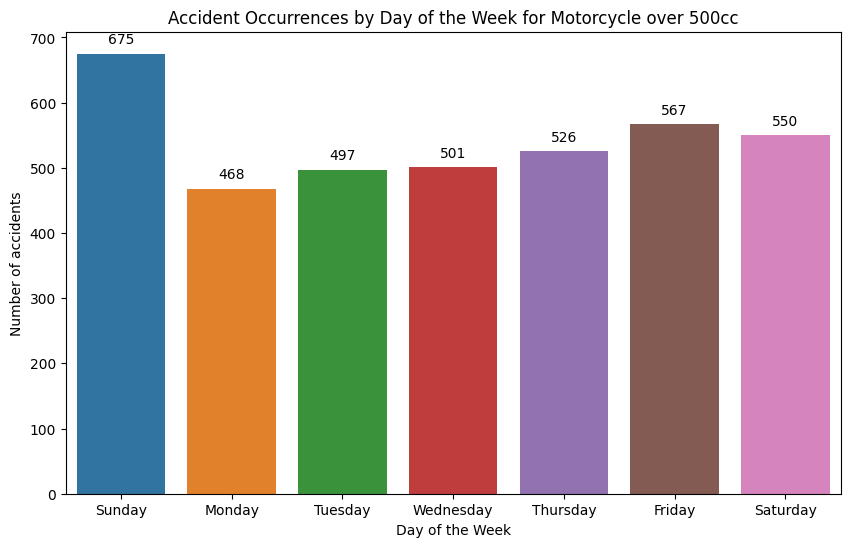

In [133]:
plot_all_motorbikes()

## Question 3

- For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?


<b>(1) I started by merging the accident and casualty tables together to allow access to the casualty types</b>


In [134]:
accident_x_casualty_merge = pd.merge(df_accident, df_casualty, on="accident_index", how="right")

#### (2) Then created an instance of the accident occurrence class using the dataframe for where the casualty class is 3 which reperesents pedestrains as seen in the catalogue below


In [135]:
get_column_info("Casualty", "casualty_class")

table      field name code/format            label note
1471  Casualty  casualty_class           1  Driver or rider  NaN
1472  Casualty  casualty_class           2        Passenger  NaN
1473  Casualty  casualty_class           3       Pedestrian  NaN

In [136]:
pedestrian_df = accident_x_casualty_merge[accident_x_casualty_merge["casualty_class"] == 3]
pedestrian_plots = accident_occurrence_plots(pedestrian_df)

<b>(3) Using the "plot_hours_distribution" method, I plotted the time distribution of when accidents occur for pedestrians</b>


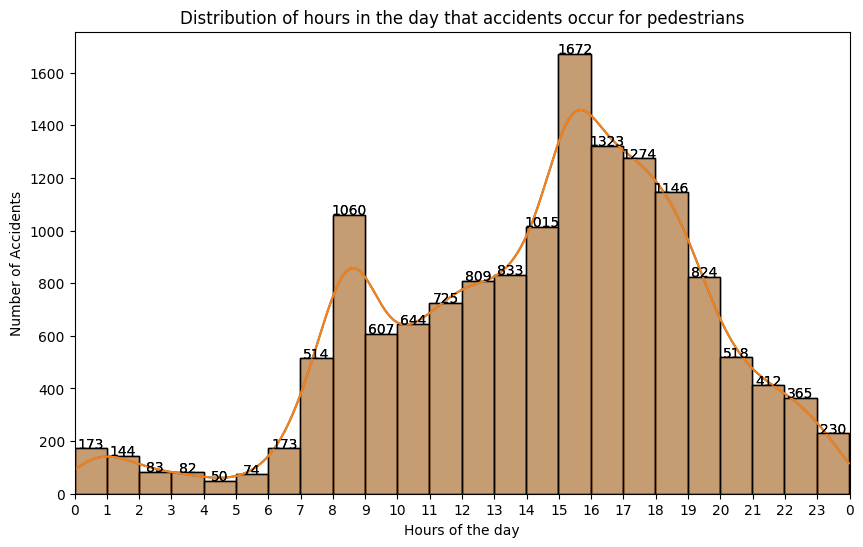

In [137]:
pedestrian_plots.plot_hours_distribution("for pedestrians", "time")

<b>(4) Using the "plot_accident_count_vs_day" method, I plotted the count of the number of accidents occur each day for pedestrians</b>


In [138]:
pedestrian_plots.plot_accident_count_vs_day("for pedestrians", "day_of_week")

<b> (5) Using the "plot_hours_distribution_for_each_day" method, I plotted the distribution of the hours that accident occur for each day of the week </b>


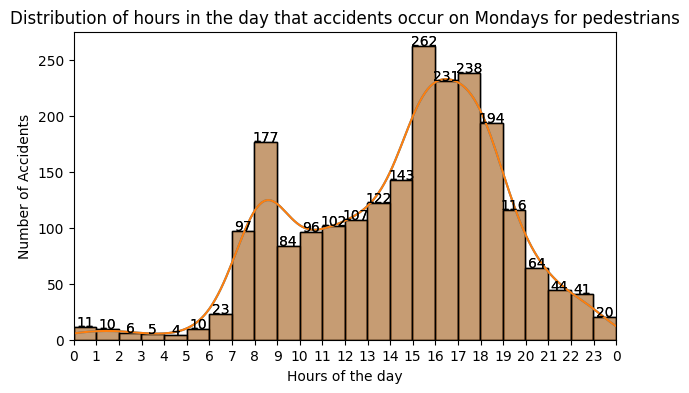

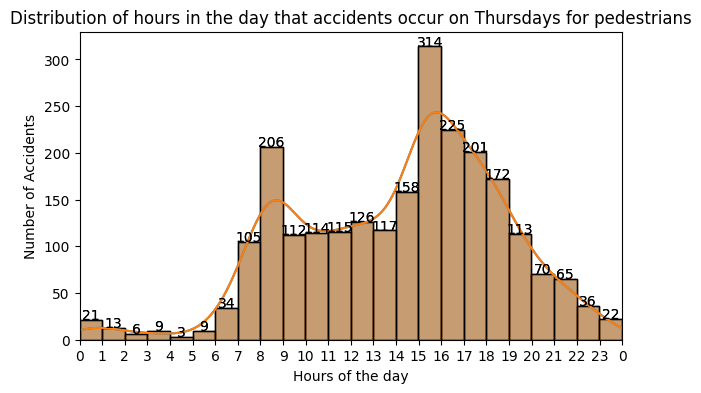

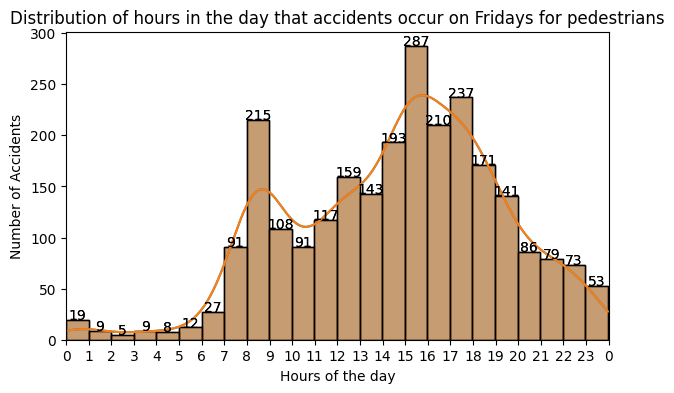

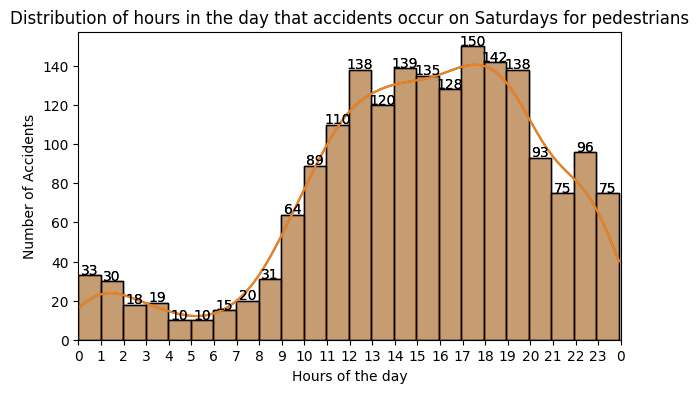

In [139]:
pedestrian_plots.plot_hours_distribution_for_each_day("for pedestrians", "day_of_week", "time")

## Question 4

- Using the apriori algorithm, explore the impact of selected variables on accident severity.


#### (1) I started by merging the accident, the vehicle and the casualty tables together


In [140]:
merged_df = pd.merge(pd.merge(df_accident, df_vehicle, on="accident_index", how="left"), 
                     df_casualty, 
                     on="accident_index",
                     how="left")

#### (2) After merging the tables, I realized there were several cases of several rows referring to the same accident and so I wrote a function to merge such columns together


In [141]:
# Function to select random value from a list (excluding 'Name')
def select_random(x):
    if len(x) > 1:
        return np.random.choice(x)
    else:
        return x.iloc[0]
    
    
# Merge rows with the same 'Name' into one row with random values
merged_df.groupby('accident_index').agg(lambda x: select_random(x)).reset_index()

accident_index  accident_year_x accident_reference_x  \
0      2020010219808             2020            010219808   
1      2020010220496             2020            010220496   
2      2020010228005             2020            010228005   
3      2020010228006             2020            010228006   
4      2020010228011             2020            010228011   
...              ...              ...                  ...   
91194  2020991027064             2020            991027064   
91195  2020991029573             2020            991029573   
91196  2020991030297             2020            991030297   
91197  2020991030900             2020            991030900   
91198  2020991032575             2020            991032575   

       location_easting_osgr  location_northing_osgr  longitude   latitude  \
0                   521389.0                175144.0  -0.254001  51.462262   
1                   529337.0                176237.0  -0.139253  51.470327   
2                   526432.0                182761.0  -0.178719  51.529614   
3                   538676.0                184371.0  -0.001683  51.541210   
4                   529324.0                181286.0  -0.137592  51.515704   
...                      ...                     ...        ...        ...   
91194               343034.0                731654.0  -2.926320  56.473539   
91195               257963.0                658891.0  -4.267565  55.802353   
91196               383664.0                810646.0  -2.271903  57.186317   
91197               277161.0                674852.0  -3.968753  55.950940   
91198               240402.0                681950.0  -4.561040  56.003843   

       police_force  accident_severity  number_of_vehicles  \
0                 1                  3                   1   
1                 1                  3                   1   
2                 1                  3                   1   
3                 1                  2                   1   
4                 1                  3                   1   
...             ...                ...                 ...   
91194            93                  2                   2   
91195            97                  3                   1   
91196            92                  2                   2   
91197            97                  3                   2   
91198            97                  3                   1   

       number_of_casualties        date  day_of_week   time  \
0                         1  04/02/2020            3   9.00   
1                         2  27/04/2020            2  13.92   
2                         1  01/01/2020            4   1.42   
3                         1  01/01/2020            4   1.83   
4                         2  01/01/2020            4   2.42   
...                     ...         ...          ...    ...   
91194                     1  12/08/2020            4  14.50   
91195                     1  13/11/2020            6  15.08   
91196                     1  15/04/2020            4  12.70   
91197                     1  15/12/2020            3  14.00   
91198                     1  25/08/2020            3  13.83   

       local_authority_district local_authority_ons_district  \
0                            10                    E09000032   
1                             9                    E09000022   
2                             1                    E09000033   
3                            17                    E09000025   
4                             1                    E09000033   
...                         ...                          ...   
91194                       918                    S12000042   
91195                       922                    S12000011   
91196                       910                    S12000033   
91197                       932                    S12000044   
91198                       916                    S12000039   

      local_authority_highway  first_road_class  firs

#### (3) I then dropped all the continuous variables and columns I felt would not be important to for the apriori and assigned it to a variable "data_for_apriori"


In [142]:
data_for_apriori = merged_df.drop(columns = ["accident_index", "accident_year_x","accident_year_y", "accident_year",
                                             "accident_reference_x", "accident_reference_y", "accident_reference",
                                             "vehicle_reference_x", "vehicle_reference_y","casualty_reference",
                                             "accident_reference", "location_easting_osgr","location_northing_osgr",
                                             "longitude", "latitude", "number_of_vehicles", "number_of_casualties",
                                             "date", "time", "local_authority_ons_district", "local_authority_district", 
                                             "local_authority_highway", "first_road_number", "second_road_number",
                                             "did_police_officer_attend_scene_of_accident", "lsoa_of_accident_location", 
                                             "vehicle_index", "age_of_driver", "age_of_casualty", "engine_capacity_cc",
                                             "generic_make_model", "casualty_index", "casualty_severity",
                                             "age_band_of_casualty",  "police_force"])

#### (4) Although it is not necesarry, I decided to use the selectkbest method to assist me in selecting the variables to be used for the aprirori


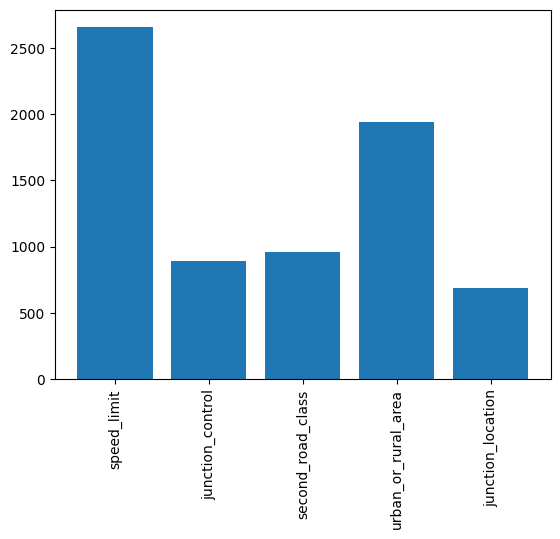

In [143]:
aprirori_x = data_for_apriori.drop(columns = ["accident_severity"])
aprirori_y = data_for_apriori["accident_severity"].apply(lambda x : True if x == 1 else False)

selector = SelectKBest(f_classif, k=5)
selector.fit(aprirori_x, aprirori_y)

mask = selector.get_support()
names = selector.feature_names_in_[mask]


scores = selector.scores_[mask]


plt.bar(names, scores)
plt.xticks(rotation = "vertical")
plt.show()

#### (5) Using the accident severity and the top 3 variables from the kbest selection, I created a dataframe for the apriori and one hot encoded them


In [144]:
apriori_selected_variables = data_for_apriori[["accident_severity","speed_limit", "urban_or_rural_area", "junction_control"]]
apriori_selected_variables = apriori_selected_variables.astype("object")
apriori_selected_variables = pd.get_dummies(apriori_selected_variables)
apriori_selected_variables = apriori_selected_variables.astype(int)
apriori_selected_variables

accident_severity_1  accident_severity_2  accident_severity_3  \
0                         0                    0                    1   
1                         0                    0                    1   
2                         0                    0                    1   
3                         0                    0                    1   
4                         0                    1                    0   
...                     ...                  ...                  ...   
220430                    0                    1                    0   
220431                    0                    1                    0   
220432                    0                    0                    1   
220433                    0                    0                    1   
220434                    0                    0                    1   

        speed_limit_20  speed_limit_30  speed_limit_40  speed_limit_50  \
0                    1               0               0               0   
1                    1               0               0               0   
2                    1               0               0               0   
3                    0               1               0               0   
4                    0               1               0               0   
...                ...             ...             ...             ...   
220430               0               0               0               0   
220431               0               0               0               0   
220432               0               1               0               0   
220433               0               1               0               0   
220434               0               1               0               0   

        speed_limit_60  speed_limit_70  urban_or_rural_area_1  \
0                    0               0                      1   
1                    0               0                      1   
2                    0               0                      1   
3                    0               0                      1   
4                    0               0                      1   
...                ...             ...                    ...   
220430               1               0                      0   
220431               1               0                      0   
220432               0               0                      1   
220433               0               0                      1   
220434               0               0                      1   

        urban_or_rural_area_2  urban_or_rural_area_3  junction_control_0  \
0                           0                      0                   1   
1                           0                      0                   0   
2                           0                      0                   0   
3                           0                      0                   0   
4                           0                      0                   1   
...                       ...                    ...                 ...   
220430                      1                      0                   0   
220431                      1                      0                   0   
220432                      0                      0                   0   
220433                      0                      0                   0   
220434                      0                      0                   1   

        junction_control_1  junction_control_2  junction_control_3  \
0                        0                   0                   0   
1                        0                   1                   0   
2                        0                   1                   0   
3                        1                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
220430                   0                   0            

- As you can see the variables have been one hot encoded


#### (6) Using apriori with apriori_selected_variables dataframe and a min support of 0.3, I was able to get the frequent item sets


In [212]:
freq_item_sets = apriori(apriori_selected_variables, min_support=0.2, use_colnames = True)
freq_item_sets

support                                                          itemsets
0   0.203362                                             (accident_severity_2)
1   0.777445                                             (accident_severity_3)
2   0.542627                                                  (speed_limit_30)
3   0.642634                                           (urban_or_rural_area_1)
4   0.357212                                           (urban_or_rural_area_2)
5   0.421807                                              (junction_control_0)
6   0.434777                                              (junction_control_4)
7   0.439182                             (accident_severity_3, speed_limit_30)
8   0.525701                      (accident_severity_3, urban_or_rural_area_1)
9   0.251607                      (accident_severity_3, urban_or_rural_area_2)
10  0.310881                         (accident_severity_3, junction_control_0)
11  0.344074                         (accident_severity_3, junction_control_4)
12  0.464717                           (speed_limit_30, urban_or_rural_area_1)
13  0.271273                              (speed_limit_30, junction_control_4)
14  0.205802                       (urban_or_rural_area_1, junction_control_0)
15  0.309883                       (urban_or_rural_area_1, junction_control_4)
16  0.215959                       (urban_or_rural_area_2, junction_control_0)
17  0.378533      (speed_limit_30, accident_severity_3, urban_or_rural_area_1)
18  0.220156         (speed_limit_30, accident_severity_3, junction_control_4)
19  0.253703  (accident_severity_3, urban_or_rural_area_1, junction_control_4)
20  0.234700       (speed_limit_30, urban_or_rural_area_1, junction_control_4)

#### (7) Using the frequent Item set with a minimum lift of 0.5, I was able to get some association rules


In [213]:
rules = association_rules(freq_item_sets, metric = "lift", min_threshold = 0.5)
rules

antecedents  \
0                          (accident_severity_3)   
1                               (speed_limit_30)   
2                          (accident_severity_3)   
3                        (urban_or_rural_area_1)   
4                          (accident_severity_3)   
5                        (urban_or_rural_area_2)   
6                          (accident_severity_3)   
7                           (junction_control_0)   
8                          (accident_severity_3)   
9                           (junction_control_4)   
10                              (speed_limit_30)   
11                       (urban_or_rural_area_1)   
12                              (speed_limit_30)   
13                          (junction_control_4)   
14                       (urban_or_rural_area_1)   
15                          (junction_control_0)   
16                       (urban_or_rural_area_1)   
17                          (junction_control_4)   
18                       (urban_or_rural_area_2)   
19                          (junction_control_0)   
20         (accident_severity_3, speed_limit_30)   
21       (urban_or_rural_area_1, speed_limit_30)   
22  (accident_severity_3, urban_or_rural_area_1)   
23                              (speed_limit_30)   
24                         (accident_severity_3)   
25                       (urban_or_rural_area_1)   
26         (accident_severity_3, speed_limit_30)   
27          (junction_control_4, speed_limit_30)   
28     (accident_severity_3, junction_control_4)   
29                              (speed_limit_30)   
30                         (accident_severity_3)   
31                          (junction_control_4)   
32  (accident_severity_3, urban_or_rural_area_1)   
33     (accident_severity_3, junction_control_4)   
34   (junction_control_4, urban_or_rural_area_1)   
35                         (accident_severity_3)   
36                       (urban_or_rural_area_1)   
37                          (junction_control_4)   
38       (urban_or_rural_area_1, speed_limit_30)   
39          (junction_control_4, speed_limit_30)   
40   (junction_control_4, urban_or_rural_area_1)   
41                              (speed_limit_30)   
42                       (urban_or_rural_area_1)   
43                          (junction_control_4)   

                                     consequents  antecedent support  \
0                               (speed_limit_30)            0.777445   
1                          (accident_severity_3)            0.542627   
2                        (urban_or_rural_area_1)            0.777445   
3                          (accident_severity_3)            0.642634   
4                        (urban_or_rural_area_2)            0.777445   
5                          (accident_severity_3)            0.357212   
6                           (junction_control_0)            0.777445   
7                          (accident_severity_3)            0.421807   
8                           (junction_control_4)            0.777445   
9                          (accident_severity_3)            0.434777   
10                       (urban_or_rural_area_1)            0.542627   
11                              (speed_limit_30)            0.642634   
12                          (junction_control_4)            0.542627   
13                              (speed_limit_30)            0.434777   
14                          (junction_control_0)            0.642634   
15                       (urban_or_rural_area_1)            0.421807   
16                          (junction_control_4)            0.642634   
17                       (urban_or_rural_area_1)            0.434777   
18                          (junction_control_0)            0.357212   
19                       (urban_or_rural_area_2)            0.421807   
20                       (urban_or_rural_area_1)            0.439182   
21                         (accident_severity_3)            0.464717   
22                              (speed_l

#### (8) But the issue is that we need rules for accident severity and so I wrote a function that would add an extra boolean column to the association rules dataframe

- The column would be true if it has any accident severity as a consequent and I achieved that with the help of the bool_accident_severity_consequence_rows function that I wrote below


In [214]:
def bool_accident_severity_consequence_rows(consequence):
    if len(consequence) == 1:
        if "accident_severity" in list(consequence)[0] :
            return True
        else:
            return False
    else:
        return False

# Applying the function to add the bool column  
rules["accident_severity_consequence"] = rules["consequents"].apply(bool_accident_severity_consequence_rows)

#### I then use the new "accident_severity_consequence" column to filter the association rules to contain only rules with a accident severity as the consequents

- I stored these rules in the variable "rules_for_accident_severity"


In [215]:
rules_for_accident_severity = rules[rules["accident_severity_consequence"] == True]
rules_for_accident_severity

antecedents            consequents  \
1                              (speed_limit_30)  (accident_severity_3)   
3                       (urban_or_rural_area_1)  (accident_severity_3)   
5                       (urban_or_rural_area_2)  (accident_severity_3)   
7                          (junction_control_0)  (accident_severity_3)   
9                          (junction_control_4)  (accident_severity_3)   
21      (urban_or_rural_area_1, speed_limit_30)  (accident_severity_3)   
27         (junction_control_4, speed_limit_30)  (accident_severity_3)   
34  (junction_control_4, urban_or_rural_area_1)  (accident_severity_3)   

    antecedent support  consequent support   support  confidence      lift  \
1             0.542627            0.777445  0.439182    0.809362  1.041054   
3             0.642634            0.777445  0.525701    0.818042  1.052219   
5             0.357212            0.777445  0.251607    0.704364  0.905998   
7             0.421807            0.777445  0.310881    0.737022  0.948005   
9             0.434777            0.777445  0.344074    0.791381  1.017927   
21            0.464717            0.777445  0.378533    0.814545  1.047721   
27            0.271273            0.777445  0.220156    0.811566  1.043889   
34            0.309883            0.777445  0.253703    0.818706  1.053073   

    leverage  conviction  zhangs_metric  accident_severity_consequence  
1   0.017319    1.167423       0.086221                           True  
3   0.026089    1.223114       0.138870                           True  
5  -0.026105    0.752801      -0.138980                           True  
7  -0.017051    0.846288      -0.086640                           True  
9   0.006059    1.066806       0.031157                           True  
21  0.017241    1.200051       0.085091                           True  
27  0.009256    1.181076       0.057694                           True  
34  0.012786    1.227595       0.073029                           True

In [217]:
selected_rules = rules_for_accident_severity.loc[[34, 21, 27]].reset_index().drop(["index", "accident_severity_consequence"], 
                                                                               axis = 1)
selected_rules.index = selected_rules.index + 1
selected_rules

antecedents            consequents  \
1  (junction_control_4, urban_or_rural_area_1)  (accident_severity_3)   
2      (urban_or_rural_area_1, speed_limit_30)  (accident_severity_3)   
3         (junction_control_4, speed_limit_30)  (accident_severity_3)   

   antecedent support  consequent support   support  confidence      lift  \
1            0.309883            0.777445  0.253703    0.818706  1.053073   
2            0.464717            0.777445  0.378533    0.814545  1.047721   
3            0.271273            0.777445  0.220156    0.811566  1.043889   

   leverage  conviction  zhangs_metric  
1  0.012786    1.227595       0.073029  
2  0.017241    1.200051       0.085091  
3  0.009256    1.181076       0.057694

In [206]:
get_column_info("Accident", "junction_control")

table        field name code/format  \
1149  Accident  junction_control           0   
1150  Accident  junction_control           1   
1151  Accident  junction_control           2   
1152  Accident  junction_control           3   
1153  Accident  junction_control           4   
1154  Accident  junction_control          -1   
1155  Accident  junction_control           9   

                                    label note  
1149  Not at junction or within 20 metres  NaN  
1150                    Authorised person  NaN  
1151                  Auto traffic signal  NaN  
1152                            Stop sign  NaN  
1153             Give way or uncontrolled  NaN  
1154         Data missing or out of range  NaN  
1155              unknown (self reported)  NaN

## Question 5

- Identify accidents in our region: Kingston upon Hull, Humberside, and the East Riding of Yorkshire etc. You can do this by filtering on LSOA, or police region or another method if you can find one. Run clustering on this data. What do these clusters reveal about the distribution of accidents in our region?


### For question 5, I created a class with different methods for both clustering and plotting the clusters

- This is because it is the same culstering on of the locations that acccidents occured in for the regions in hull and as such I believe the job easier to write a class with useful methods for the clustering


#### About the "cluster_region" class;

(1) The class is instantiated with 4 parameters biegn the dataframe containing longitude and latitdudes, the name of the column that has the longitude, the name of the column that has the latitude and the name of the region to be worked on <br />
(2) The methods of the class include the kmeans_cluster, the kmedoids_cluster, the scatter_location, the plot_elbow_graph, the scatter_location_clusters and the plot_clusters_on_map methods


#### About the "cluster_region" methods;

<h4 style="text-decoration: underline;">(1) kmeans_cluster</h4>
<p> This method fits the kmeans cluster on the dataframe containing the region to be clustered and returns the label predictions of the clustering and the centroids of the clusters</p>
<p> The method takes in only the number of clusters to use as a parameter</p>

<h4 style="text-decoration: underline;">(2) kmedoids_cluster</h4>
<p> This method fits the kmedoids cluster on the dataframe containing the region to be clustered and returns the label predictions of the clustering and the centroids of the clusters</p>
<p> The method takes in only the number of clusters to use as a parameter</p>

<h4 style="text-decoration: underline;">(3) scatter_location</h4>
<p> This returns the scatterplot of the longitude vs latitude of the regions in the dataframe. It does not take any parameter</p>

<h4 style="text-decoration: underline;">(4) plot_elbow_graph</h4>
<p> This plots the elbow graph for either the kmeans or the kmedoids clustering</p>
<p> The method takes in only the type of cluster to plot as a parameter</p>

<h4 style="text-decoration: underline;">(5) scatter_location_clusters</h4>
<p> This plots the scatter plot of the different clusters with different colors differentiating them</p>
<p> The method takes in the labels, the centroids and the cluster type as parameters</p>

<h4 style="text-decoration: underline;">(6) plot_clusters_on_map</h4>
<p> This plots the different clusters from a cluster method on an actual map to assist with visualization of where the accidents actually occured</p>
<p> The method takes in the number of clusters and the labels as parameters</p>


In [149]:
class cluster_region:
    def __init__(self, dataframe, longitude, latitude, region):
        self.dataframe = dataframe
        self.region = region
        self.longitude = longitude
        self.latitude = latitude
        
    def kmeans_cluster(self, cluster_number):
        # Create an instance of the kmeans with number of clusters intended
        kmeans = KMeans(n_clusters = cluster_number)
        
        # Fit clusters
        kmeans.fit(self.dataframe)
        
        # Predict clusters
        labels = kmeans.predict(self.dataframe)
        
        # Access cluster centers
        centroids = kmeans.cluster_centers_
        
        return (labels, centroids)
        
    def kmedoids_cluster(self, cluster_number):
        # Create an instance of the kmedoids with number of clusters intended
        kmedoids = KMedoids(n_clusters = cluster_number , random_state = 42)
        
        # Fit and predict clusters
        labels = kmedoids.fit_predict(self.dataframe)
        
        # Access cluster centers (medoids)
        centroids = np.array(self.dataframe.iloc[kmedoids.medoid_indices_])
        
        return (labels, centroids)
    
    def scatter_location(self):
        # Just the normal seaborn scatter plot 
        
        sns.scatterplot(data = self.dataframe, x = self.longitude, y = self.latitude, s = 6)
        plt.xlabel(self.longitude)
        plt.ylabel(self.latitude)
        plt.title(f"Scatter plot of accidents that occured in the {self.region} region")
        return plt.show()
    
    def plot_elbow_graph(self, cluster_type):
        # (1) Creating a list to store the distortion values
        distortions = []
        
        # (2) Create range of values to reperesent the cluster numbers
        K = range(1, 18)
        
        # (3) Iterating with the range of K
        for k in K:
            # (4) Based on the cluster type specified, create an instance of either kmeans or kmedoids
            km = KMeans(n_clusters=k, random_state=42) if cluster_type == "KMeans" else KMedoids(n_clusters=k, random_state=42)
            
            # (5) Fit the cluster type with the regions dataframe
            km.fit(self.dataframe)
            
            # (6) Finally, append the distortions to the distortions list
            distortions.append(km.inertia_)
            
        # (7) Plot the distortions vs number of clusters
        plt.plot(K, distortions, "bx-")
        plt.xlabel("Number of clusters")
        plt.ylabel("Distortion")
        plt.title(f"Elbow graph for {cluster_type} clustering")
        return plt.show()
    
    def scatter_location_clusters(self, labels, centroids, cluster_type):
        # (1) Normal scatterplot with each cluster having a different color
        sns.scatterplot(data = self.dataframe, x = self.longitude, y = self.latitude, c = labels, s = 6)
        
        # (2) Adding the centroids to the plot, reperesenting them as a red star
        plt.scatter(centroids[:,0], centroids[:,1], color = "red", s = 50, marker="*")
        
        # (3) Adding the title 
        plt.title(f"Scatter plot showing the {cluster_type} clustering of accidents in the {self.region} region")
        return plt.show()
    
    def plot_clusters_on_map(self, n_clusters, labels):
        if n_clusters > 10:
            # Not that it cant handle more but for the sake of not complicating things I limited it to 10
            raise valueError("This method cannot handle more than 10 clusters")
        
        # (1) The color wheel were color would be selected from to assign colors to clusters
        color_wheel = ["red", "green", "blue", "orange", "purple", "yellow", "brown", "magenta", "pink", "silver"]
        
        # (2) lists to contain the different cluster regions and the colors for those clusters
        cluster_regions = []
        cluster_colors = []
        
        for i in range(n_clusters):
            
            # (3) Appending list of clusters to the cluster regions list
            cluster_regions.append(list(self.dataframe[[self.latitude, self.longitude]][labels == i].values))
            
            # (4) Appending the colors that are used for the different clusters to the cluster colors list
            cluster_colors.append(f"<svg width='12' height='12' xmlns='http://www.w3.org/2000/svg'> \
                                    <circle cx='6' cy='6' r='3' fill={color_wheel[i]} /></svg>")
        
        # (5) Creating an instance of the folium map
        map = folium.Map(location = [53.768363, -0.599618], zoom_start = 9.45, tiles = "openstreetmap")

        # (6) Iterating through the different clusters in the regions close to hull
        for idx, region in enumerate(cluster_regions):   
            
            # (7) Iterating over each accident location in a region and applying the color marker for the region to them
            for location in region:
                folium.Marker(location, icon=folium.DivIcon(html=cluster_colors[idx])).add_to(map)
                
        return map

#### (1) I started by filtering the dataframe to contain only longitude and latidude for regions in hull


In [150]:
humberside_region = df_accident[df_accident["police_force"] == 16][["longitude", "latitude"]]
humberside_region

longitude   latitude
37750  -0.331047  53.747751
37751  -0.393424  53.744936
37752  -0.528743  53.512895
37753  -0.324858  53.791630
37754  -0.095008  53.574501
...          ...        ...
39454  -0.651104  53.566753
39455  -0.424674  53.839482
39456  -0.308880  53.782750
39457  -0.703181  53.569801
39458  -0.342063  53.742609

[1709 rows x 2 columns]

#### (2) Then I created and instance of the cluster region class for our region


In [151]:
humberside = cluster_region(humberside_region, "longitude", "latitude", "Humberside")

#### (3) Then I visualized the regions near hull (humberside) using the cluster region "scatter location" method


In [152]:
humberside.scatter_location()

#### (4) Then I plotted the Elbow graph to determine the optimal number of clusters for Kmeans clustering


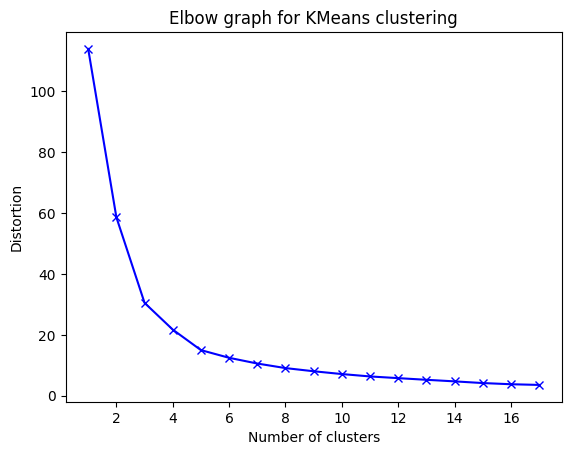

In [153]:
humberside.plot_elbow_graph("KMeans")

- From the elbow graph, the best number of clusters is 5


#### (5) I then instantiated the kmeans with 5 clusters and fit the humberside region with the help of the kmeans_cluster method of the cluster_regions class


In [154]:
humberside_kmeans_cluster = humberside.kmeans_cluster(5)

#### (6) Then I plotted the clustering using the "scatter_location_cluster" method


In [155]:
humberside.scatter_location_clusters(humberside_kmeans_cluster[0], humberside_kmeans_cluster[1], "kmeans")

#### (7) I visualized this kmeans clustering on a map to assist with interpretation with the help of the "plot_clusters_on_map" method


In [156]:
humberside.plot_clusters_on_map(5, humberside_kmeans_cluster[0])

#### In my opinion, Kmeans is more than enough to cluster this problem because from the map I can see that the regions were correctly clusters and there doesnt seem to be any issues with outliers but I will still just repeat the steps for kmediods


#### (1) Plot the elbow graph for the kmediods to determine the optimal number of clusters


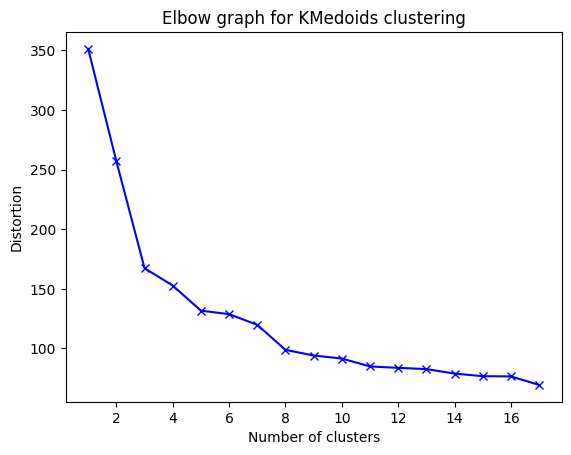

In [157]:
humberside.plot_elbow_graph("KMedoids")

#### (2) I then instantiated the kmedoids with 5 clusters and fit the humberside region with the help of the kmedoids_cluster method of the cluster_regions class


In [158]:
humberside_kmedoids_cluster = humberside.kmedoids_cluster(5)

#### (3) Then I plotted the clustering using the "scatter_location_cluster" method


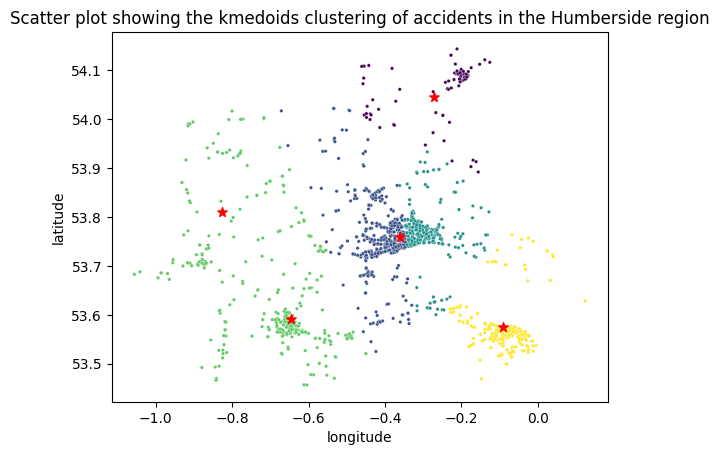

In [159]:
humberside.scatter_location_clusters(humberside_kmedoids_cluster[0], humberside_kmeans_cluster[1], "kmedoids")

#### (7) I visualized this kmedoids clustering on a map to assist with interpretation with the help of the "plot_clusters_on_map" method


In [160]:
humberside.plot_clusters_on_map(5, humberside_kmedoids_cluster[0])

- Like I said, for the sake of the report, I went with the kmeans and no the k medoids


## Question 6

Using outlier detection methods, identify unusual entries in your data set. Should you keep these entries in your data?


### I created a class for the outlier detection

- I created this class to allow me group different outlier detection methods together


#### About the "outlier_detection" class;

(1) The class is instantiated with just the dataframe to be worked on <br />
(2) The methods of the class include the get_grubbs_test_outliers, the get_IQR_outliers, the get_isolation_forest_outliers and the scatter_2D_multivariate_outliers methods


#### About the "cluster_region" methods;

<h4 style="text-decoration: underline;">(1) get_grubbs_test_outliers</h4>
<p> This method carries out the grubbs test for a single variable and returns a list of outliers for the variable based on the specified alpha value. It uses hypothesis testing to find outliers in the sense that the hypothesis that there is no outlier is rejected ig the Grubbs value is greater than the critical G value</p>
<p> The method takes in the name of the column to perform the test on and the alpha value as parameters</p>

<h4 style="text-decoration: underline;">(2) get_IQR_outliers</h4>
<p> This method performs an IQR test on the specified column and returns a list of outliers present for that variable.</p>
<p> The method takes in the name of the variable to perform the test on and the multiple of the IQR as parameters</p>

<h4 style="text-decoration: underline;">(3) get_isolation_forest_outliers</h4>
<p> This method is mainly for performs uses the isolation_forest_method to find multivariate outliers and returns a tuple containing two items which are the df of the selected variables for the test with outliers and one without the outliers</p>
<p> The method takes in a list of variables to perform the outlier check on and and a contamination value to determine the strictness of the search</p>

<h4 style="text-decoration: underline;">(4) scatter_2D_multivariate_outliers</h4>
<p> This plots two dimensional multivariate outliers</p>
<p> The method takes in the data with the outliers, the data without the outliers and the two variables to plot as parameters</p>


In [161]:
class outlier_detection:
    def __init__(self, dataframe):
        self.dataframe = dataframe
        
        
    def get_grubbs_test_outliers(self, column_name, alpha):
        # (1) Defining a function to get the critical G 
        def get_critical_G(size, alpha):
            tdist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    
            numerator = (size - 1) * np.sqrt(np.square(tdist))
            denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(tdist))
    
            critical_value = numerator / denominator
    
            return critical_value
        
        # (2) Assigning the values of the variable to a variable 
        variable = self.dataframe[column_name].values
        
        outliers = []
        
        # (3) Repeating the Grubs test until the null hypothesis is accepted
        while True:
            avg = np.mean(variable)
            
            # (4) compute the absolute value of x(i) - avg(x)
            absvalues = abs(variable - avg)
        
            # (5) Obtain the maximum value of the absvalues
            maxvalue = max(absvalues)

            # (6) Get the index of the value that is currently biegn checked
            value_to_check = variable[list(absvalues).index(maxvalue)]
            #print(value_to_check)

            # (7) compute the G value from the above, and from the std deviation
            stdev = np.std(variable)
            G = maxvalue/stdev
            
            # (8) Getting the GCritical with the function defined above
            GCritical = get_critical_G(len(variable), alpha)
        
            # (9) If G > G(critical), we reject the null hypothesis and accept the alternative hypothesis
            # ie. compaing the G with the GCritical
            if G > GCritical:
                
                # (10) removing the variable from the variables list and appending it to the outliers list
                variable = variable[variable != value_to_check]
                outliers.append(value_to_check)
                
            # (11) IF the null hypothesis is accepted, then there is no outlier and so we break the loop
            else:
                break
                
        # (12) Return the list of outliers
        return outliers
    
    
    def get_IQR_outliers(self, column_name, multiple): 
        # (1) Assign the values of the variable to a variable 
        variable = self.dataframe[column_name].values
        
        # (2) Getting the IQR
        q75, q25 = np.percentile(variable, [75 ,25])
        iqr = q75 - q25

        # (3) Get the lower quantile
        lower_quantile = q25 - (multiple * iqr)

        # (4) Get the upper quantile
        upper_quantile = q75 + (multiple * iqr)

        # (5) Get the outlers by selecting the unique values of points that fall outside the lower and upper quantile
        outliers = self.dataframe[(self.dataframe[column_name] < lower_quantile) | 
                                  (self.dataframe[column_name] > upper_quantile)][column_name].unique()
        
        # (6) Return the outliers
        return list(outliers)
    
    def get_isolation_forest_outliers(self, columns, cont):
        # (1) Create a dataframe of the variables to check for outliers
        variables_to_check = self.dataframe[columns]
        
        # (2) Create an instance of the Isolation forest and choose a contamination value
        iforest = IsolationForest(contamination = cont)
        
        # (3) fit the isolation forest with the data you want to check
        iforest.fit_predict(variables_to_check)
        outlier_flags = iforest.predict(variables_to_check)
        
        # (4) Create two dataframes, one for the outliers and one without the outliers
        outliers_df = variables_to_check[outlier_flags == -1]
        normal_df = variables_to_check[outlier_flags == 1]
        
        # (5) Return the dataframes in form of a tuple
        return (outliers_df, normal_df)
    
    def scatter_2D_multivariate_outliers(self, variable_1, variable_2, cont):
        # (1) Get the dataframe of the outlier and the normal points
        outlier_df, normal_df = self.get_isolation_forest_outliers([variable_1, variable_2], cont)
        
        # (1) plot the data 1
        sns.scatterplot(data = outlier_df, x = variable_1, y = variable_2, s = 6, color = "red")
        
        # (2) plot the data 2
        sns.scatterplot(data = normal_df, x = variable_1, y = variable_2, s = 6, color = "green")
        
        # (3) Create the title
        plt.title(f"Scatter plot of {variable_1} vs {variable_2} showing multivariate outliers")
        
        # (4) Return the plot
        return plt.show()
        
    def plot_location_outlier_on_map(self, longitude, latitude, cont):
        # (1) Get a dataframes of the outliers
        outlier_df = self.get_isolation_forest_outliers([longitude, latitude], cont)[0]
        
        # (2) Creat an instance of the folium map object
        map = folium.Map(location = [56, -1], zoom_start = 5.4999999, tiles = "openstreetmap")
        
        # (3) Get the values of latitude and longitude for the outliers
        outlier_locations = outlier_df[[latitude, longitude]].values
        
        # (4) Define the color of the marker for the outliers
        outlier_color = f"<svg width='12' height='12' xmlns='http://www.w3.org/2000/svg'> \
                                    <circle cx='6' cy='6' r='3' fill='red' /></svg>"
        
        # (4) Mark the outliers on the folium map
        for location in outlier_locations:
            folium.Marker(location, icon=folium.DivIcon(html=outlier_color)).add_to(map)
            
        return map

#### (1) Outliers detection can only be done on continuous variables and so i created a dataframe of just continuous variables


In [162]:
merged_df_continuous  =  merged_df[["location_easting_osgr", "location_northing_osgr", "longitude", "latitude", 
                                    "number_of_vehicles", "number_of_casualties", "time", "age_of_driver", 
                                    "engine_capacity_cc", "age_of_vehicle", "age_of_casualty"]]

#### (2) I then created a function to get the outliers for the univariate outliers

- The method runs the grubbs test and the IQR test with different values of alpha and different multiples respectively and returns a tuple of dataframes with the outliers from each test


In [163]:
def get_univaiate_outliers(outlier_detection_instance, univariate_variables):
    # (1) Creating empty dictionaries for different tests
    grubbs_test_1percent = {}
    grubbs_test_5percent = {}
    IQR_test_1point5 = {}
    IQR_test_3 = {}
    
    # (2) Iterating over the univariate variables 
    for variable in univariate_variables:
        
        # (3) Running the test for each variable and appending to their respective dictionaries
        grubbs_test_1percent[variable] = [outlier_detection_instance.get_grubbs_test_outliers(variable, 0.01)]
        grubbs_test_5percent[variable] = [outlier_detection_instance.get_grubbs_test_outliers(variable, 0.05)]
        IQR_test_1point5[variable] = [outlier_detection_instance.get_IQR_outliers(variable, 1.5)]
        IQR_test_3[variable] = [outlier_detection_instance.get_IQR_outliers(variable, 3)]
        
    # (4) Converting the dictionaries containg the outliers from the different tests to data frames
    grubbs_test_1percent_df = pd.DataFrame(grubbs_test_1percent)
    grubs_test_5percent_df = pd.DataFrame(grubbs_test_5percent)
    IQR_test_1point5_df = pd.DataFrame(IQR_test_1point5)
    IQR_test_3_df = pd.DataFrame(IQR_test_3)
    
    
    return (grubbs_test_1percent_df, grubs_test_5percent_df, IQR_test_1point5_df, IQR_test_3_df)

#### (4) Creating a list to store all the univariate variables among the continuous variables


In [164]:
univariate_variables = ["number_of_vehicles","number_of_casualties","time","age_of_driver","age_of_vehicle","age_of_casualty"]

#### (5) Creating an instance of the outlier_detection class and initializing it with the merged_df_continuous dataframe


In [165]:
detect_outliers = outlier_detection(merged_df_continuous)

#### (6) Run the get_univaiate_outliers function to get the univariate outlers


In [166]:
g_test_1percent,g_test_5percent,IQR_test_1point5,IQR_test_3 = get_univaiate_outliers(detect_outliers, univariate_variables)

#### (7) The results from the univariate tests are seen below


###### Outliers detected from the Grubbs test with an alpha value of 0.01


In [167]:
g_test_1percent

number_of_vehicles                number_of_casualties time  \
0  [13, 12, 11, 10, 9, 8, 7]  [41, 19, 17, 13, 12, 11, 10, 9, 8]   []   

  age_of_driver  \
0            []   

                                                                                                                                                                                                                               age_of_vehicle  \
0  [96.0, 93.0, 92.0, 88.0, 86.0, 85.0, 84.0, 83.0, 78.0, 77.0, 68.0, 67.0, 66.0, 64.0, 63.0, 62.0, 61.0, 60.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0]   

  age_of_casualty  
0              []

###### Outliers detected from the Grubbs test with an alpha value of 0.05


In [168]:
g_test_5percent

number_of_vehicles                number_of_casualties time  \
0  [13, 12, 11, 10, 9, 8, 7]  [41, 19, 17, 13, 12, 11, 10, 9, 8]   []   

  age_of_driver  \
0            []   

                                                                                                                                                                                                                                     age_of_vehicle  \
0  [96.0, 93.0, 92.0, 88.0, 86.0, 85.0, 84.0, 83.0, 78.0, 77.0, 68.0, 67.0, 66.0, 64.0, 63.0, 62.0, 61.0, 60.0, 58.0, 57.0, 56.0, 55.0, 54.0, 53.0, 52.0, 51.0, 50.0, 49.0, 48.0, 47.0, 46.0, 45.0, 44.0, 43.0, 42.0, 41.0, 40.0, 39.0, 38.0, 37.0]   

  age_of_casualty  
0              []

###### Outliers detected from the IQR test with a multiple of 1.5


In [169]:
IQR_test_1point5

number_of_vehicles  \
0  [1, 3, 4, 8, 6, 7, 5, 9, 10, 11, 13, 12]   

                             number_of_casualties  \
0  [4, 6, 5, 9, 11, 7, 8, 10, 17, 41, 13, 12, 19]   

                                                                                                                                                                                                           time  \
0  [0.17, 0.03, 0.45, 0.08, 0.48, 0.07, 0.32, 0.53, 0.33, 0.02, 0.5, 0.0, 0.25, 0.4, 0.23, 0.52, 0.42, 0.15, 0.1, 0.12, 0.55, 0.43, 0.27, 0.2, 0.18, 0.05, 0.28, 0.38, 0.47, 0.37, 0.57, 0.3, 0.13, 0.35, 0.22]   

                                                age_of_driver  \
0  [88, 90, 91, 89, 93, 94, 92, 96, 97, 95, 101, 98, 100, 99]   

                                                                                                                                                                                                                                                                                                             age_of_vehicle  \
0  [28.0, 32.0, 25.0, 26.0, 27.0, 30.0, 51.0, 34.0, 29.0, 31.0, 37.0, 33.0, 39.0, 44.0, 57.0, 38.0, 54.0, 67.0, 62.0, 46.0, 41.0, 43.0, 36.0, 42.0, 48.0, 45.0, 58.0, 60.0, 64.0, 85.0, 77.0, 53.0, 86.0, 50.0, 61.0, 63.0, 47.0, 35.0, 55.0, 49.0, 92.0, 88.0, 52.0, 96.0, 84.0, 40.0, 66.0, 56.0, 78.0, 68.0, 83.0, 93.0]   

                            age_of_casualty  
0  [91, 92, 94, 90, 93, 96, 95, 98, 99, 97]

###### Outliers detected from the IQR test with a multiple of 3


In [170]:
IQR_test_3

number_of_vehicles  \
0  [1, 3, 4, 8, 6, 7, 5, 9, 10, 11, 13, 12]   

                       number_of_casualties time age_of_driver  \
0  [6, 9, 11, 7, 8, 10, 17, 41, 13, 12, 19]   []            []   

                                                                                                                                                                                                                                     age_of_vehicle  \
0  [51.0, 37.0, 39.0, 44.0, 57.0, 38.0, 54.0, 67.0, 62.0, 46.0, 41.0, 43.0, 42.0, 48.0, 45.0, 58.0, 60.0, 64.0, 85.0, 77.0, 53.0, 86.0, 50.0, 61.0, 63.0, 47.0, 55.0, 49.0, 92.0, 88.0, 52.0, 96.0, 84.0, 40.0, 66.0, 56.0, 78.0, 68.0, 83.0, 93.0]   

  age_of_casualty  
0              []

#### (8) Notes on the univariate outlier detection

- I will keep the outliers detected for number of vehicles, number of casualties and age of casualty for sure because even although they are not very likey to occur, the values I can see are realistic.
- As for the age of vehicle, Using the outliers from the grubbs test with an alpha of 0.005 (Because those outliers look more unlikey to occur than what was returned from the other tests), I will try to run my model with and without them and depending my results< i will decided if they shoulf be kept otr not


#### (9) Detecting and plotting the multivariate outliers in the dataset


###### Visualizing the multivariate outliers of longitude and latitude with a contamination value of 1 percent with the scatter_2D_multivariate_outliers method (which uses Isolation forest)


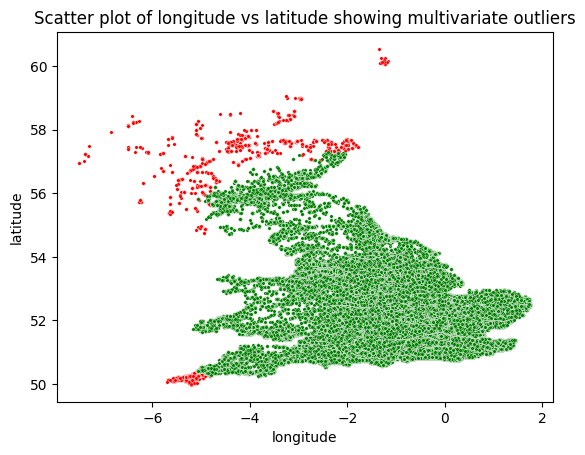

In [171]:
detect_outliers.scatter_2D_multivariate_outliers("longitude", "latitude", 0.01)

###### Visualizing the multivariate outliers of location_easting_osgr and location_northing_osgr with a contamination value of 1 percent with the scatter_2D_multivariate_outliers method (which uses Isolation forest)


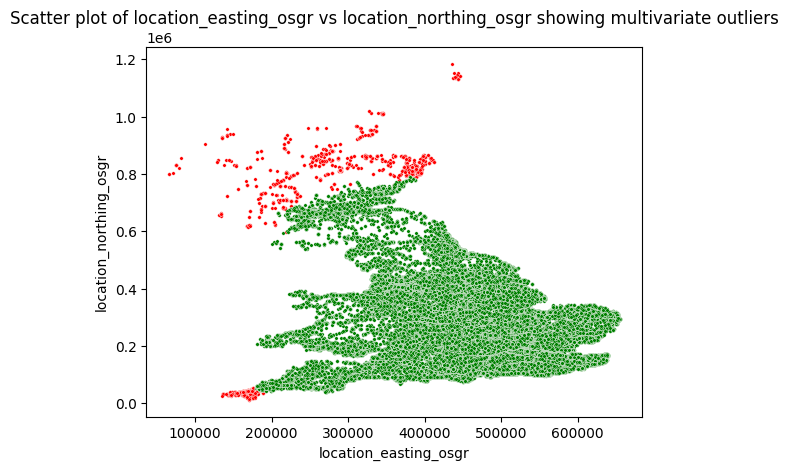

In [172]:
detect_outliers.scatter_2D_multivariate_outliers("location_easting_osgr", "location_northing_osgr", 0.01)

###### NB. The same regions are identified as outliers for the two multivariate varaible sets that we have (both speak to locations).

- The regions identified as outliers look like they are still in the uk but I clarified that by plotting this points on an actual map to verify


#### (9) Plotting the multivariate outliers (locations) on a real map


In [173]:
detect_outliers.plot_location_outlier_on_map("longitude", "latitude", 0.01)

###### From the map, the regions identified are clearly in the uk and so I will keep those points in my dataset becasue the end goal is to perdict severity in the whole of the uk


## Question 7

- Can you develop a classification model using the provided data that accurately predicts fatal injuries sustained in road traffic accidents, with the aim of informing and improving road safety measures?


In [174]:
class select_k_best:
    def __init__(self, X, y,k):
        self.selector = SelectKBest(f_classif, k=k)
        self.selector.fit(X, y)
        
    def get_best_variables(self):
        mask = self.selector.get_support()
        names = self.selector.feature_names_in_[mask]
        scores = self.selector.scores_[mask]
        
        best_df = pd.DataFrame({"Variables": names, "Scores": scores})
        best_df = best_df.sort_values(by = "Scores", ascending = False).reset_index()
        best_df = best_df.drop(["index"], axis = 1)
        return (best_df)
        
    def plot_best_variables(self):
        best_df = self.get_best_variables()
        plt.bar(best_df["Variables"], best_df["Scores"])
        plt.xticks(rotation = "vertical")
        return plt.show()

#### (1) I started by dropping the columns that would be irrelevant to the classification and the ones that had high colinearity with accident severity

- I assigned the dataframe with these dropped columns to a variable called classification data


In [175]:
columns_to_drop = ["accident_index", 
                   "accident_year_x",
                   "accident_year_y",
                   "accident_year",
                   "accident_reference_x",
                   "accident_reference_y",
                   "accident_reference",
                   "vehicle_reference_x",
                   "vehicle_reference_y",
                   "casualty_reference",
                   "accident_reference",
                   "date",
                   "local_authority_ons_district",
                   "local_authority_district",
                   "local_authority_highway",
                   "did_police_officer_attend_scene_of_accident",
                   "lsoa_of_accident_location",
                   "vehicle_index",
                   "generic_make_model",
                   "casualty_index",
                   "casualty_severity",
                  ]

classification_data = merged_df.drop(columns = columns_to_drop, axis = 1)

#### (2) I split the classification data into features and target as x and y respectively


In [176]:
x = classification_data.drop(["accident_severity"], axis = 1)
y = classification_data["accident_severity"].apply(lambda x : True if x == 1 else False)

#### (3) Using the random undersampler to balance the target variable


In [177]:
x_balanced, y_balanced = RandomUnderSampler().fit_resample(x, y)

#### (4) To show that the target class is now balanced, I did a count plot target variable


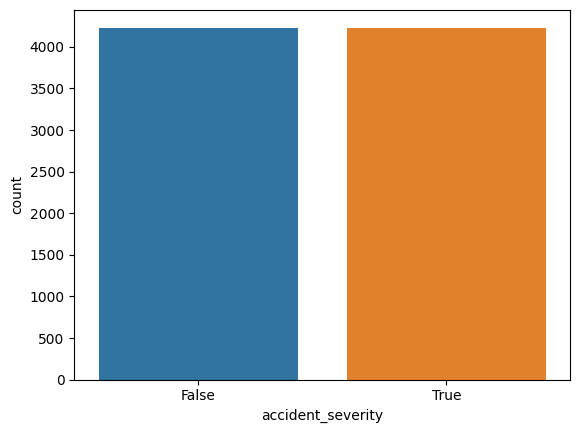

In [178]:
sns.countplot(data = pd.DataFrame(y_balanced), x = "accident_severity")
plt.show()

#### (5) Now that the data was balanced, I used the select k best features to select the best features


###### Creating an instance of the "select_k_best" class


In [179]:
best_features = select_k_best(x_balanced, y_balanced, 16)

#### (6) Using the best variable method to get a list of the best variables


In [180]:
best_variable_names = best_features.get_best_variables()["Variables"].values

#### (7) Using the best variable method to get a dataframe of the best variables and thier scores


In [181]:
best_variables_df = best_features.get_best_variables()
best_variables_df

Variables       Scores
0                        speed_limit  1373.719971
1                urban_or_rural_area  1069.834313
2                   junction_control   526.747311
3                  second_road_class   525.672672
4               number_of_casualties   486.135879
5                  junction_location   455.670496
6                       police_force   331.930355
7          hit_object_in_carriageway   290.468452
8   vehicle_location_restricted_lane   280.865465
9                      sex_of_driver   264.542687
10        hit_object_off_carriageway   245.402818
11                   age_of_casualty   241.932676
12           vehicle_left_hand_drive   235.227126
13                  first_road_class   227.636212
14              age_band_of_casualty   212.464328
15           casualty_home_area_type   203.677043

#### (8) Using the "plot_best_variables" method of the select_K_best class we created to plot the best variables


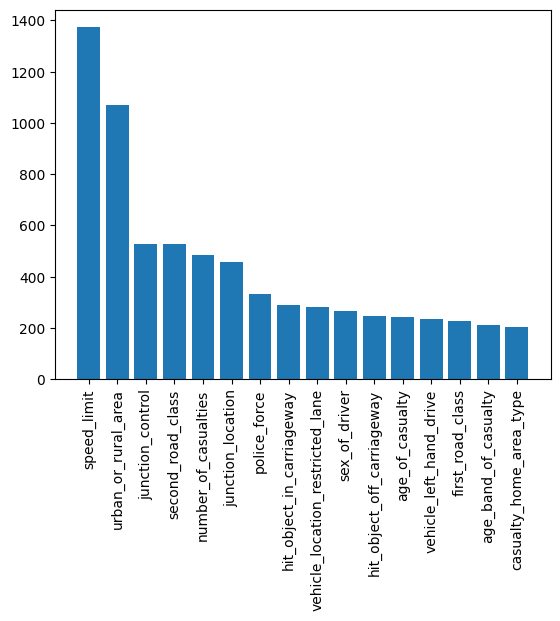

In [182]:
best_features.plot_best_variables()

#### (9) Reassigning the x_balanced to to contain only the best variables


In [183]:
x_balanced = x_balanced[best_variable_names]

## Model Building

- The models that I used for the classification are the Random forest classifier, Gradient boosting classifier and K nearest neighbor.

- I also stacked this models mentioned above later to using the Logistic regression as the level1 in attempt to improve my accuracy and recall


#### Hyper parameter tuning: I built a function that uses grid search to search and return the best parameters for the 3 classifiers that I used.

- I ran it once and copied the results to the variables below the function cell because of how long the search takes but if you uncomment the code it works fine.


In [184]:
# def get_grid_search_params(x, y):
    
#     x = scaler.fit_transform(x)
#     self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    
#     best_params_list = []
        
#     param_grids = [
#         {"n_estimators":[100, 200, 300],"max_depth":[None, 10, 20],"min_samples_split":[2, 5, 10],"min_samples_leaf":[1, 2, 4],"random_state":42},
#         {"n_estimators": [50, 100, 200], "max_depth": [3, 5, 7],"learning_rate": [0.01, 0.1, 0.2], "random_state":42},
#         {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"],"metric": ["euclidean", "manhattan"]}]
        
#     models = {
#         "Random Forest": RandomForestClassifier(),
#         "XGBoost": XGBClassifier(),
#         "k-Nearest Neighbors":KNeighborsClassifier()}
        
#     for idx, (name, model) in enumerate(models.items()):
#         # Create the GridSearchCV object
#         grid_search = GridSearchCV(model, param_grids[idx], cv = 5, scoring = "accuracy")

#         # Fit the GridSearchCV object to the data
#         grid_search.fit(self.x_train, self.y_train)

#         best_params = grid_search.best_params_
                
#         best_params_list.append(best_params)
        
#     return best_params_list

# get_grid_search_params(x_balanced, y_balanced)

###### These are the best parameters for the classifiers gotten from running the "get_grid_search_params" function above

- NB: I commented the function and the call because of the time it takes to run but the code works fine and I copied the results below


In [185]:
random_forest_best_params = {"max_depth":None,"min_samples_leaf":1,"min_samples_split":2,"n_estimators":100,"random_state":42}
XGBoost_best_params = {"learning_rate":0.2,"max_depth": 7,"n_estimators":200,"random_state":42}
kNN_best_params = {"metric":"manhattan","n_neighbors":7,"weights":"distance"}

### I created a class to handle the model building

- I created a class to make running the entire classification easier. The class has methods does different things from building the models to stacking, to visualization etc. I explained in more detail below


#### About the "model_classification" class;

(1) The class is instantiated with two parameters which are the features and the target that we want to work with.
<br>
<br>
(2) The constructor scales the target for the sake of models like the knn, splits the data into train and test, and calls one of its own methods called "get_metrics" to keep hold of some values in the self object. I will go deeper about the methods in the next block
<br>
<br>
(3) The methods of the class include the evaluate_model, the get_models, the get_stacking, the get_metrics, the get_crossval_and_test_dataframes, the get_classification_report, the plot_confusion_matrix and the visualize_model_results methods


#### About the "model_classification" methods;

<h4 style="text-decoration: underline;">(1) evaluate_model</h4>
<p> This method performs the cross validation on the specified model, fits the specified model with the training data, and makes predictions on test data. It returns a tuple of the mean cross validation scores, the mean test scores, the cross validation scores and the predictions for a specified model</p>
<p> The method take in only the model as a parameter</p>

<h4 style="text-decoration: underline;">(2) get_models</h4>
<p> This method just returns dictionary of the model names and thier objects of the models that we used for this classification</p>

<h4 style="text-decoration: underline;">(3) get_stacking</h4>
<p> This method returns the model that stacks all the models that were used. i.e the Random forest, Gradient boosting and K nearest neighbor classifiers using a logist regression model as the level 1 model</p>

<h4 style="text-decoration: underline;">(4) get_metrics</h4>
<p> This method is called upon constructing the class. It returns a dataframe of the mean cross validation scores and the , test scores, a list of the predictions of from all the models and a list of the cross validation scores from all the models</p>
<p>Everything returned by this method is stored in the self object</p>

<h4 style="text-decoration: underline;">(5) get_crossval_and_test_dataframes</h4>
<p> This just returns the dataframes of the mean cross validation scores and the , test scores as a tuple in that order</p>

<h4 style="text-decoration: underline;">(6) get_classification_report</h4>
<p> This method prints the classification report of all models by comparing the predictions which were stored in the self object by the get_metrics method with the true values</p>

<h4 style="text-decoration: underline;">(7) plot_confusion_matrix</h4>
<p> This method plots the confusion matrix for each of the models beign used using the predictions and the real values</p>
</p>

<h4 style="text-decoration: underline;">(8) visualize_model_results</h4>
<p> This plots a box plot of the performance of all the models in order to visualize what model performs best</p>


In [186]:
class model_classification:
    def __init__(self, x, y):
        # (1) Create a StandardScaler instance
        scaler = StandardScaler()
        
        # (2) Fit the scaler on the features and transform them
        self.x = scaler.fit_transform(x)
        
        # (3) Split the data into trian and test
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x, y, test_size = 0.2, random_state = 42)
        
        # (4) Get the cross val score df, test df, y prediction lists and cros val scores list from the get metrics self method
        self.cross_val_df, self.test_df, self.y_pred_list, self.cross_val_scores_list = self.get_metrics()
        
        # Set the random seed for reproducibility
        np.random.seed(42)
        
        

        
    def evaluate_model(self, model):
        np.random.seed(42)
        
        
        # (1) Define cross validation strategy
        cv = RepeatedStratifiedKFold(
            n_splits = 10,
            n_repeats = 3,
            random_state = 1
        )
        
        # (2) Get scores to be gotten from the cross validation
        scoring = {
            'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            "f1": make_scorer(f1_score)
        }
        
        # (3) Evaluate the model using cross-validation and storing the scores in a variable "scores"
        cross_val_scores = cross_validate(model, self.x_train, self.y_train, scoring=scoring, cv=cv, error_score='raise')
        
        # (4) Initializing a dictionary to hold the mean cross validation scores
        mean_cross_val_scores = {}
        
        # (5) Iterating over the cross val scores and adding the means of the cross val scores to the "mean_cross_val_scores"
        for metrics, score in cross_val_scores.items():
            mean_cross_val_scores[metrics] = score.mean()
            
        # (6) Fitting the model on the data 
        model.fit(self.x_train, self.y_train)
        
        # (7) Making predictions using the test data which the model has not seen before
        y_pred = model.predict(self.x_test)
        
            
        # (8) Get the mean test scores from predictions and store in a variable "mean_test_scores"
        mean_test_scores = {
            "test accuracy": accuracy_score(self.y_test, y_pred),
            "test precision": precision_score(self.y_test, y_pred, average = "macro"),
            "test recall": recall_score(self.y_test, y_pred, average = "macro"),
            "test f1-score": f1_score(self.y_test, y_pred, average = "macro")  
        }   
            
        # (9) return the mean of the cross validation scores and the test scores
        return (mean_cross_val_scores, mean_test_scores, cross_val_scores, y_pred)
    
    
    
    
    def get_models(self):
        # (1) Create a dictionary of the model names and thier objects
        # NB I used grid search to find the best parameters for these models earlier so I parse them here
        models = {
            "Random Forest": RandomForestClassifier(**random_forest_best_params),
            "XGBoost": XGBClassifier(**XGBoost_best_params),
            "k-Nearest Neighbors": KNeighborsClassifier(**kNN_best_params),
            "stacker": self.get_stacking()
        }
        
        # (2) Return the model
        return models
    
    
    
    def get_stacking(self):
        # (1) Define the base models for the stacking
        level0 = [("Random Forest", RandomForestClassifier(**random_forest_best_params)),
                  ("XGBoost", XGBClassifier(**XGBoost_best_params)),
                  ("k-Nearest Neighbors", KNeighborsClassifier(**kNN_best_params))
                 ]
        # (2) Define the model for combining the base models
        level1 = LogisticRegression()
        
        # (3) Create the new stacked model
        model = StackingClassifier(estimators = level0, final_estimator = level1, cv = 5)
        
        # (4) Return the stacked model
        return model
    
    
    
    def get_metrics(self):
        # (1) List that would contain the y pred for each of the models
        y_pred_list = []
        
        # (2) List that will contain the cross val scores for the models
        cross_val_scores_list = []
        
        # (3) Storing the names of the metrics used to evaluate the models in a list
        metrics = ["accuracy", "precision", "recall", "f1-score"]
        
        # (4) Creating a dictionary that will hold the cross val metrics names and thier scores
        mean_cross_val_metrics = {"cross val evaluation metrics": metrics}
        test_metrics = {"Test evaluation metrics": metrics}
        
        # (5) Call the get_models method of this class to get a dictionary of all the models to be used for the stacking
        models = self.get_models()
        
        # (6) Iterate through the models
        for name, model in models.items():
            
            # (7) call the "evaluate_model" method and store the result in a variable "evaluation"
            # NB: Remember that the evaluate_model method returns a tuple containing the cross val scores and the test scores
            mean_cross_val_scores, test_scores, cross_val_scores, y_pred = self.evaluate_model(model)
            
            
            # (8) Append the y_pred for model to the "y_pred_list"
            y_pred_list.append(y_pred)
            cross_val_scores_list.append(cross_val_scores)
            
            
            # (9) creating a list that would hold the different cross val metrics scores
            # The fit_time and the score time are at index 0 and 1 respectively so we focus on the rest
            mean_cross_val_metrics_score_list = list(mean_cross_val_scores.values())[2:]
            
            
            # (10) creating a list that would hold the different test scores
            test_metrics_score_list = list(test_scores.values())
            
            
            # (11) Appending the name of the model and its scores for the cross val and the test to thier respective dictionaries
            mean_cross_val_metrics[name] = mean_cross_val_metrics_score_list
            test_metrics[name] = test_metrics_score_list
                
        # (12) Creating a dataframe for the different models and thier cross val and test metric scores    
        mean_cross_val_df = pd.DataFrame(mean_cross_val_metrics)
        test_df = pd.DataFrame(test_metrics)
        
        # (13) returning the cross val df and the test df as tuples
        return (mean_cross_val_df, test_df, y_pred_list, cross_val_scores_list)
    
    
    
    def get_crossval_and_test_dataframes(self):
        
        # (1) return the dfs containing the cross validation scores and the test scores
        return(self.cross_val_df, self.test_df)
    
    
    
    def get_classification_report(self):
        
        # (1) Get the list of the models with the help of the get_models self method
        models_list = list(self.get_models().keys())
        
        # (2) I terate through the predictions of the model stored in the self object
        for idx, y_pred in enumerate(self.y_pred_list):
            
            # (3) Print the classification report for each model
            print(f"{models_list[idx]} classification report")
            print(classification_report(self.y_test, y_pred))
            print("\n" * 5)
            
            
            
    def plot_confusion_matrix(self):
        
        # (1) Get the list of the models with the help of the get_models self method
        models_list = list(self.get_models().keys())
        
        # (2) I terate through the predictions of the model stored in the self object
        for idx, y_pred in enumerate(self.y_pred_list):
            
            # (2) Plot the confusion matrix for each of the models
            plt.figure(dpi=200, figsize=(10,15))
            ConfusionMatrixDisplay.from_predictions(self.y_test, y_pred, display_labels=["Non Fatal","Fatal"])
            plt.title(f"{models_list[idx]} Confusion matrix")
            plt.show()
            
            
            
    def visualize_model_results(self):
        
        # (1) Get the models with the get_models method
        models = self.get_models()
        
        # (2) Create a dictionary that would hold the models and thier accuracy scores
        model_x_accuracy = {}
        
        # (3) Iterate over the models
        for idx, (name, model) in enumerate(models.items()):
            
            # (4) Add the models and their accuracy scores to the "model_x_accuracy" dictionary
            model_x_accuracy[name] = self.cross_val_scores_list[idx]["test_accuracy"]
            
        # (5) Create a dataframe of the models and thier accuracy scores
        model_vs_accuracy_df = pd.DataFrame(model_x_accuracy)
            
        # (6) Using seaborn, create a boxplot for the models and their accuracy
        sns.boxplot(model_vs_accuracy_df)
        
        # (7) Add the title, the x labels and the y labels
        plt.title("Box plot showing Models and their Accuracy scores")
        plt.xlabel("Models")
        plt.ylabel("Accuracy Scores")
        
        # (8) Return the plot
        plt.show()
        

#### (1) Create an instance of the "model_classification" class and store it in a variable


In [187]:
accident_model = model_classification(x_balanced, y_balanced)

#### (2) Get the classification report of all the models

- This is done with the get_classification_report method which uses the predicted values and the actual values to make


In [188]:
accident_classification_reports = accident_model.get_classification_report()
accident_classification_reports

Random Forest classification report
              precision    recall  f1-score   support

       False       0.82      0.77      0.79       838
        True       0.79      0.83      0.81       855

    accuracy                           0.80      1693
   macro avg       0.80      0.80      0.80      1693
weighted avg       0.80      0.80      0.80      1693







XGBoost classification report
              precision    recall  f1-score   support

       False       0.81      0.78      0.79       838
        True       0.79      0.82      0.80       855

    accuracy                           0.80      1693
   macro avg       0.80      0.80      0.80      1693
weighted avg       0.80      0.80      0.80      1693







k-Nearest Neighbors classification report
              precision    recall  f1-score   support

       False       0.80      0.72      0.76       838
        True       0.75      0.83      0.79       855

    accuracy                           0.77      1693
   macro

#### (3) Get the confusion matrixs for all the models


<Figure size 2000x3000 with 0 Axes>

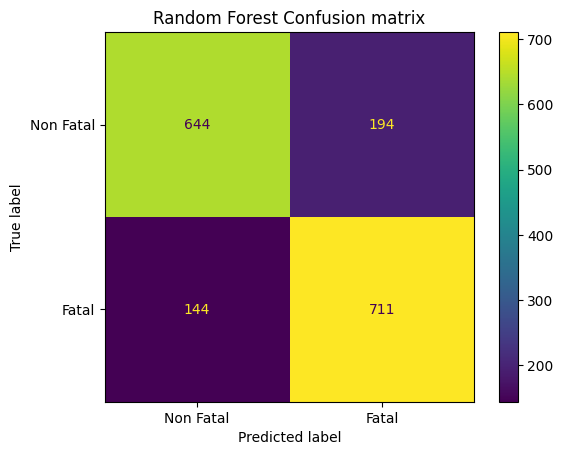

<Figure size 2000x3000 with 0 Axes>

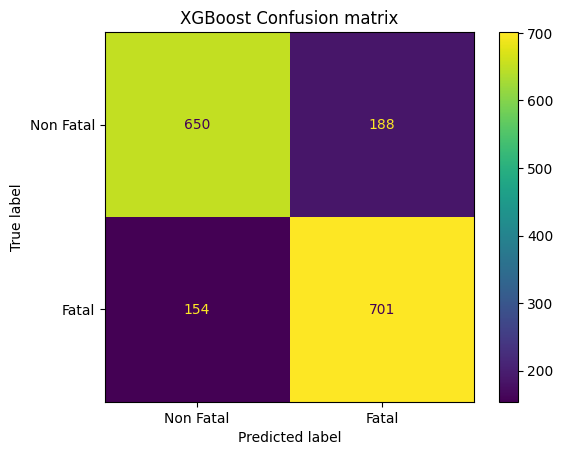

<Figure size 2000x3000 with 0 Axes>

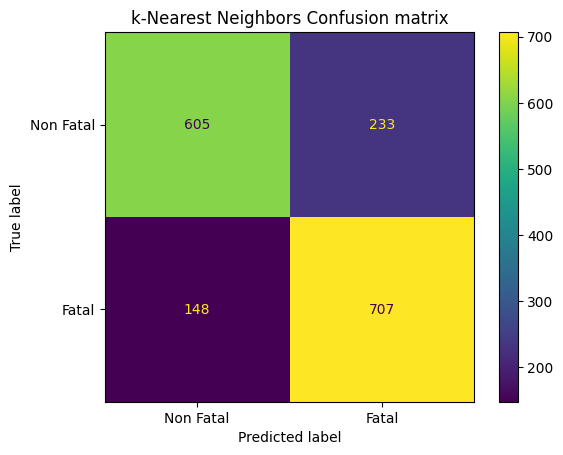

<Figure size 2000x3000 with 0 Axes>

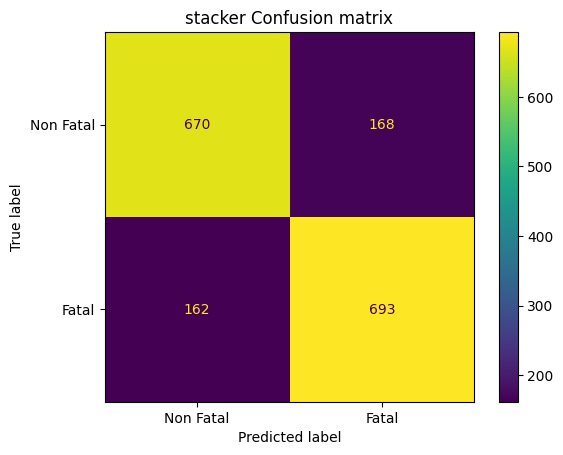

In [189]:
accident_model.plot_confusion_matrix()

#### (4) Now for comparing the models, I started with printing the dataframes for the cross val evaluations and the test evaluations


In [190]:
cross_val_evaluations, test_evaluations = accident_model.get_crossval_and_test_dataframes()

<br>

<b>Cross val evaluations</b>


In [191]:
cross_val_evaluations

cross val evaluation metrics  Random Forest   XGBoost  k-Nearest Neighbors  \
0                     accuracy       0.815235  0.806028             0.775742   
1                    precision       0.799239  0.791418             0.748745   
2                       recall       0.841137  0.830675             0.828696   
3                     f1-score       0.819472  0.810307             0.786547   

    stacker  
0  0.819323  
1  0.813496  
2  0.828006  
3  0.820453

<br>

<b>Test evaluations</b>


In [192]:
test_evaluations

Test evaluation metrics  Random Forest   XGBoost  k-Nearest Neighbors  \
0                accuracy       0.800354  0.797992             0.774956   
1               precision       0.801447  0.798492             0.777790   
2                  recall       0.800038  0.797770             0.774429   
3                f1-score       0.800041  0.797808             0.774136   

    stacker  
0  0.805080  
1  0.805083  
2  0.805024  
3  0.805044

#### (5) Visualize the performance of the different models


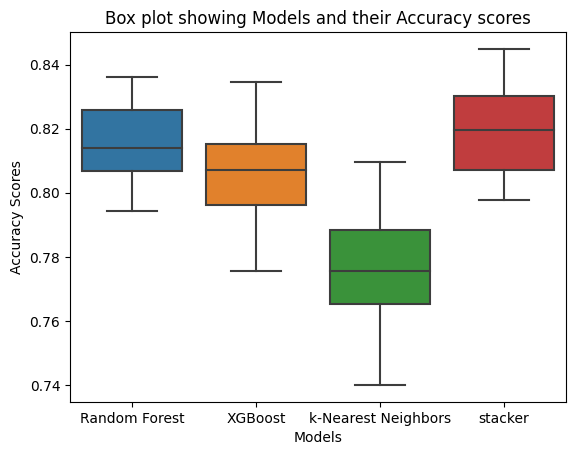

In [193]:
accident_model.visualize_model_results()

- From the plot above the stacker model performs better than all of the others


## Thank You
